In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df1 = pd.read_csv("sample_submission.csv")
df1

Id      SalePrice
0     1461  169277.052498
1     1462  187758.393989
2     1463  183583.683570
3     1464  179317.477511
4     1465  150730.079977
...    ...            ...
1454  2915  167081.220949
1455  2916  164788.778231
1456  2917  219222.423400
1457  2918  184924.279659
1458  2919  187741.866657

[1459 rows x 2 columns]

# Analisis del df de train

In [11]:
df2 = pd.read_csv("train.csv")
# df2.shape[1]
# df2.columns?
for columna in df2.columns:
    # Calcular la moda de la columna actual
    moda = df2[columna].mode()[0]
    # Rellenar los valores NaN con la moda de la columna actual
    df2[columna] = df2[columna].fillna(moda)
# df2
# df2.isnull().sum()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

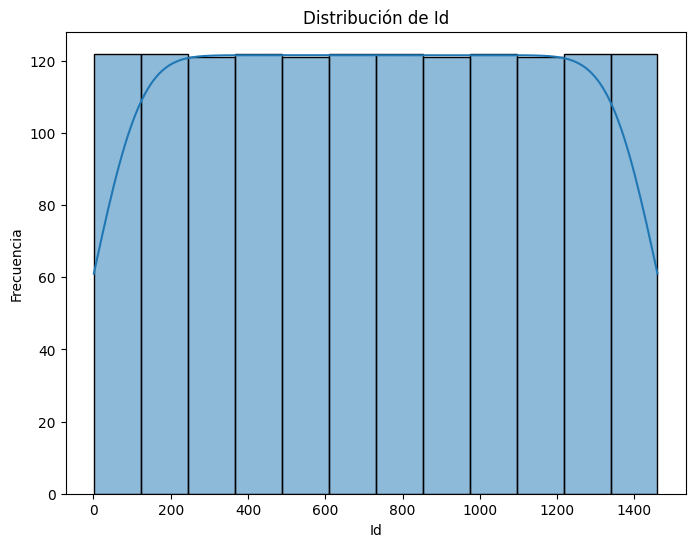

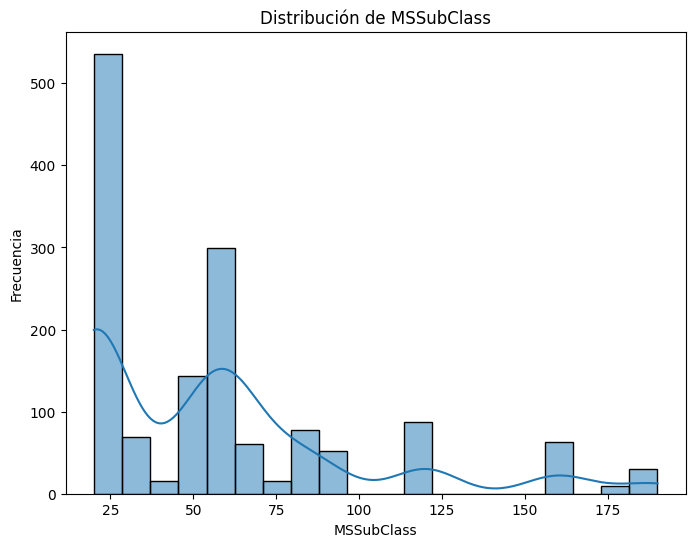

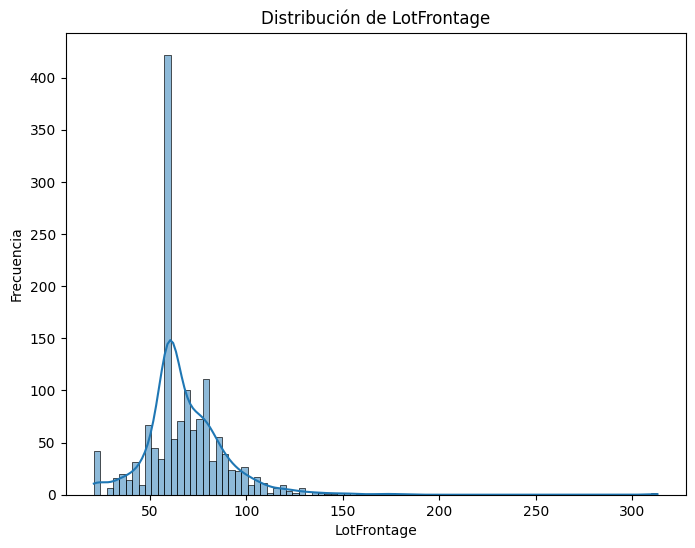

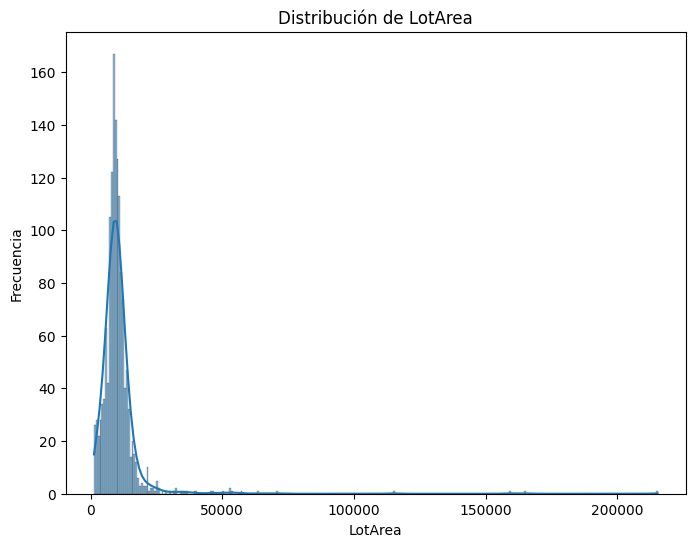

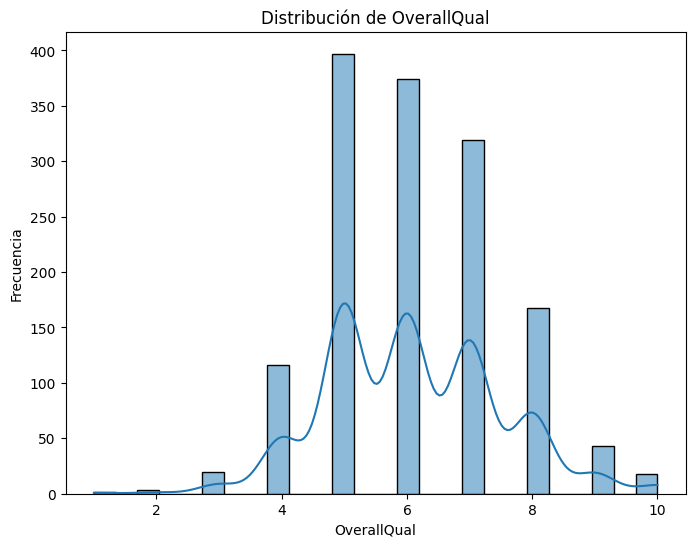

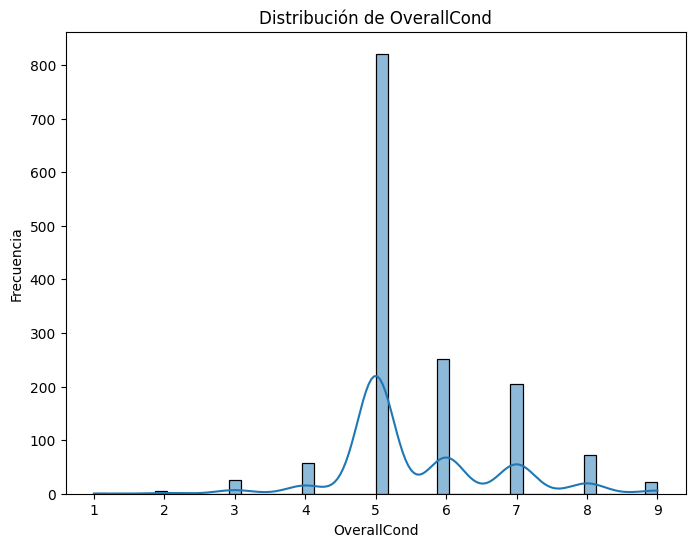

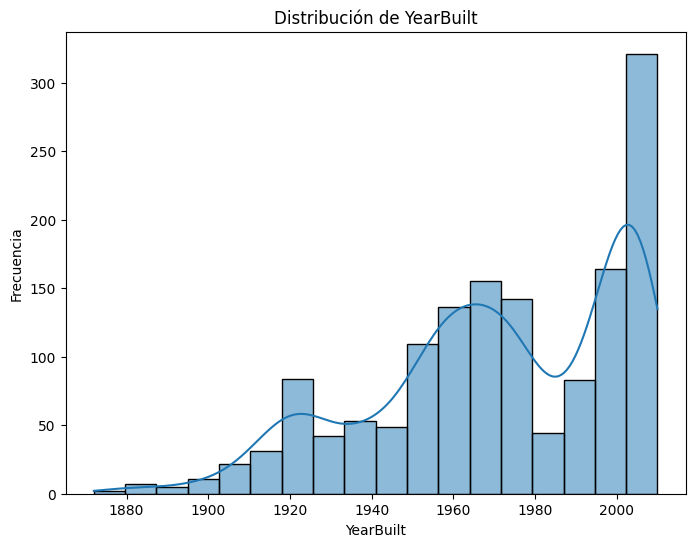

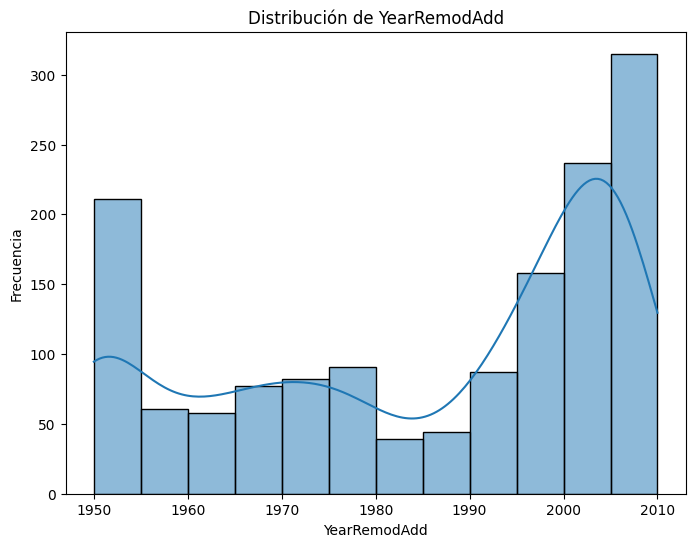

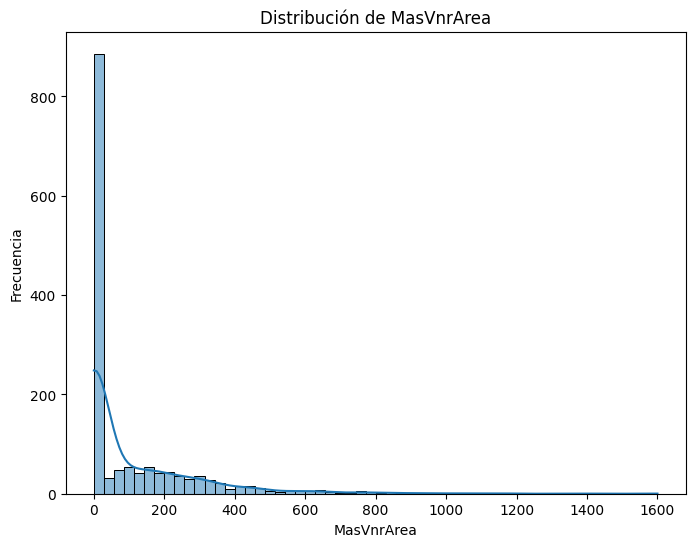

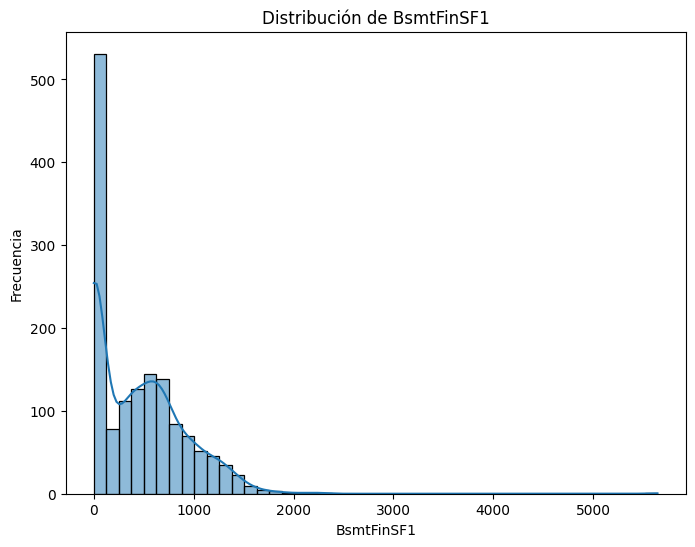

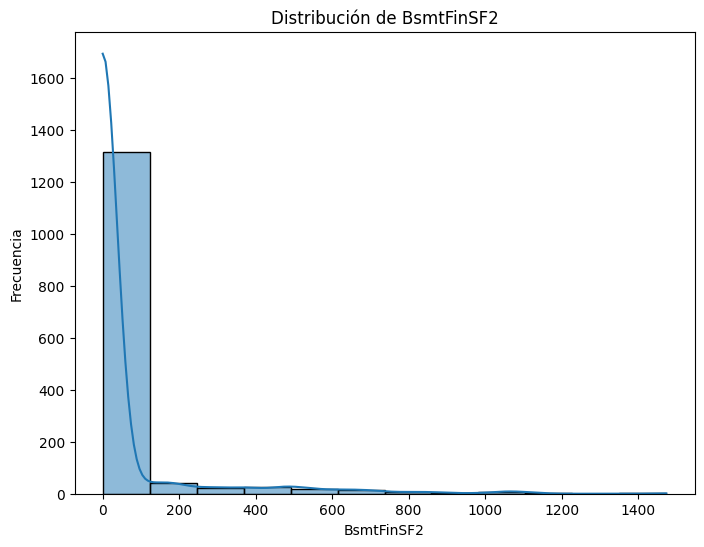

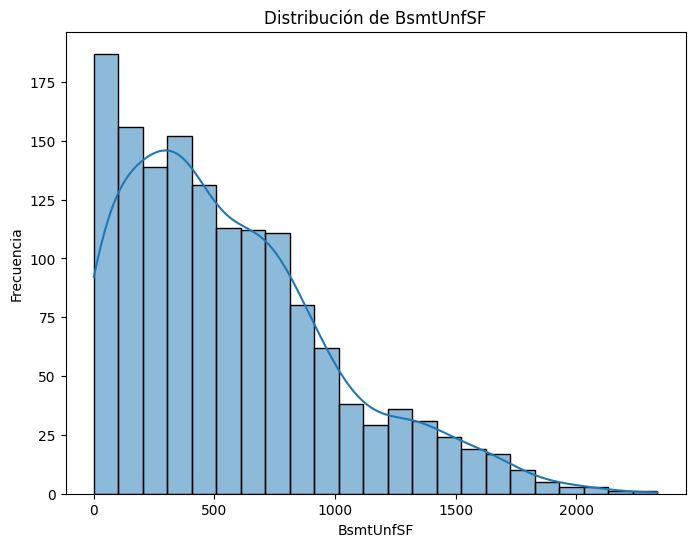

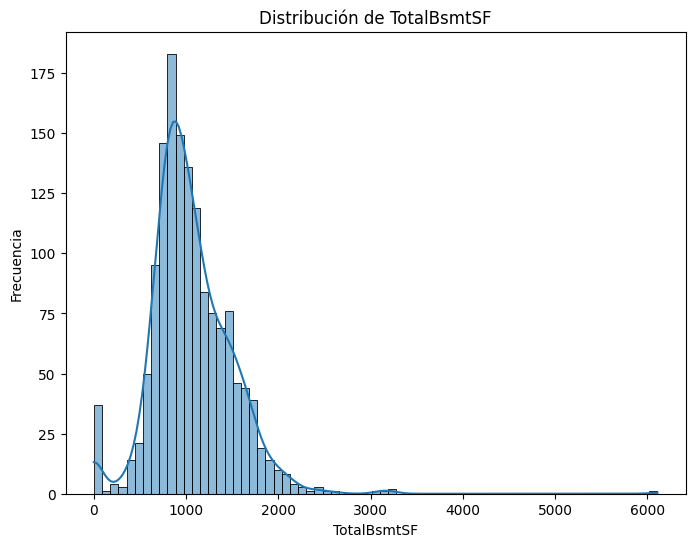

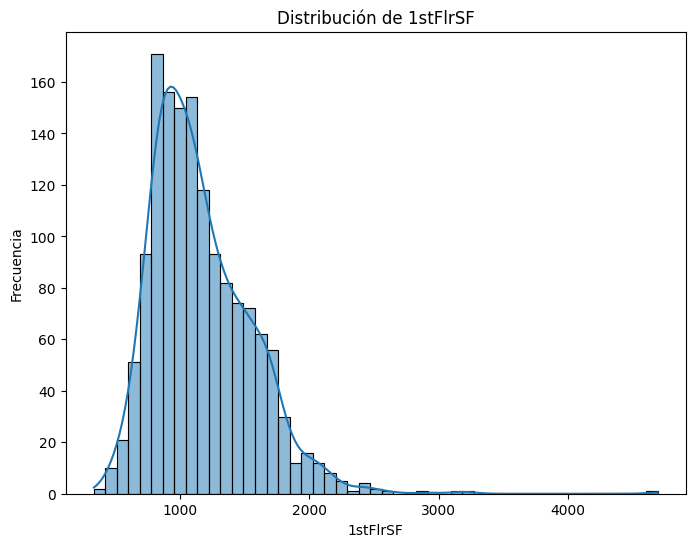

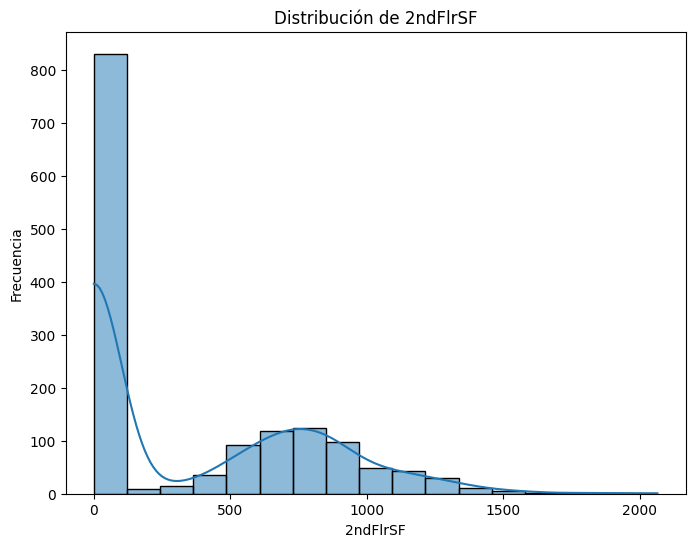

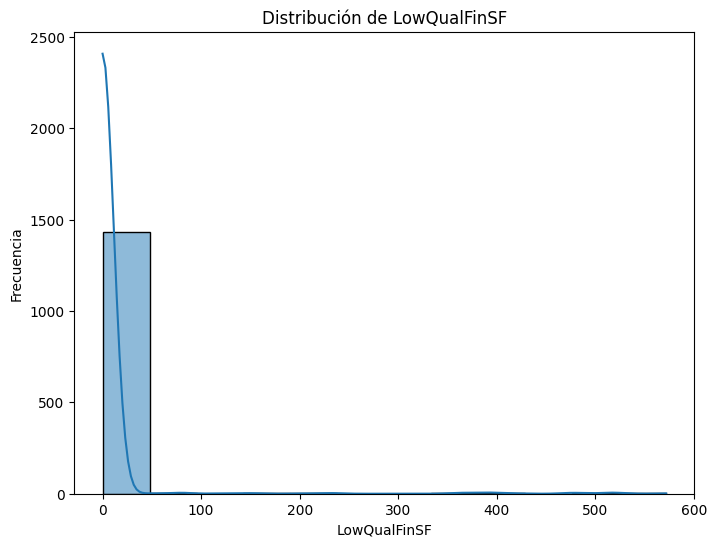

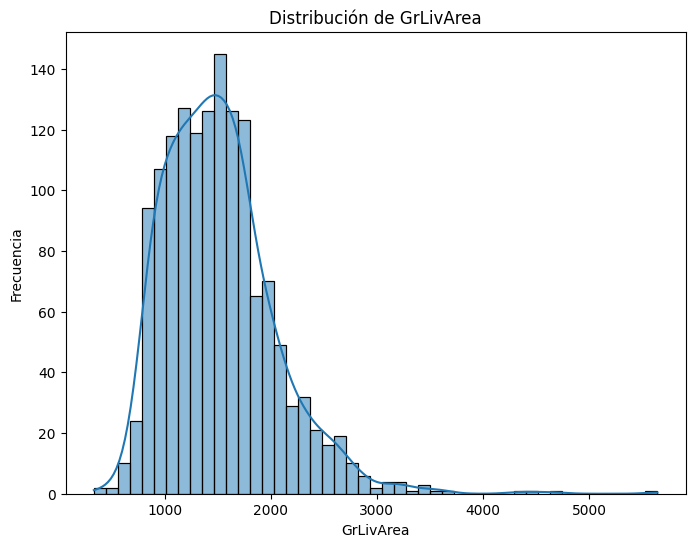

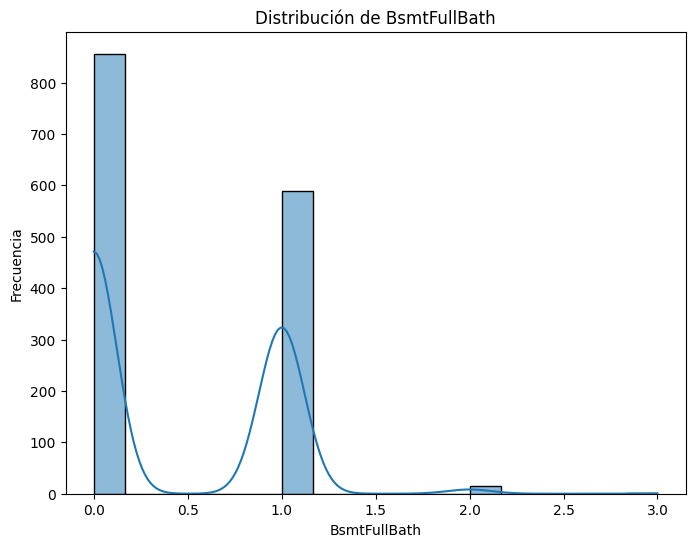

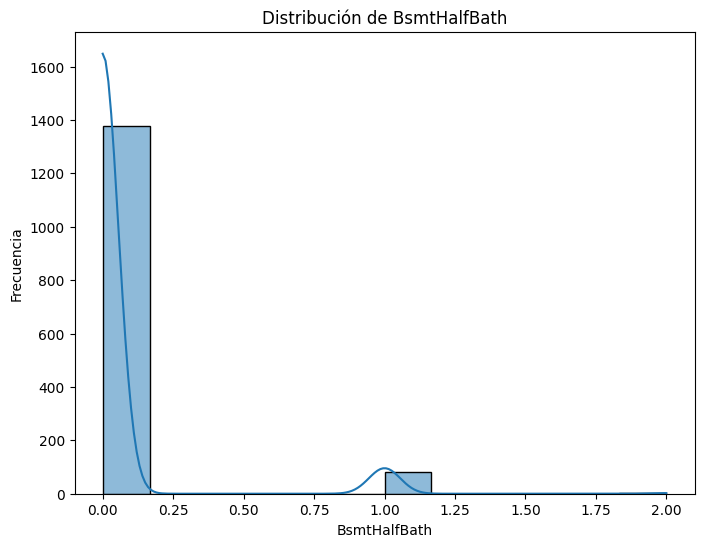

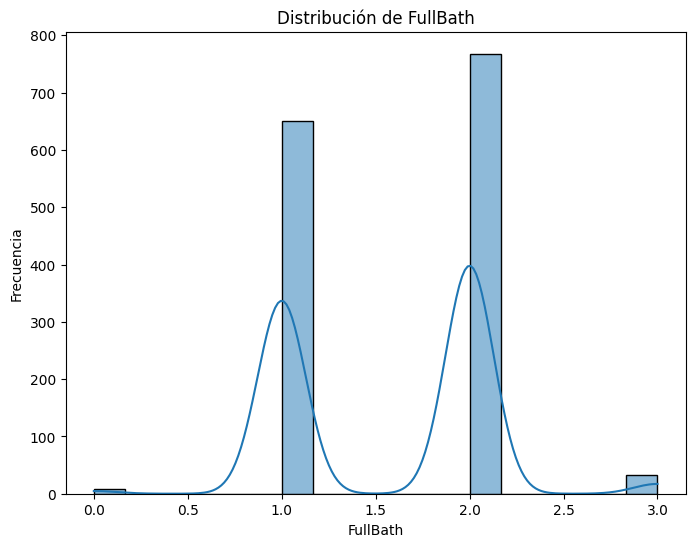

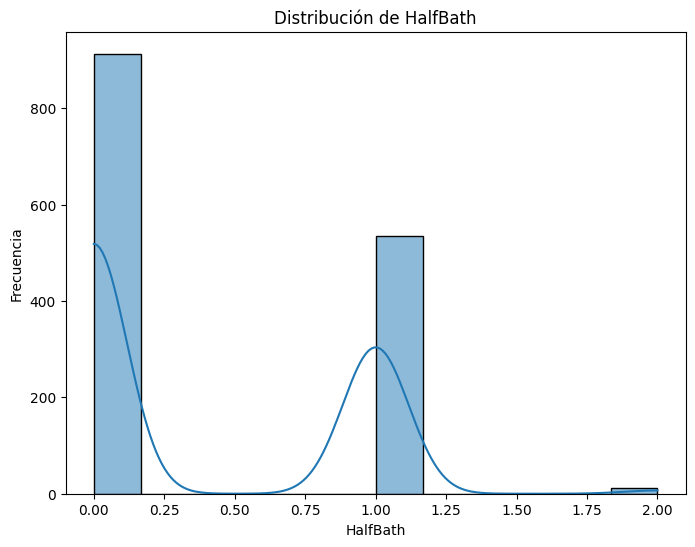

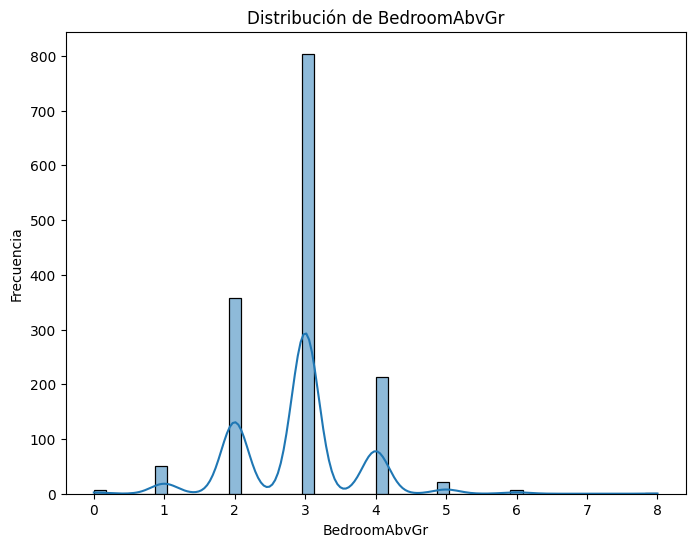

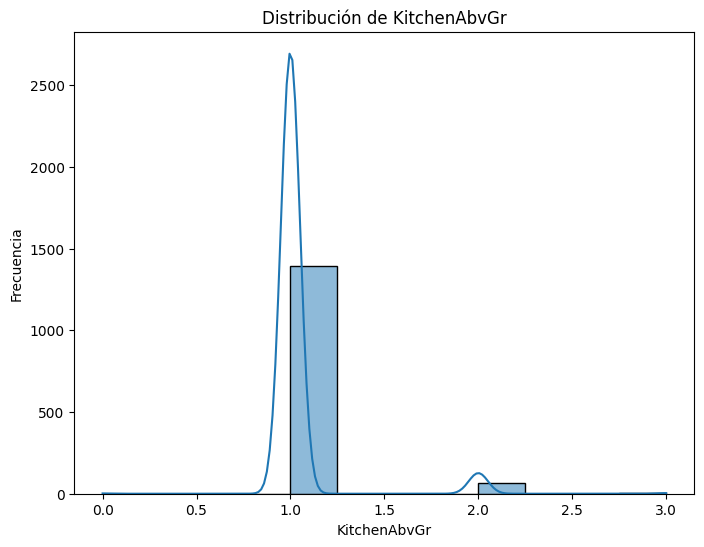

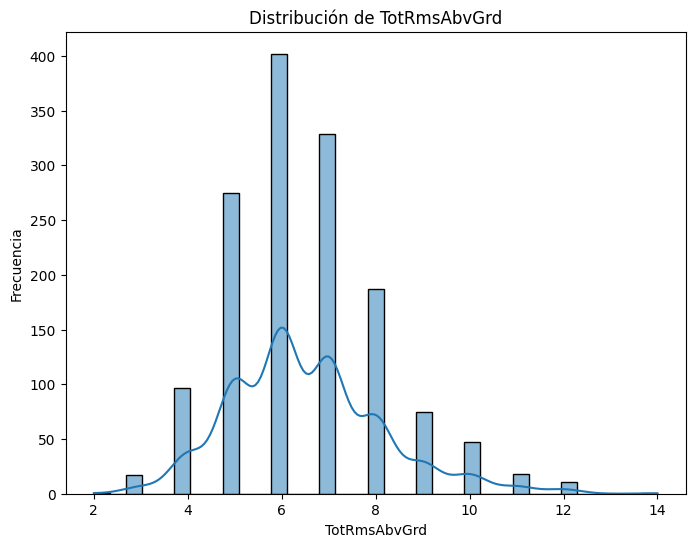

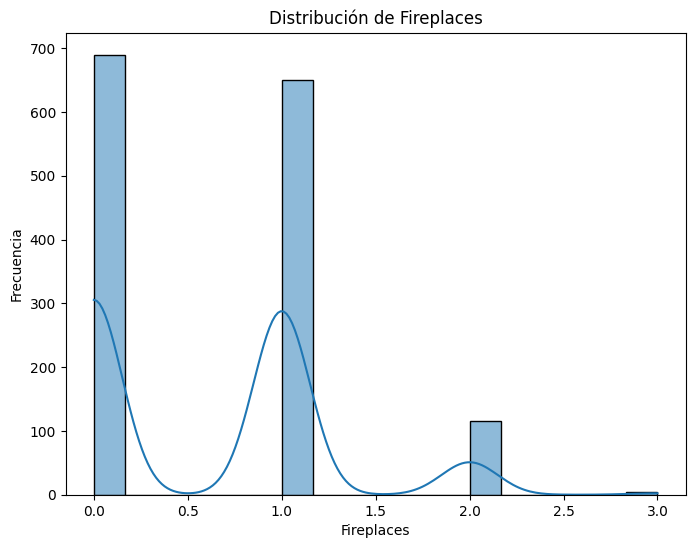

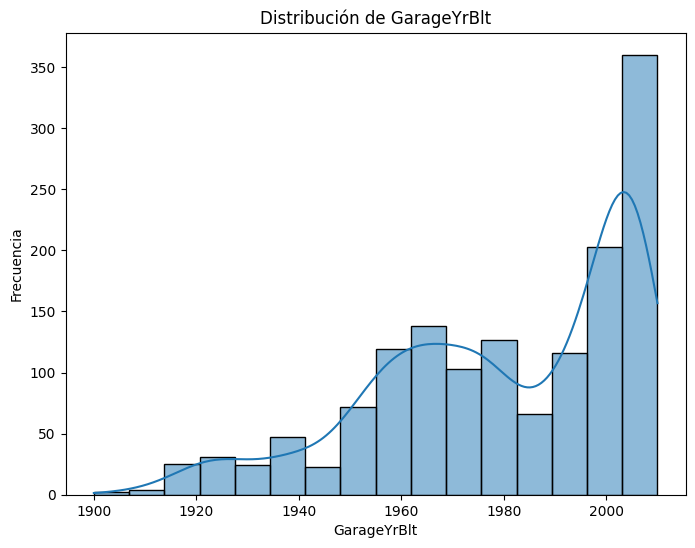

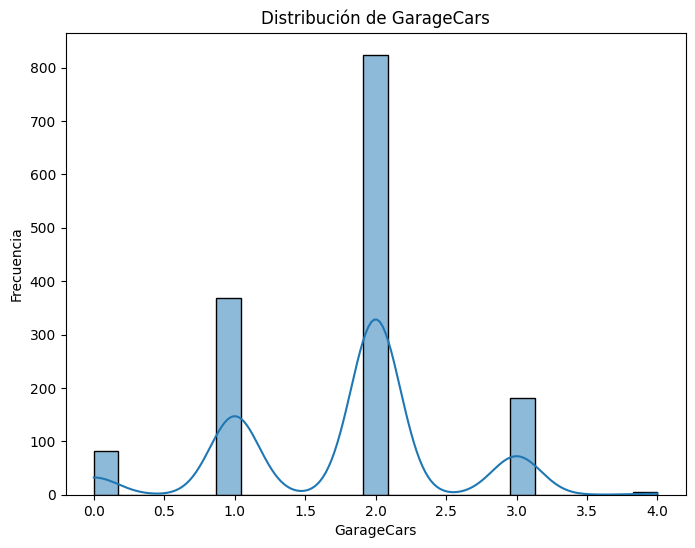

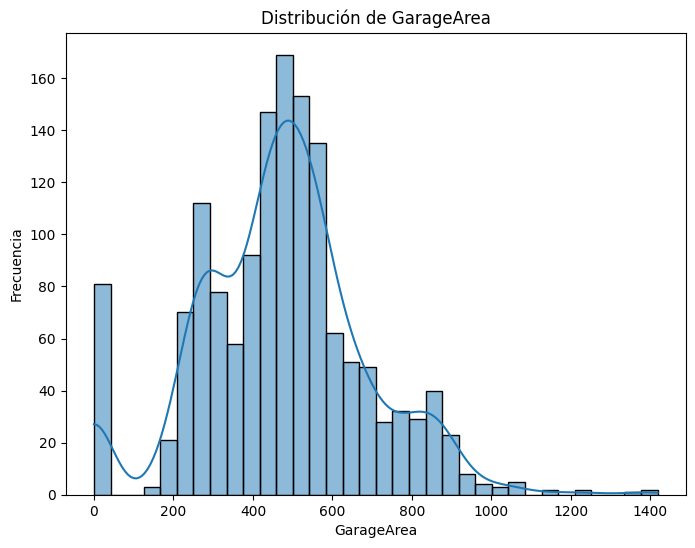

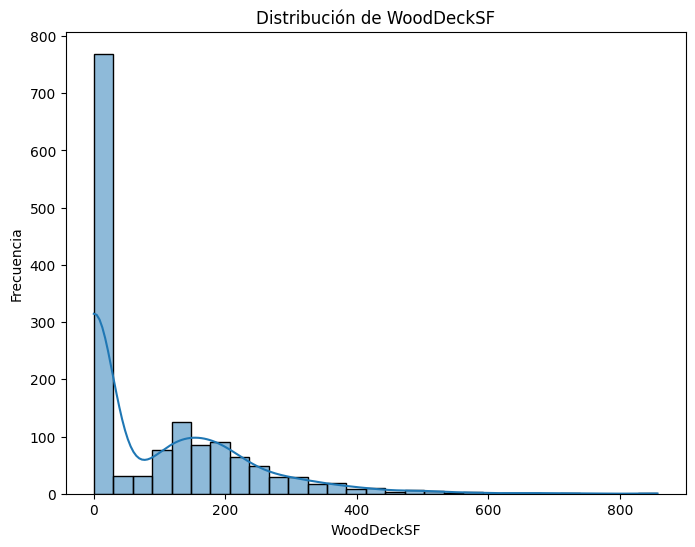

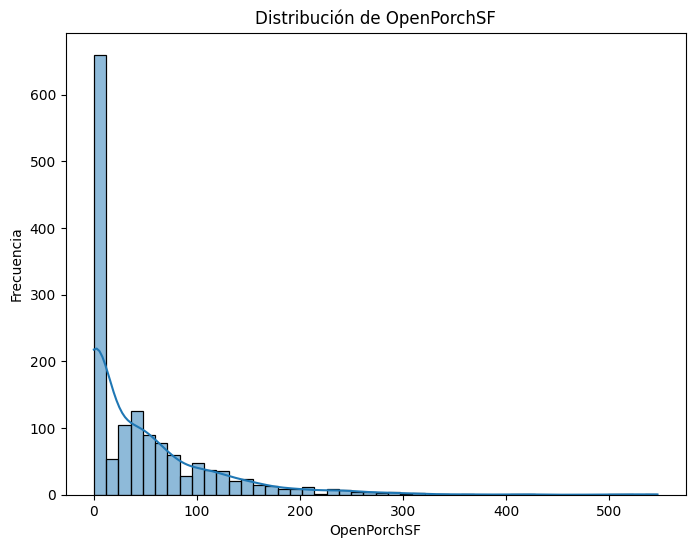

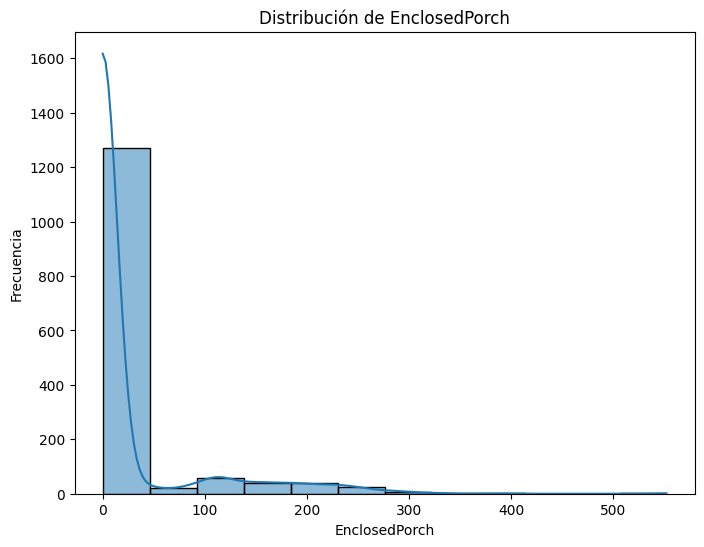

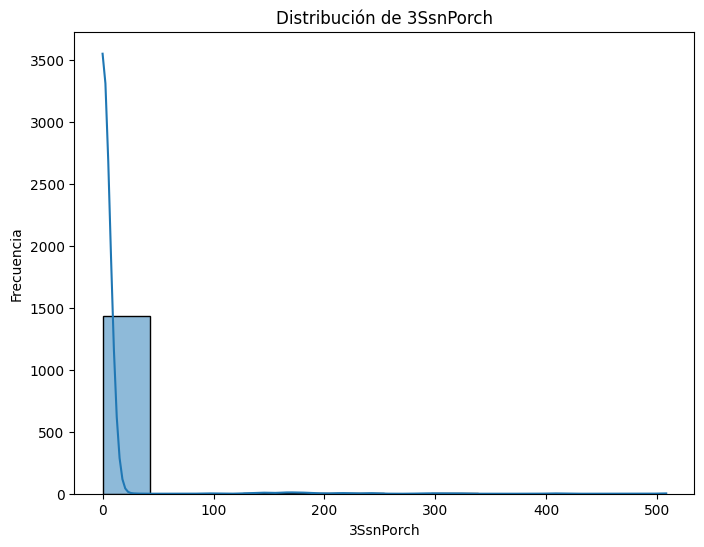

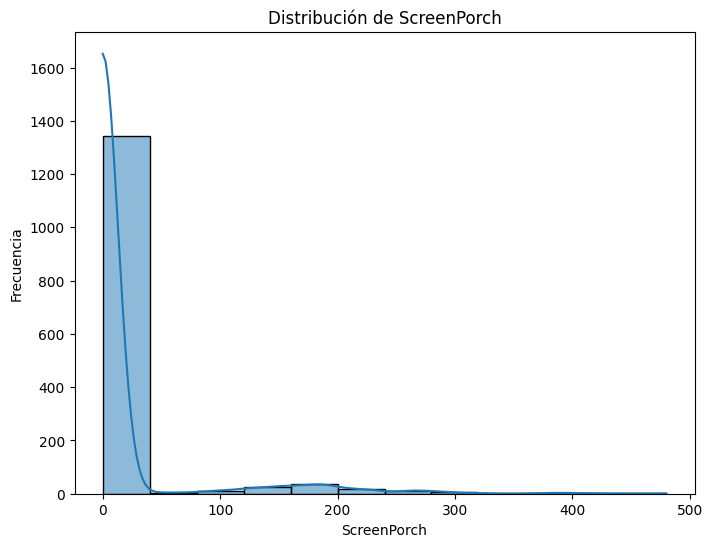

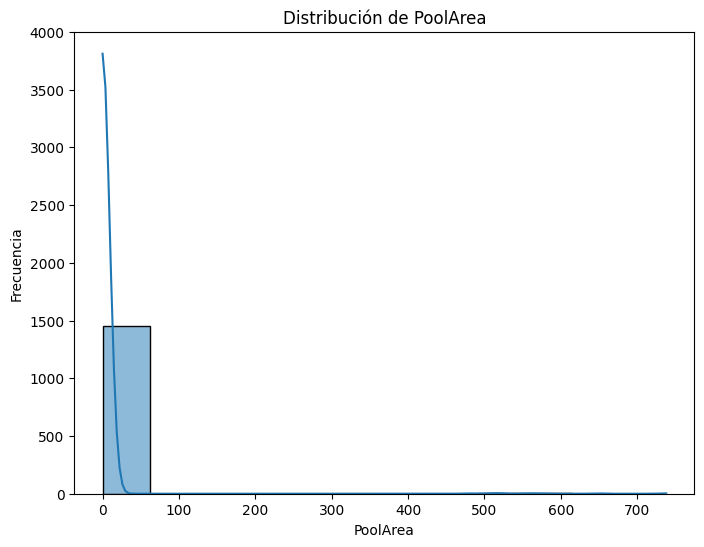

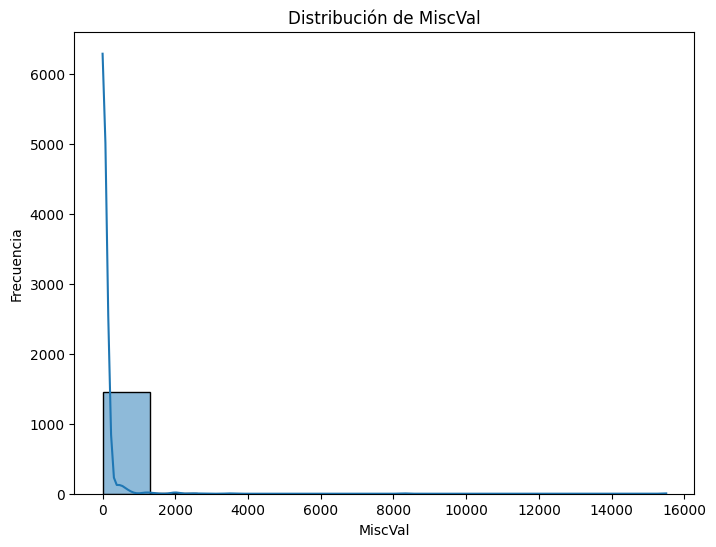

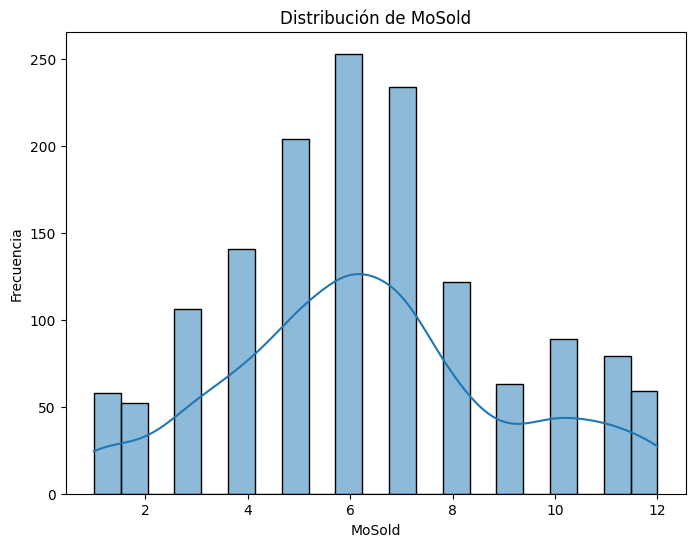

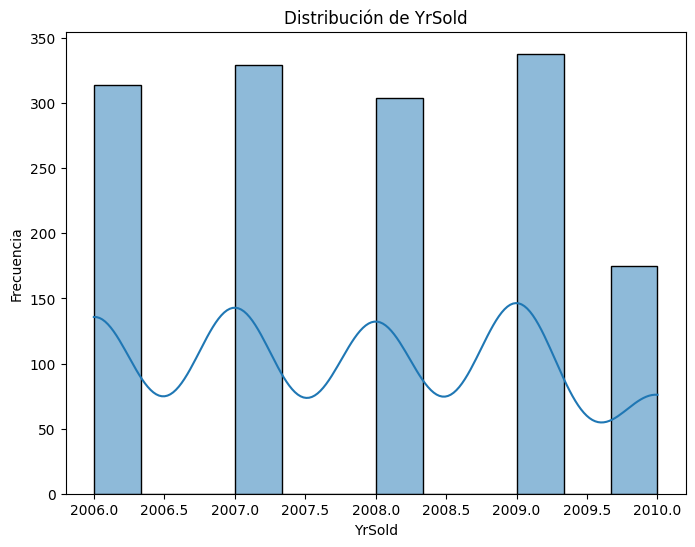

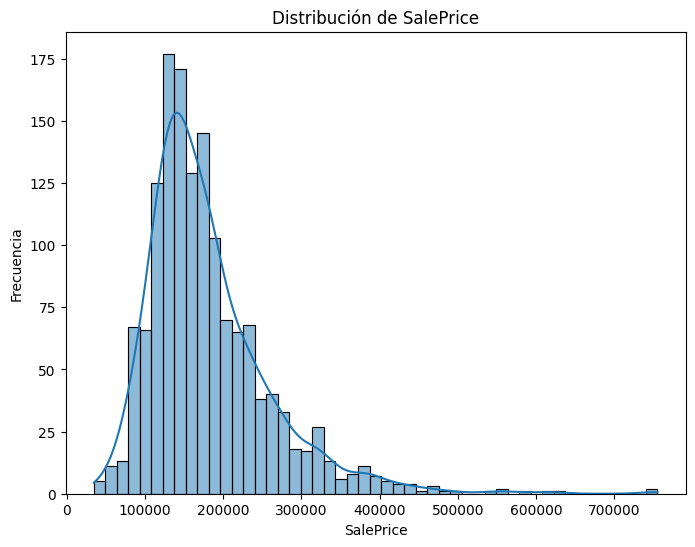

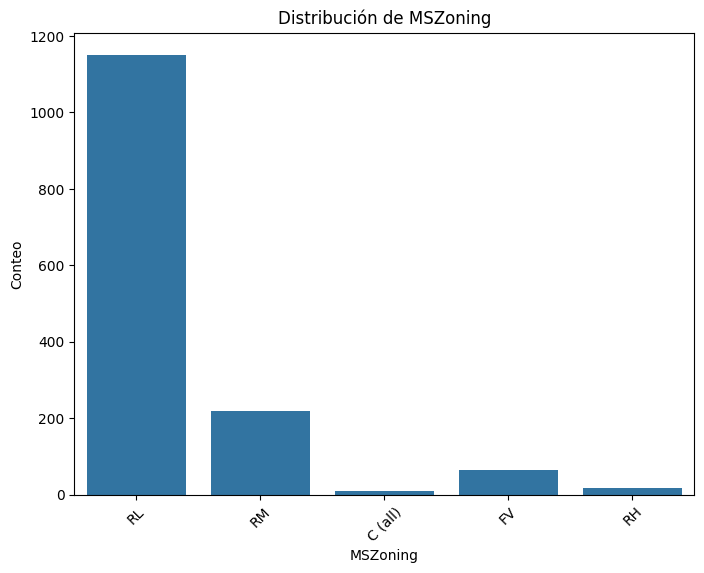

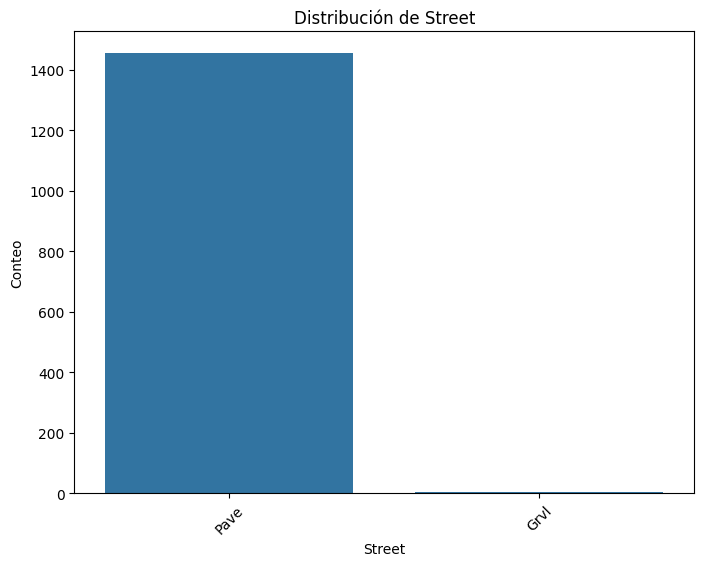

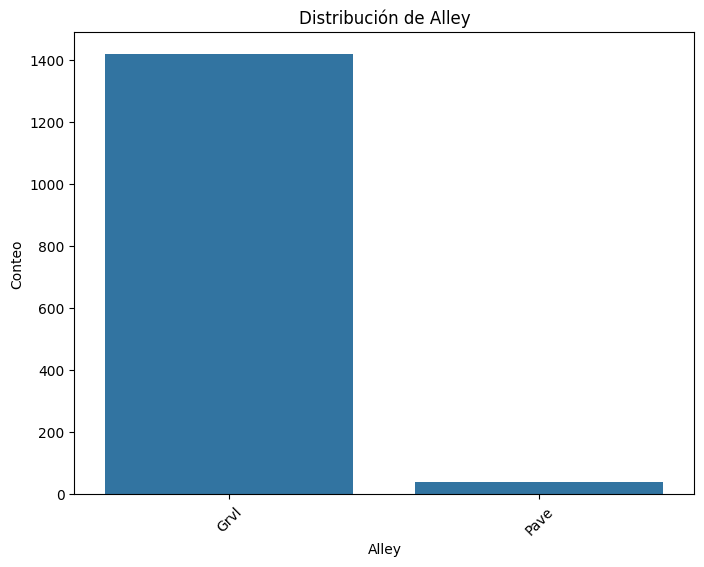

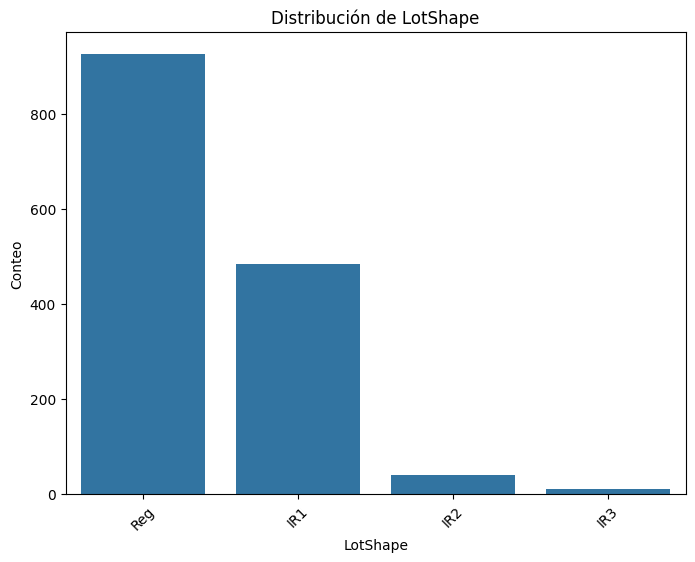

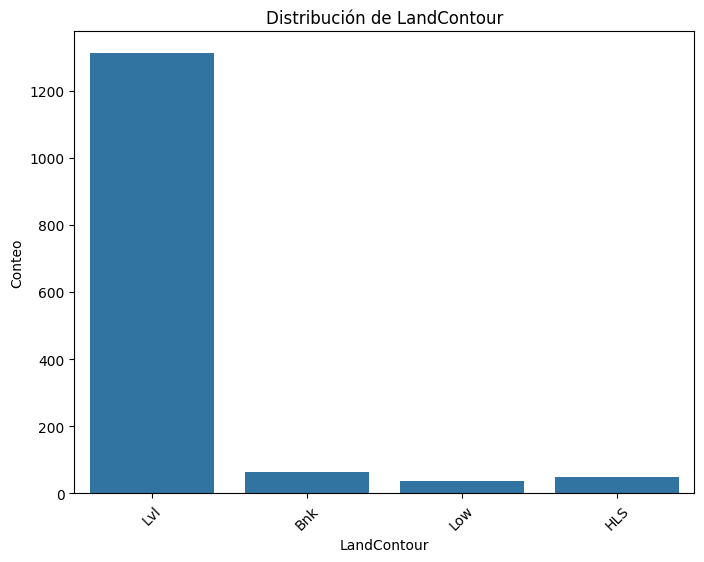

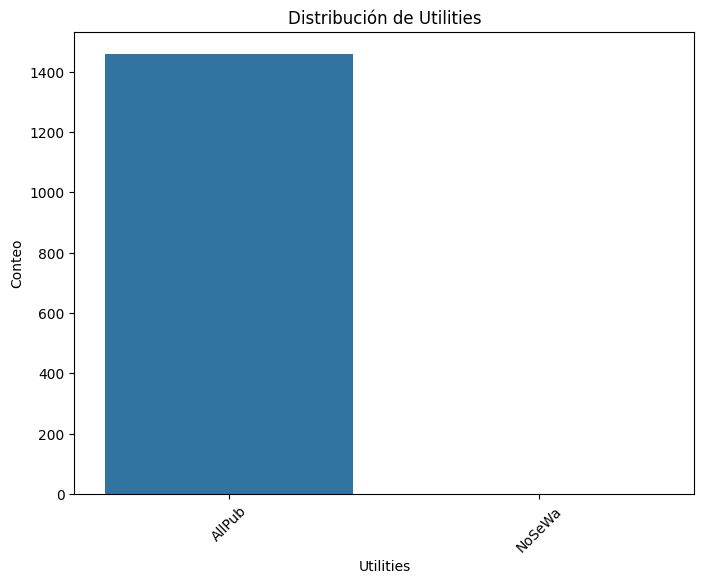

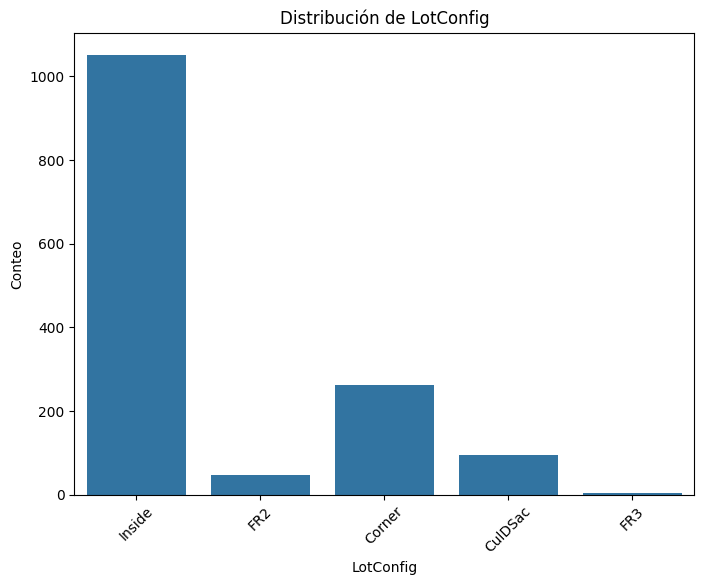

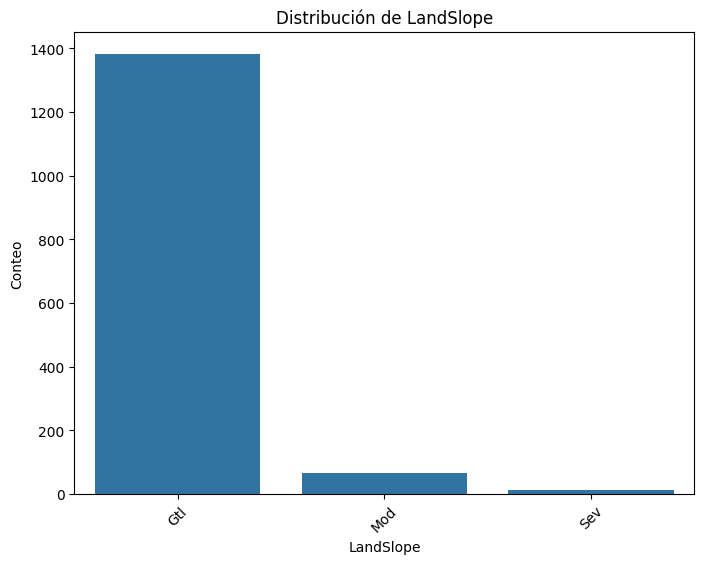

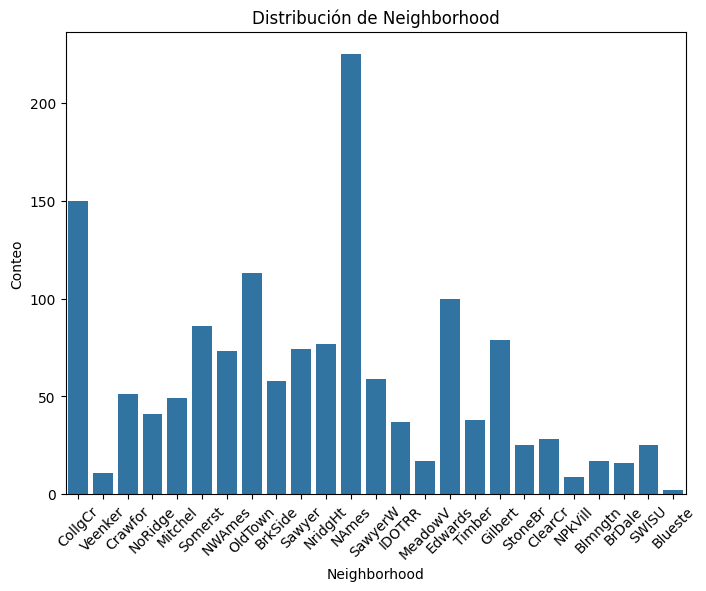

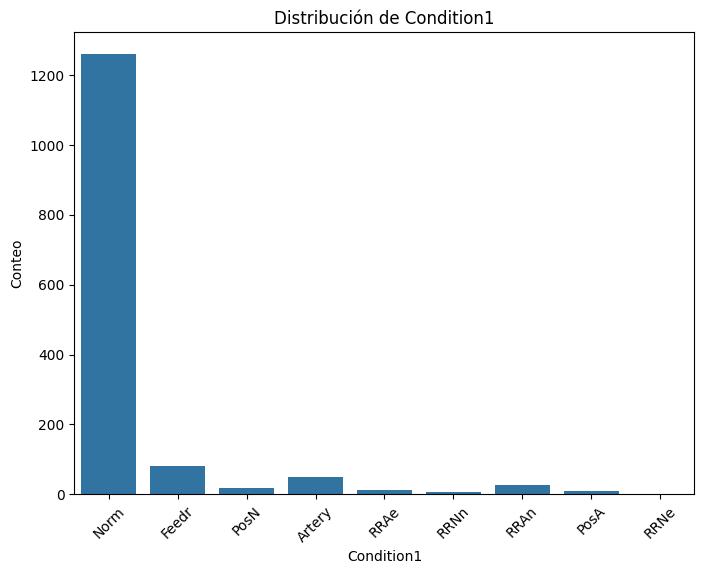

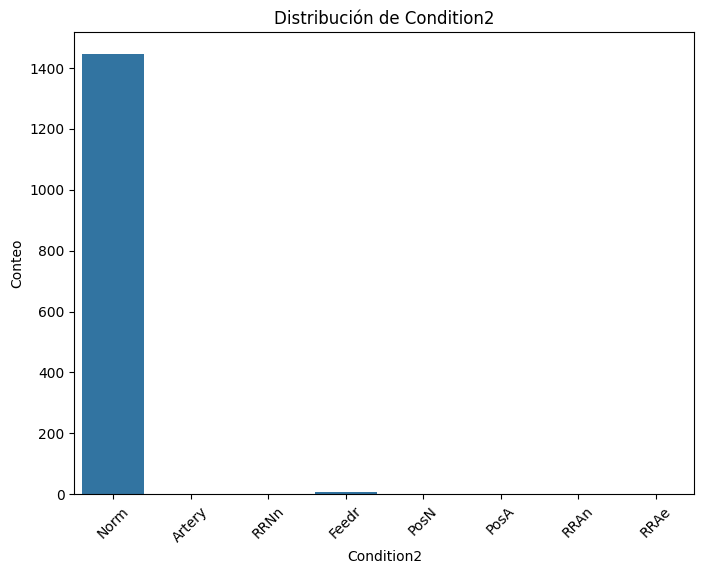

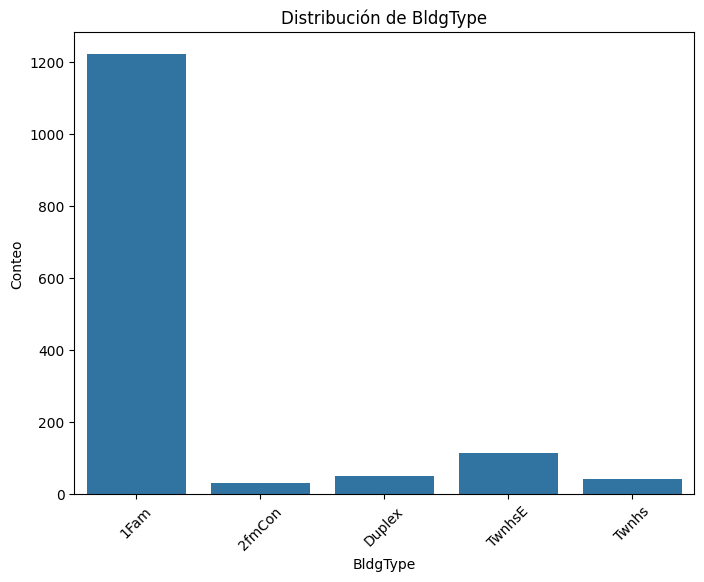

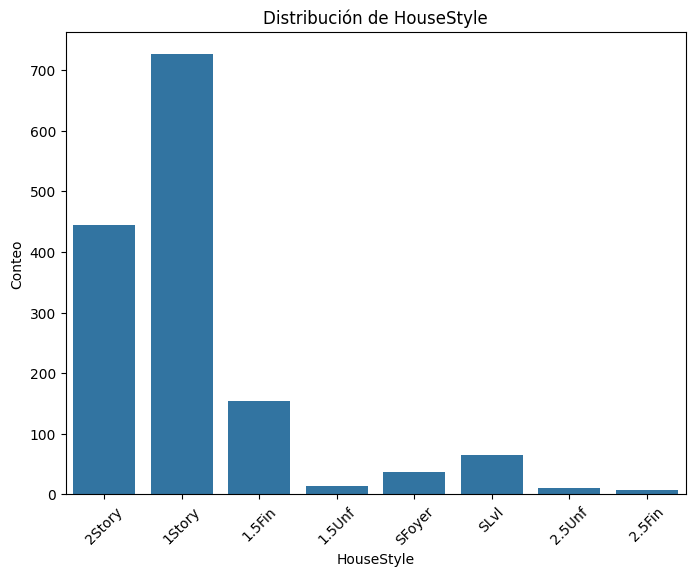

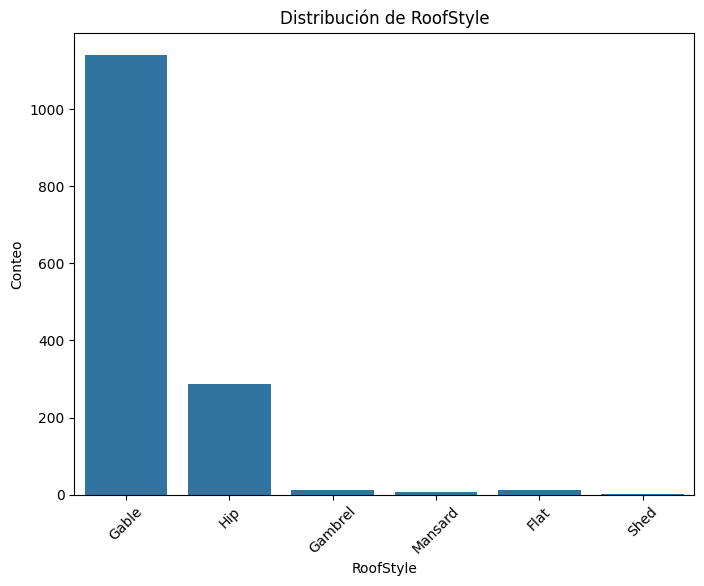

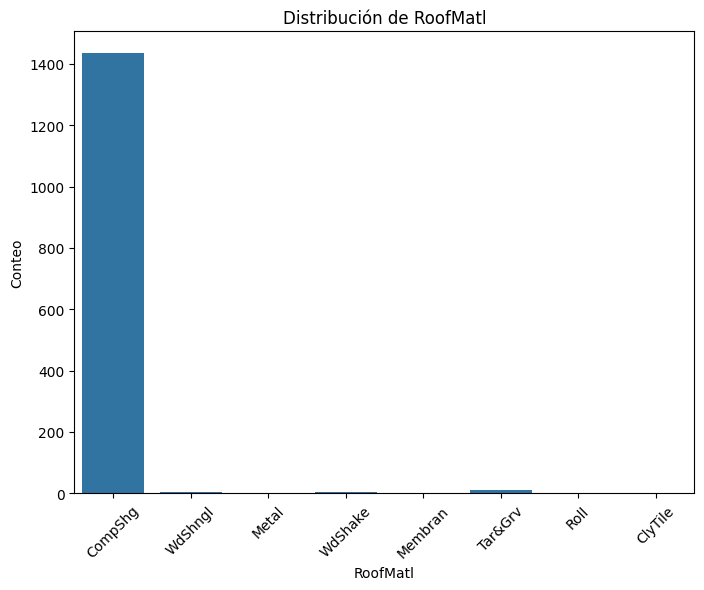

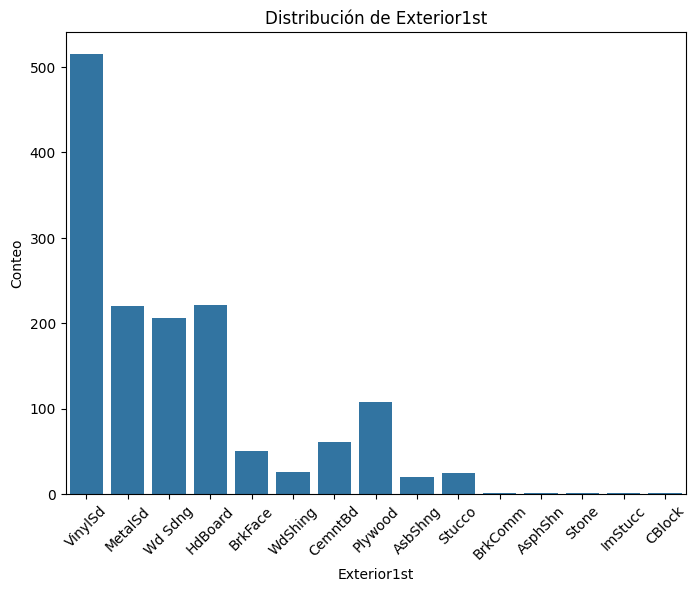

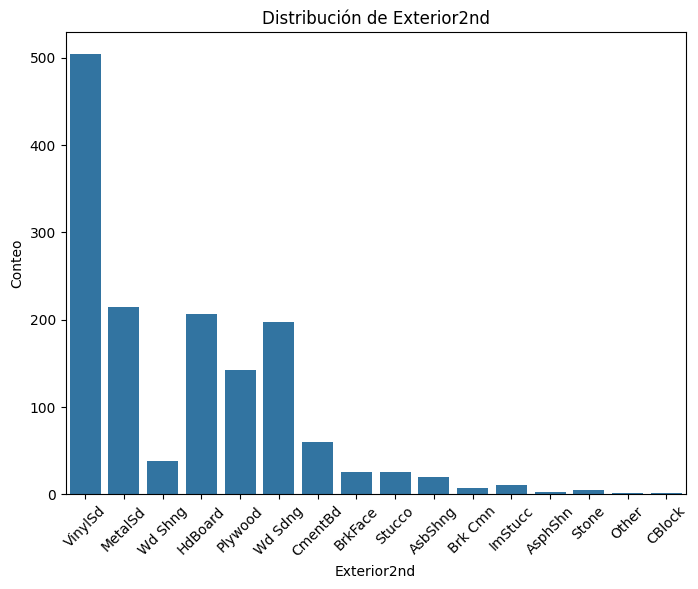

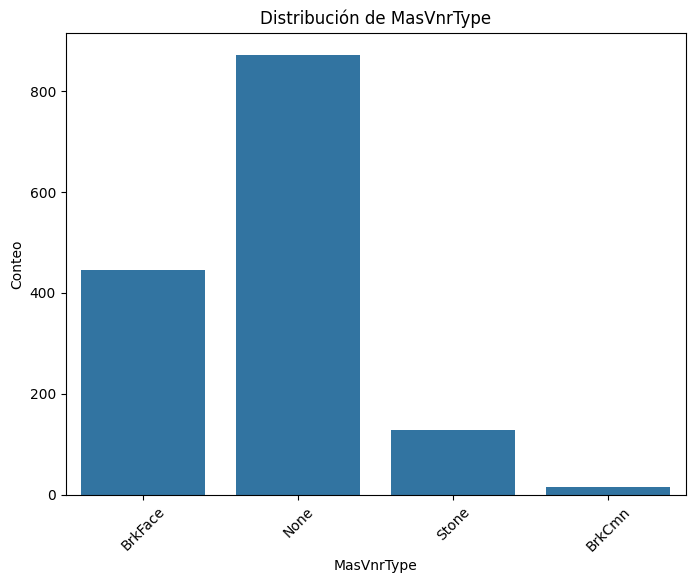

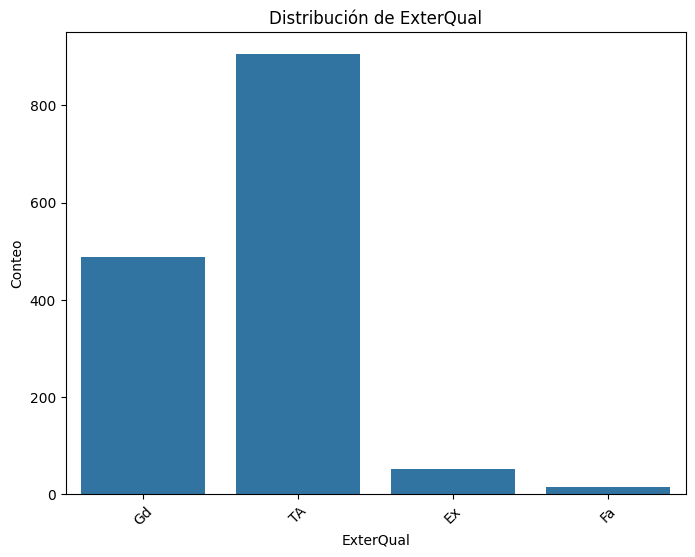

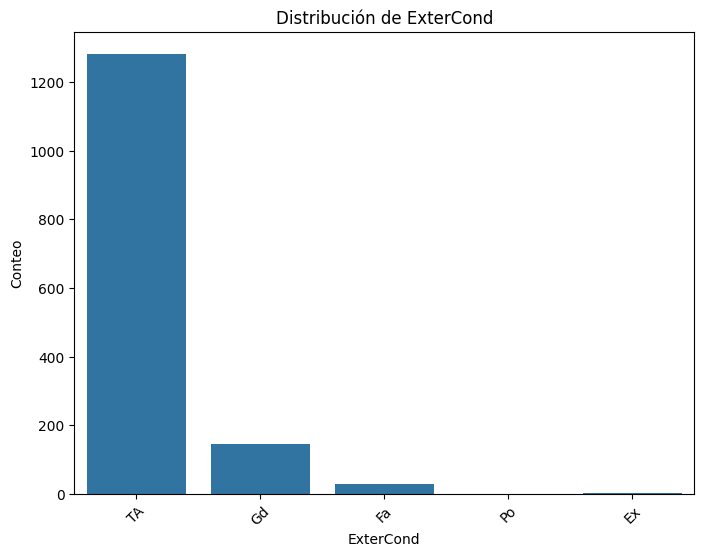

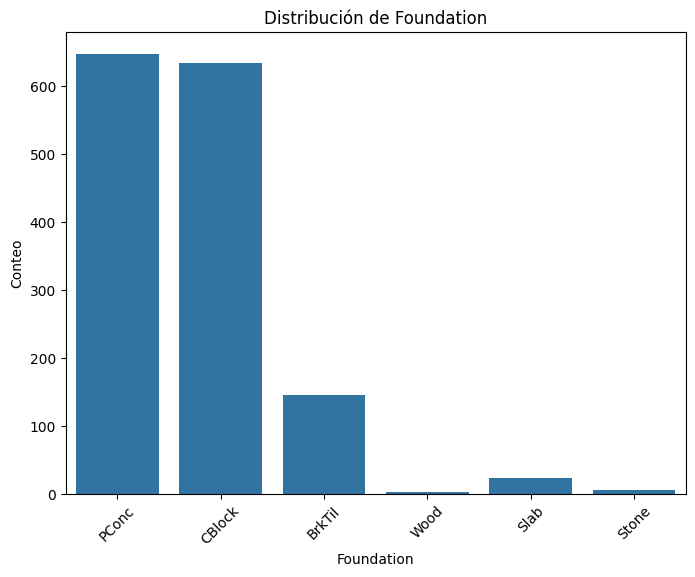

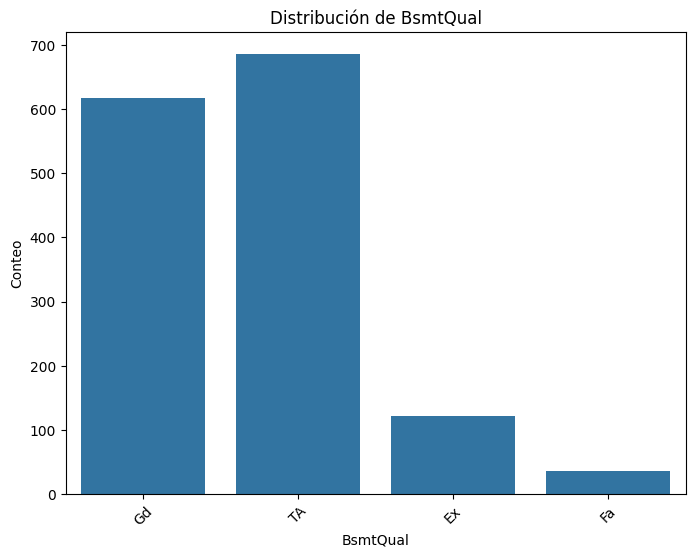

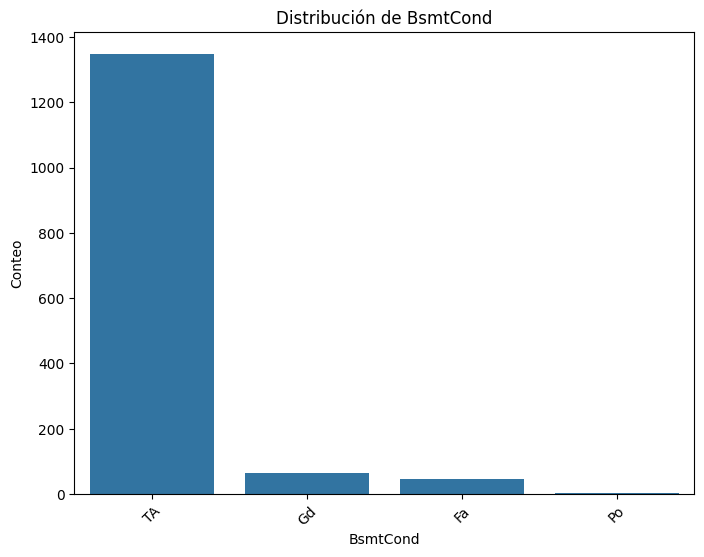

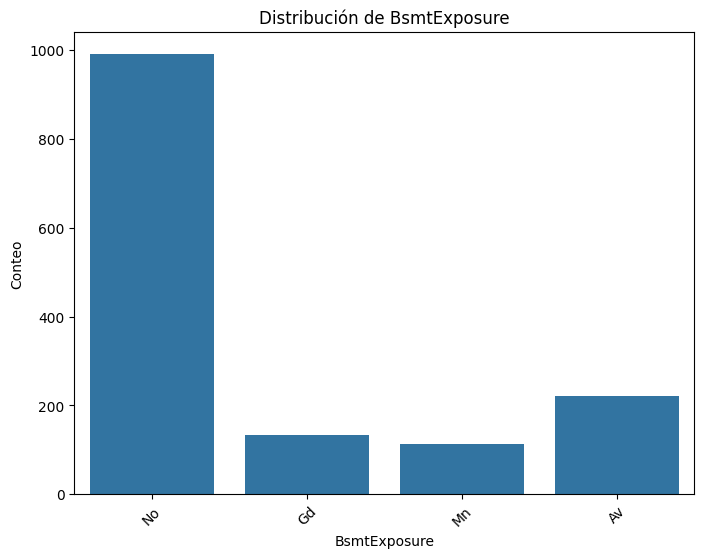

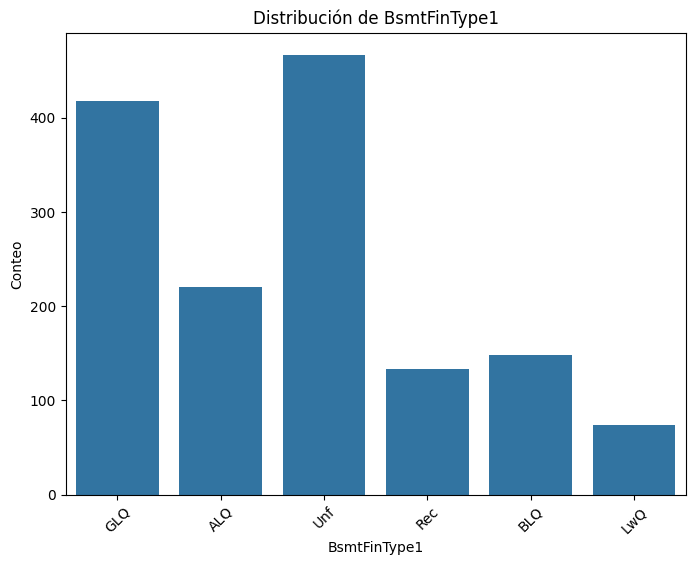

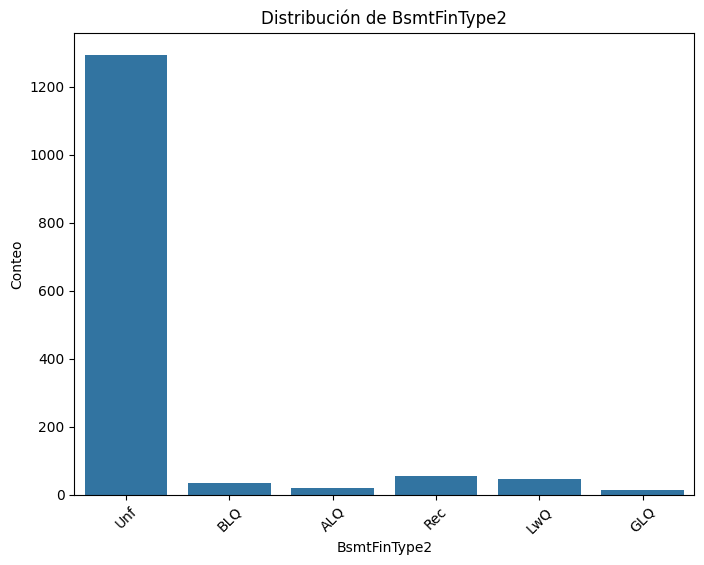

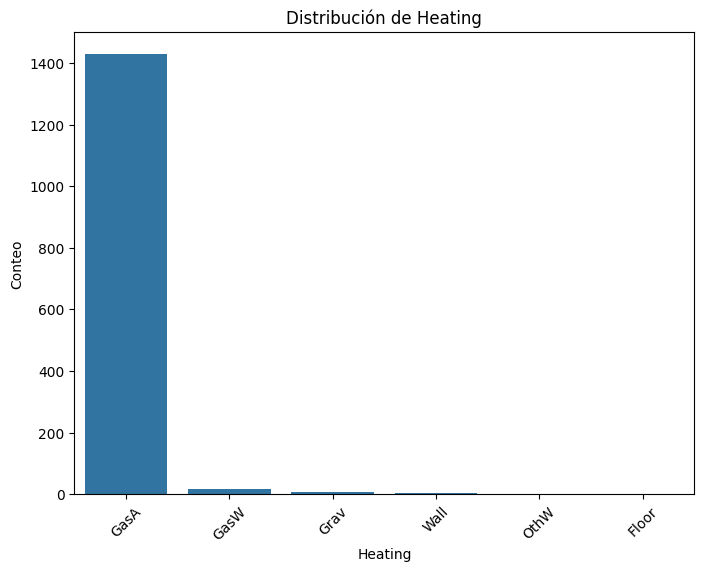

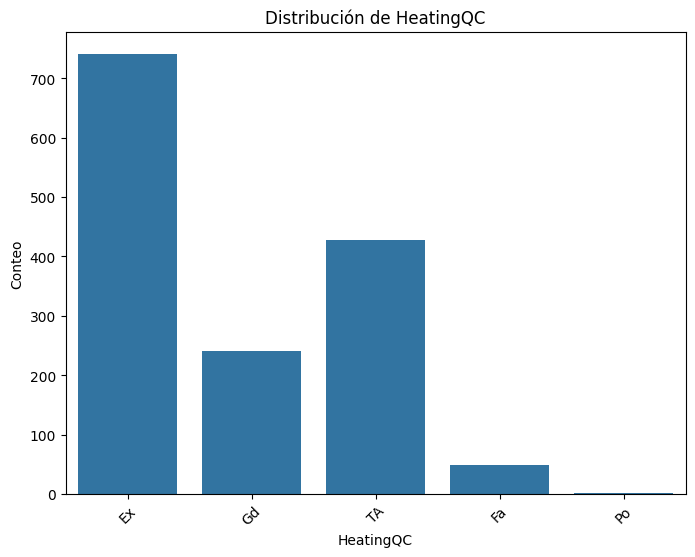

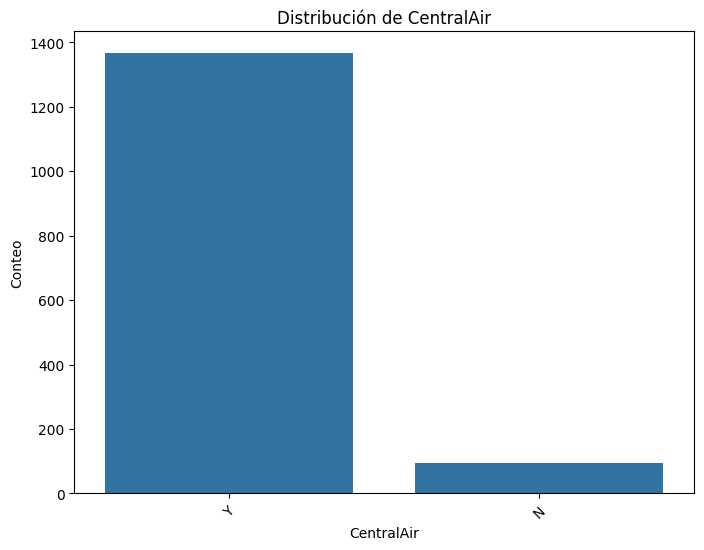

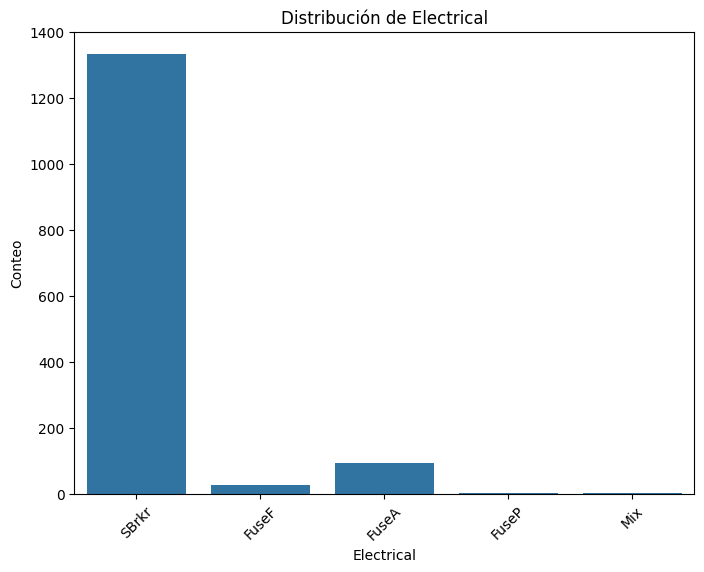

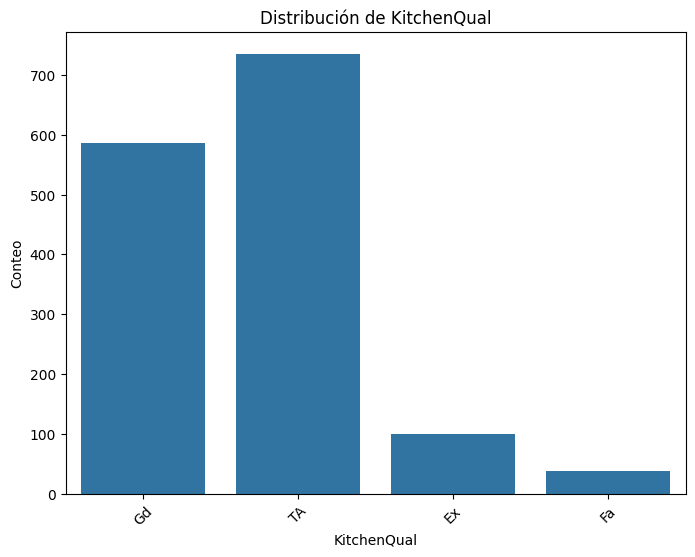

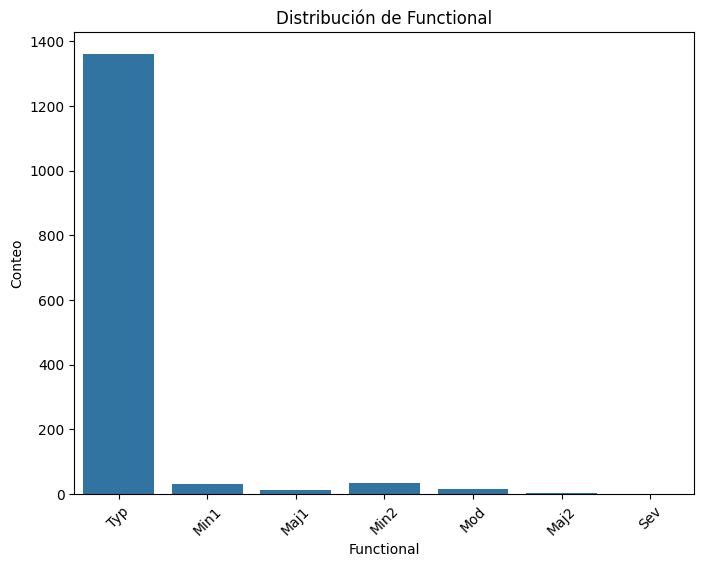

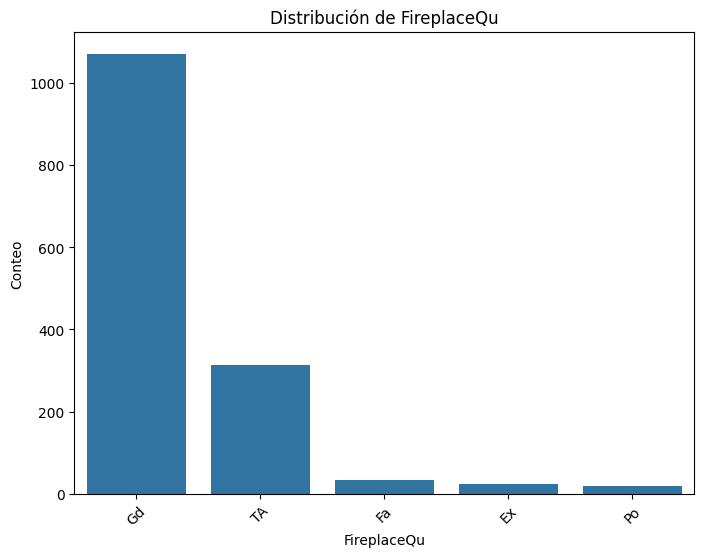

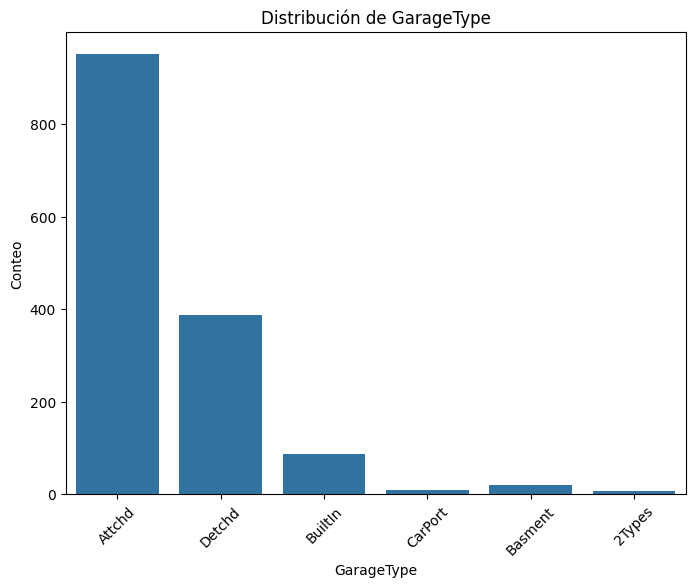

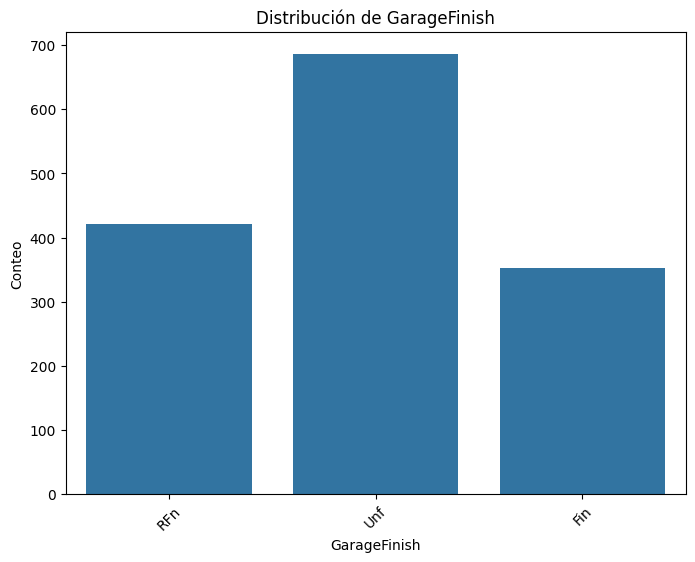

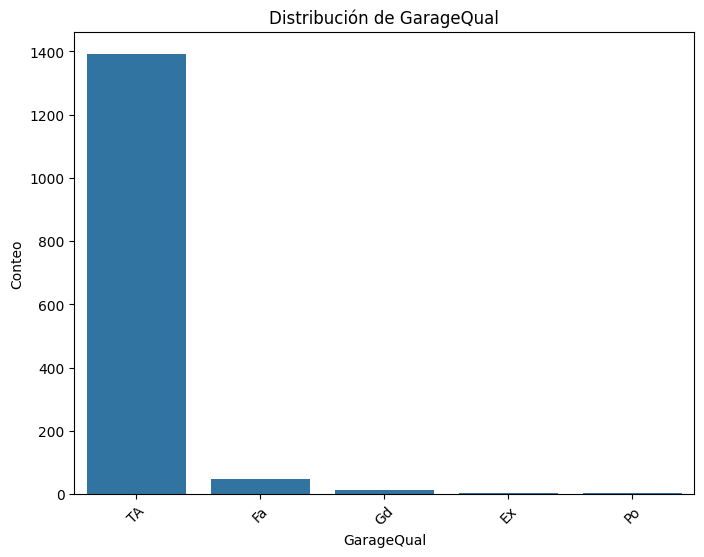

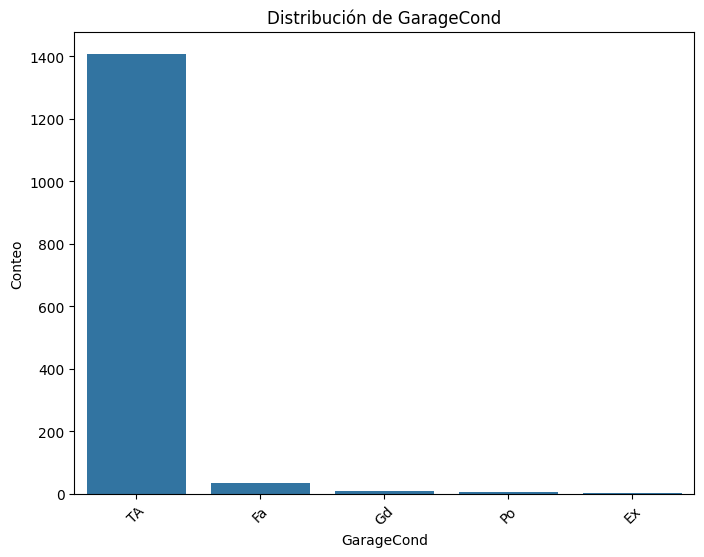

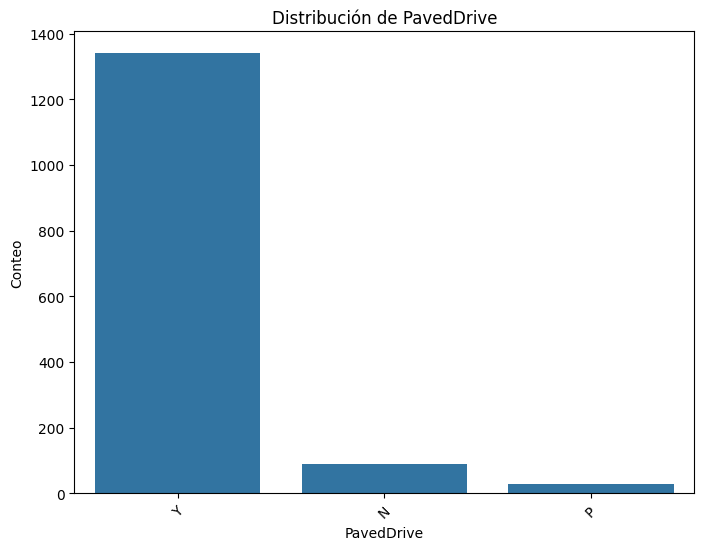

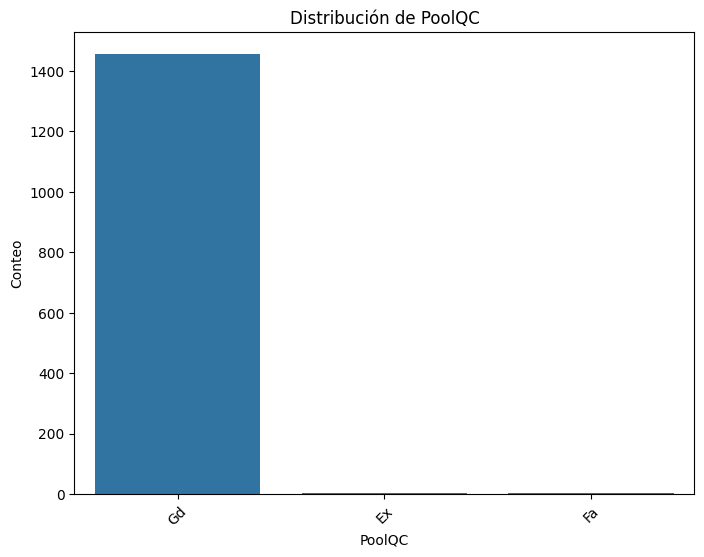

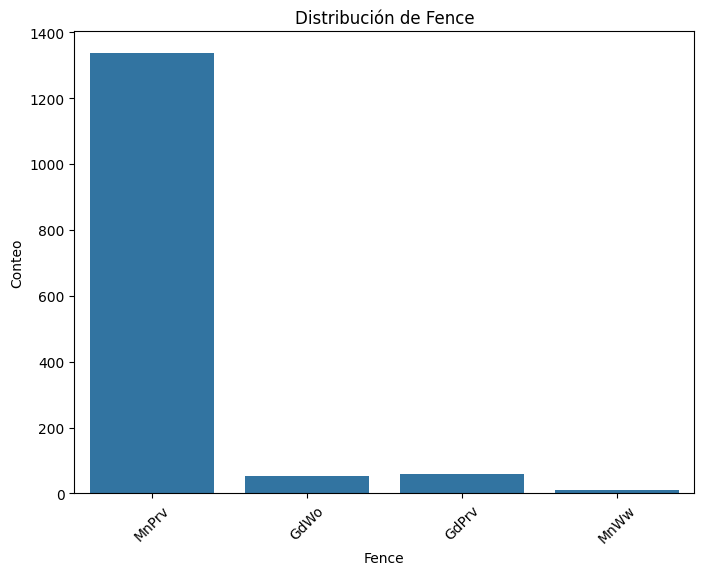

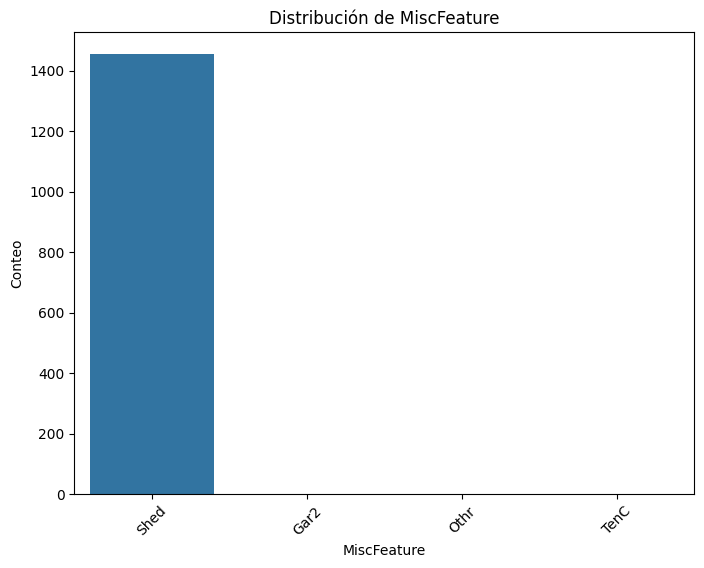

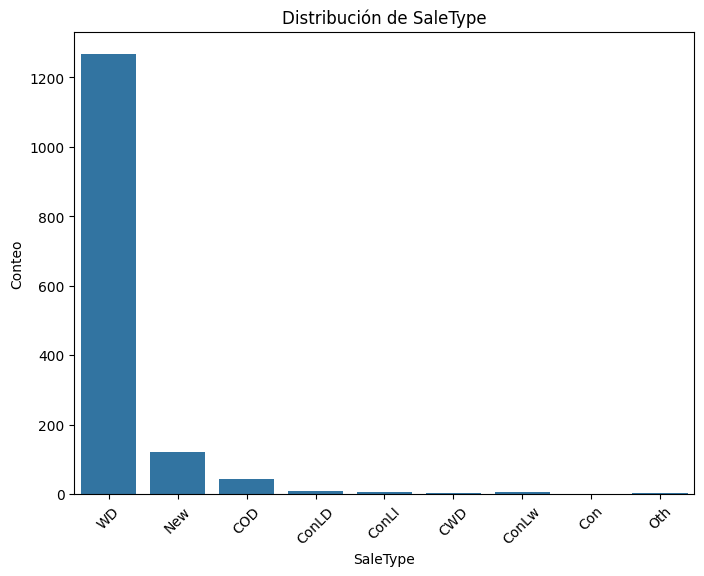

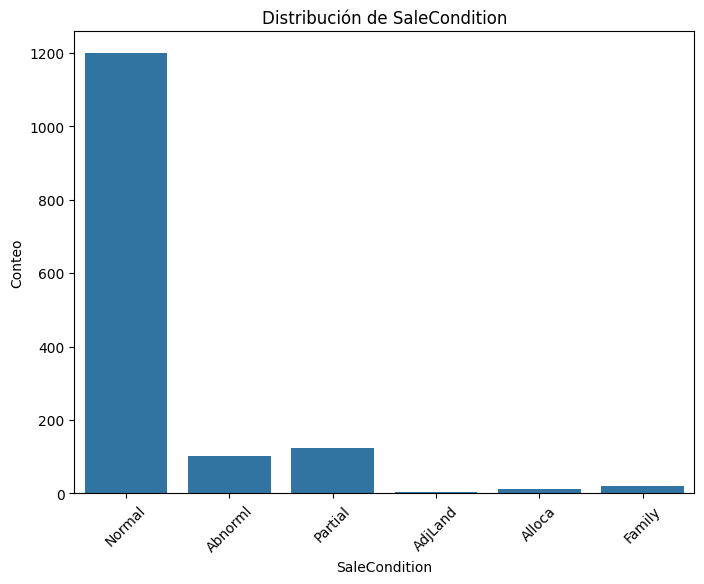

In [4]:
# Visualizar la distribución de las variables numéricas mediante histogramas
numeric_cols = df2.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df2[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

# Visualizar la distribución de las variables categóricas mediante gráficos de barras
categorical_cols = df2.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df2, x=col)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Conteo')
    plt.xticks(rotation=45)
    plt.show()

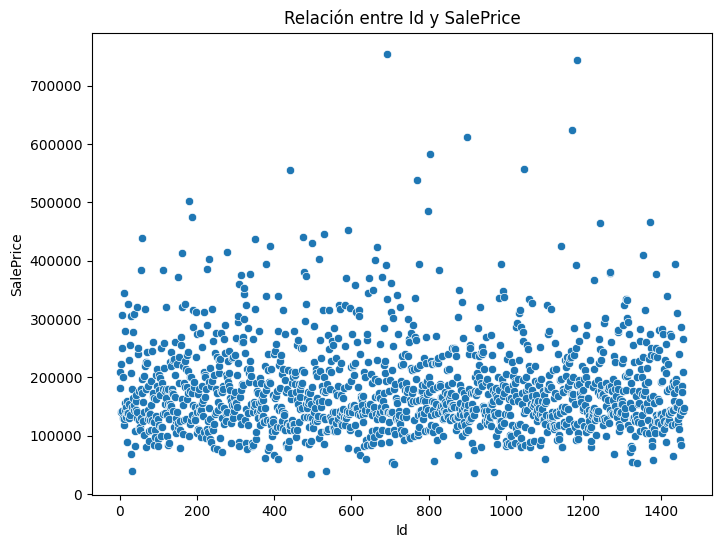

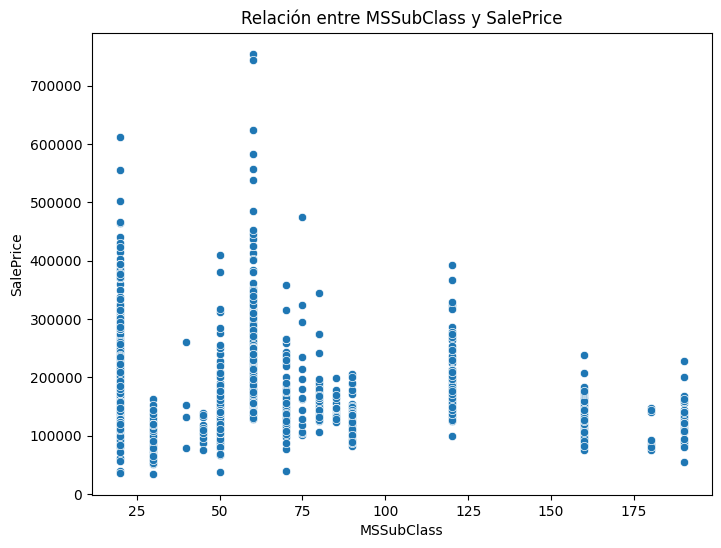

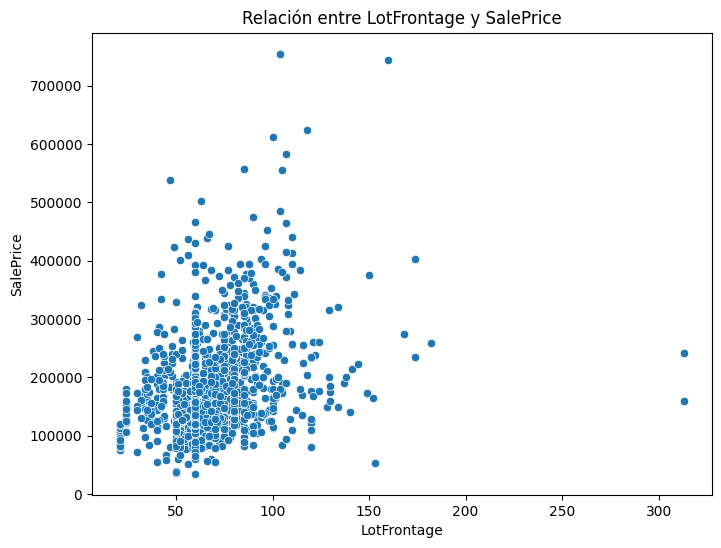

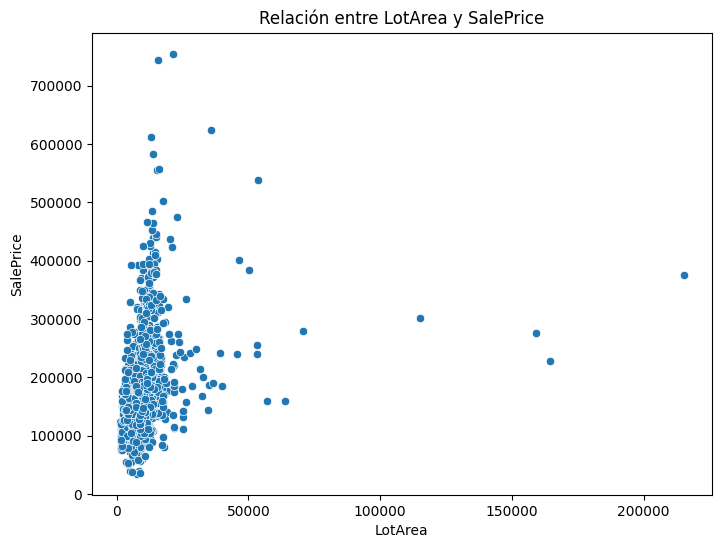

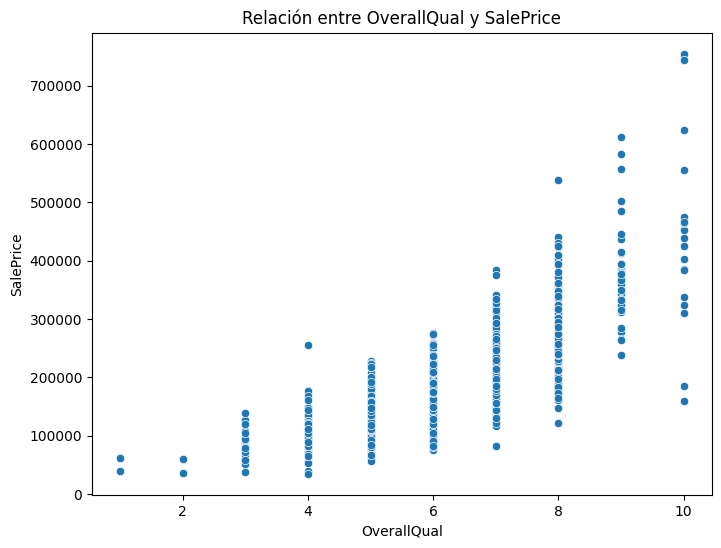

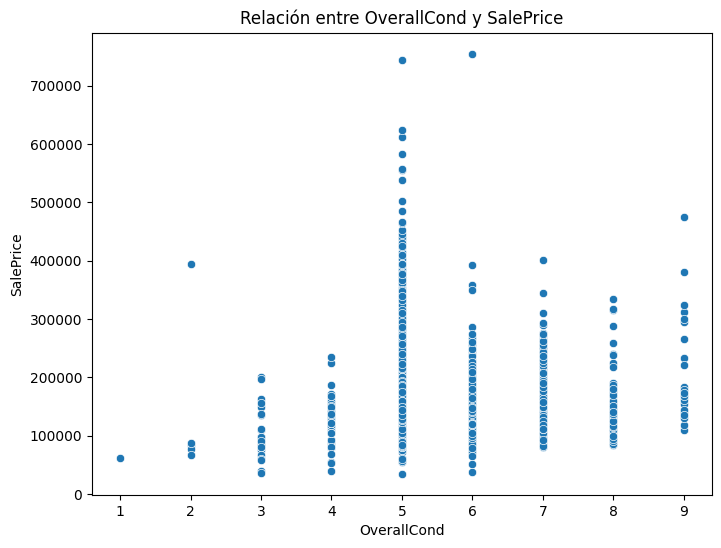

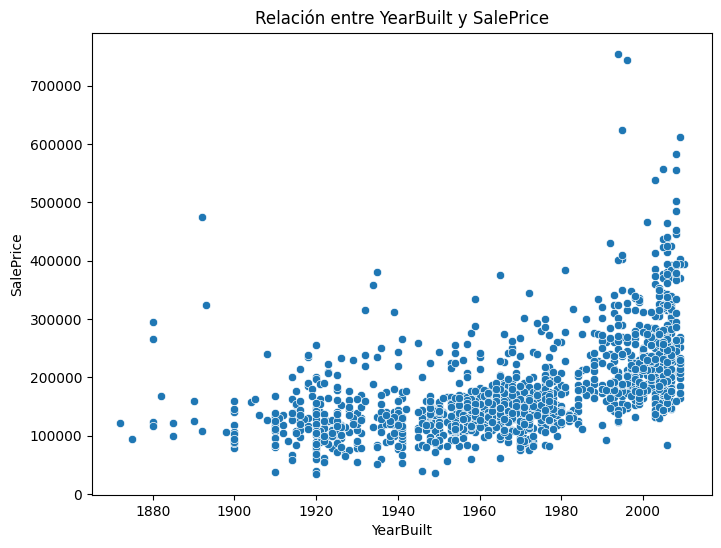

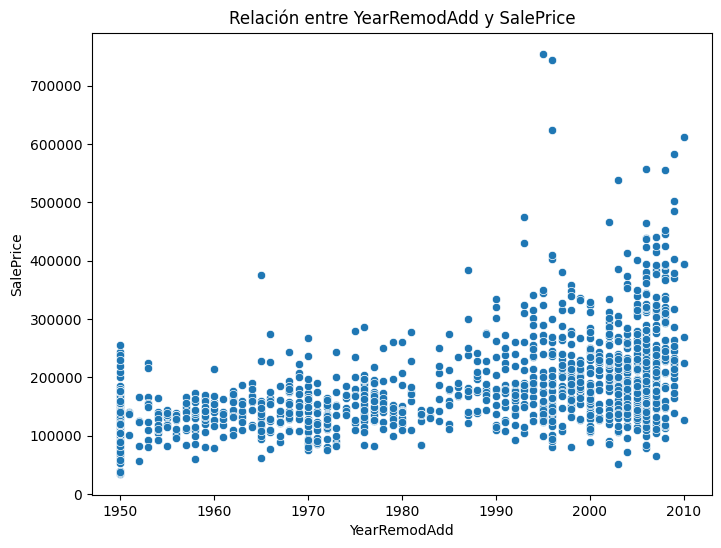

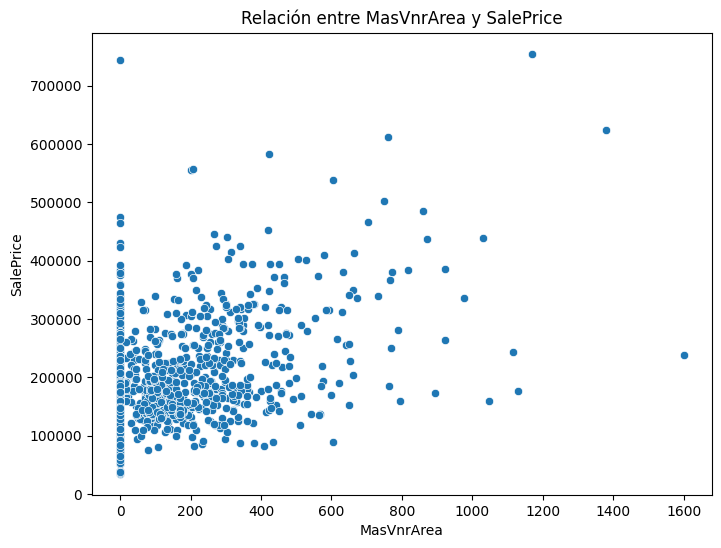

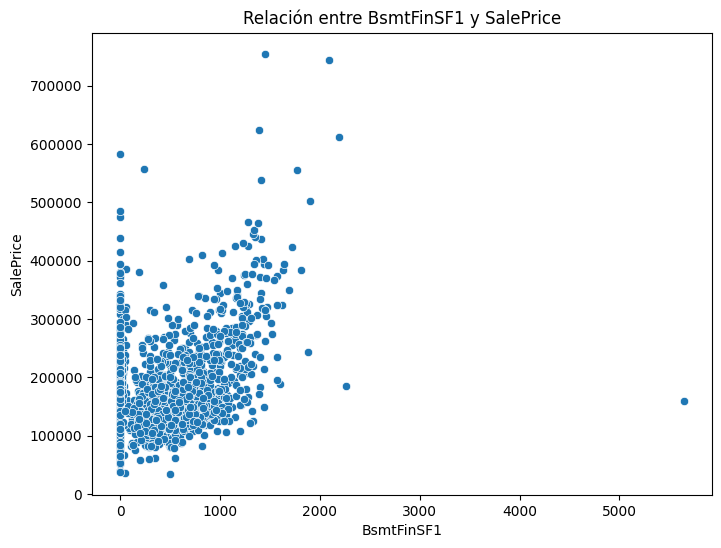

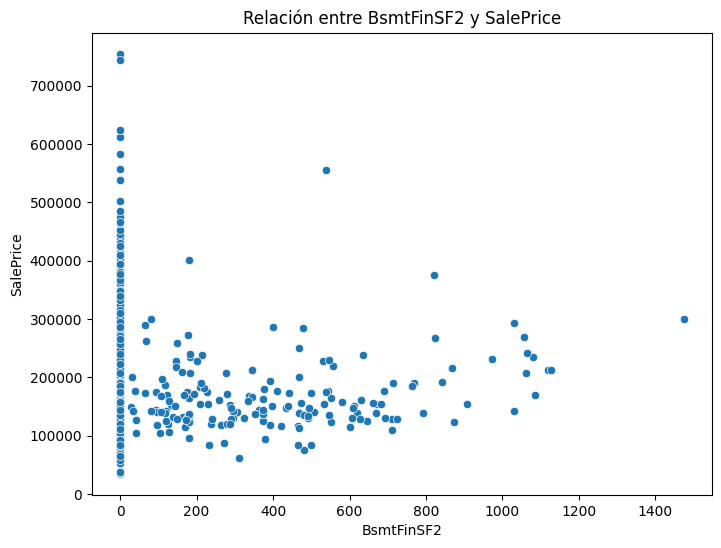

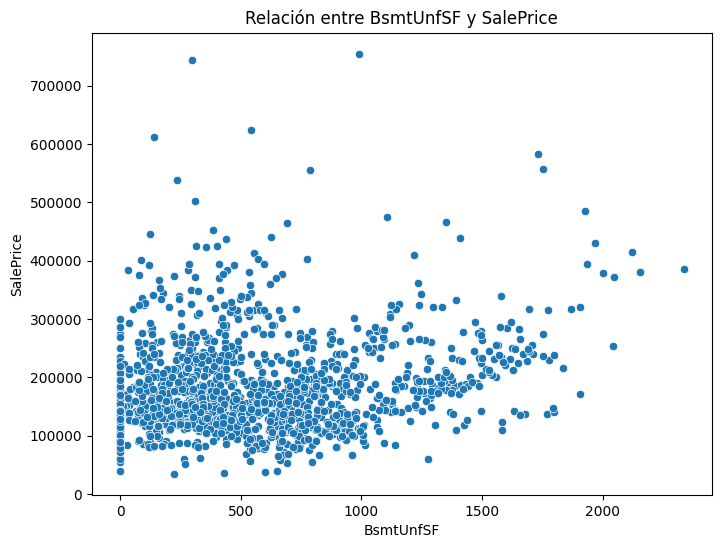

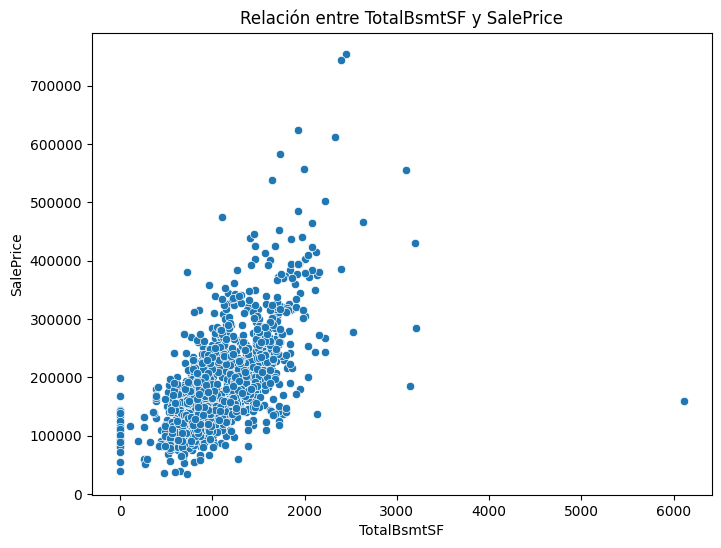

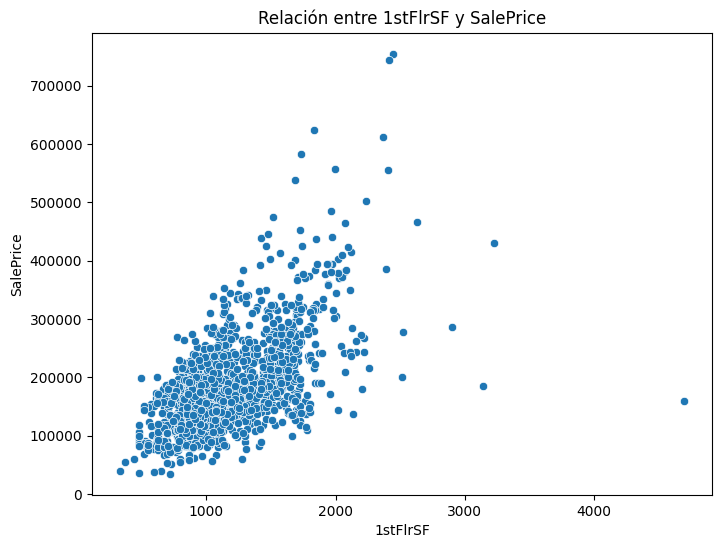

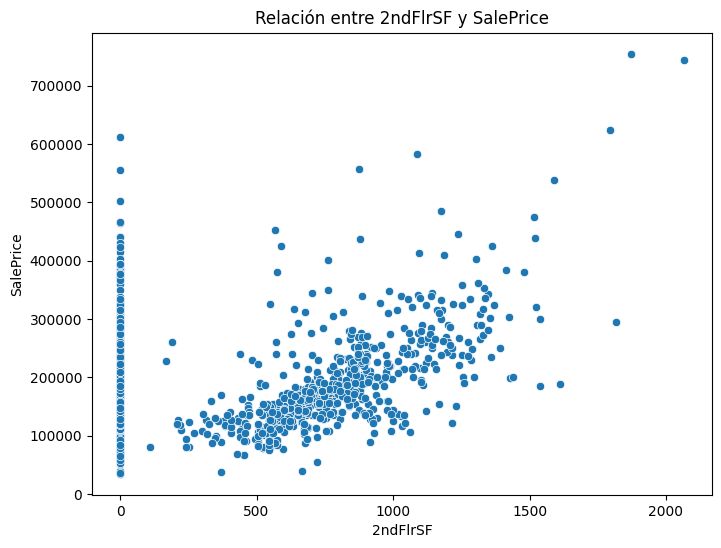

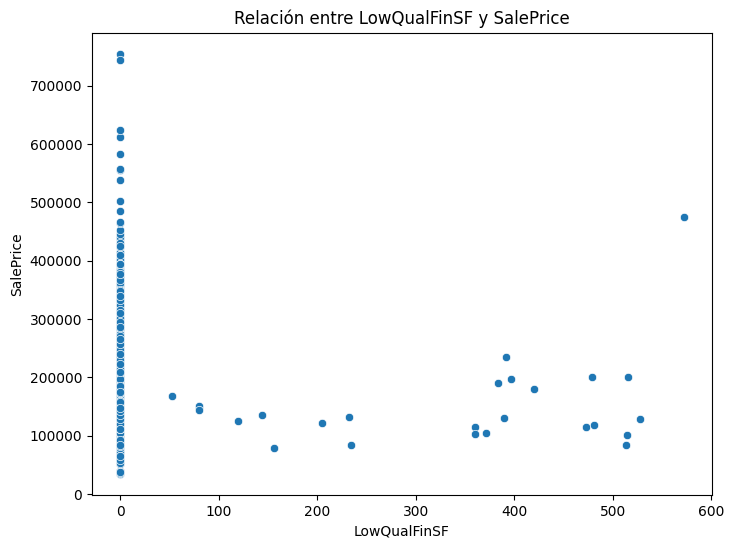

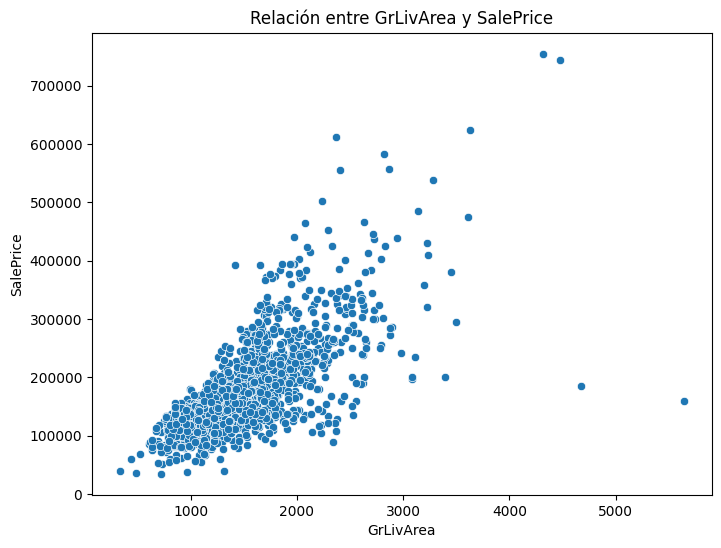

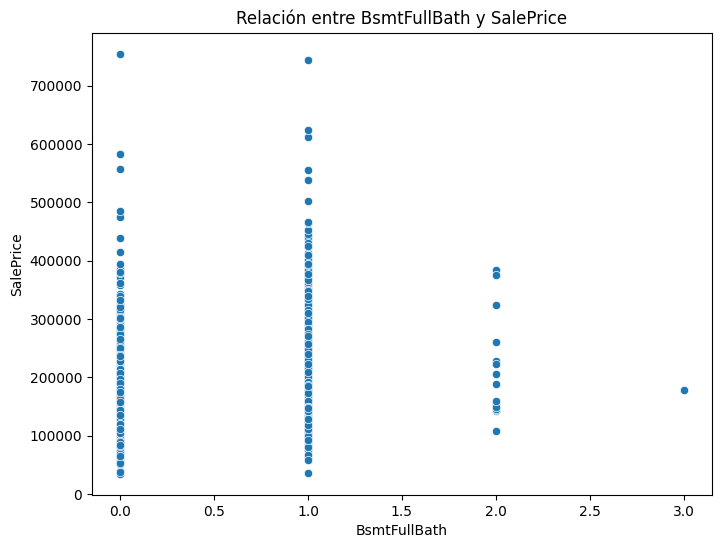

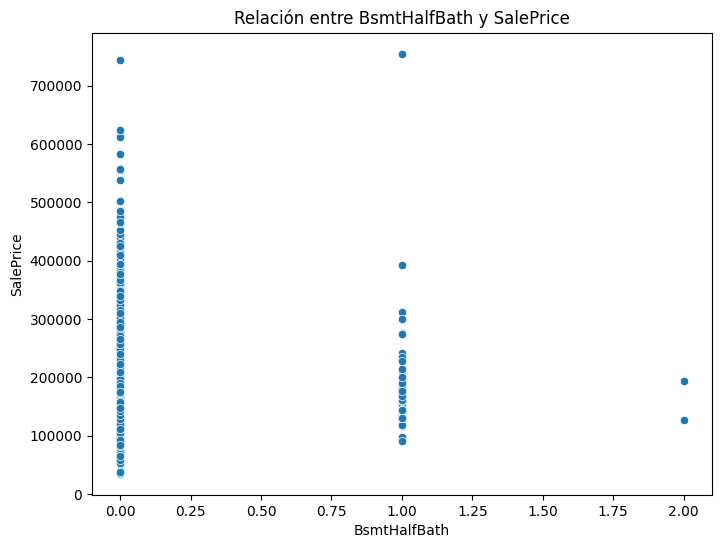

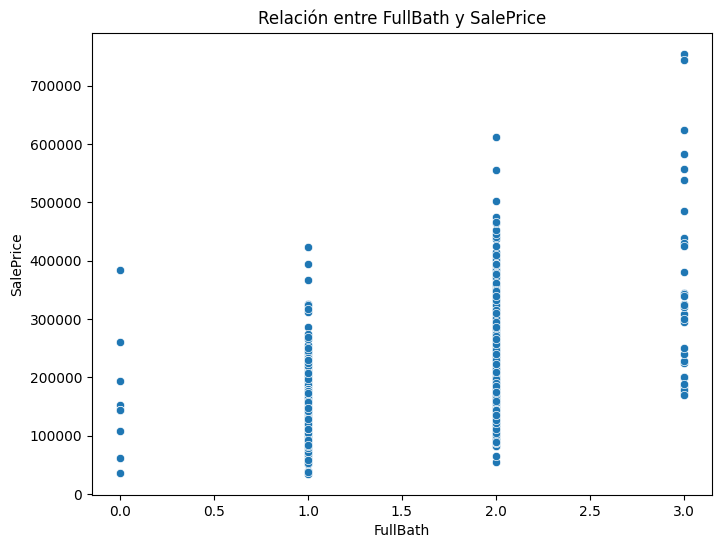

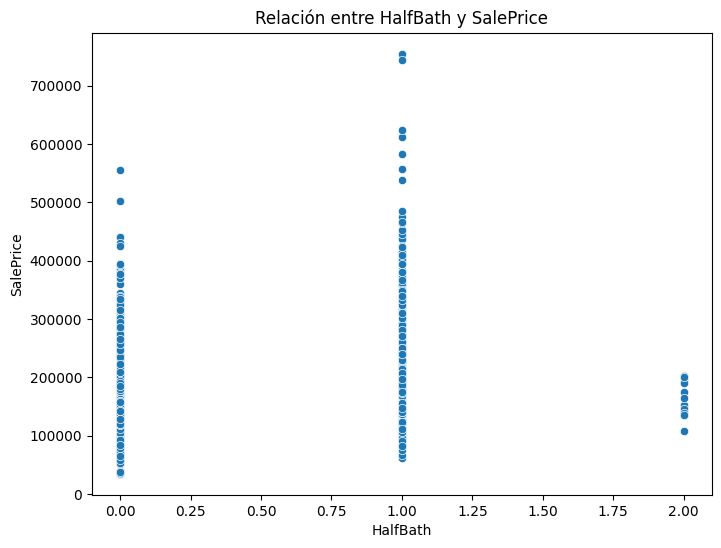

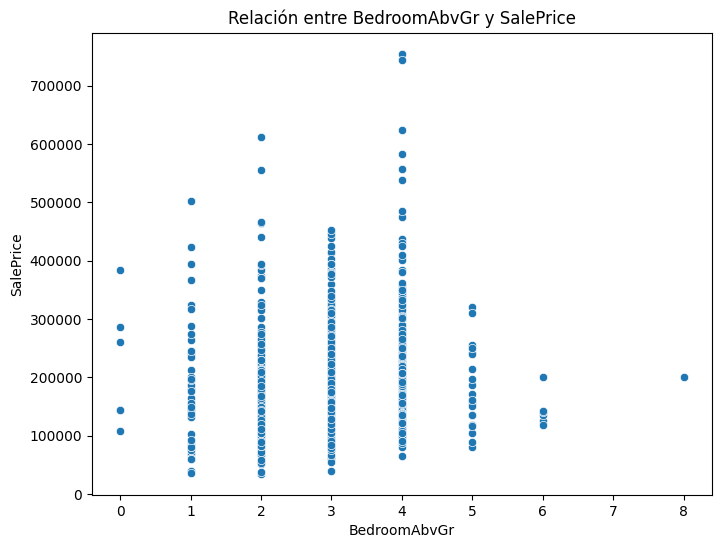

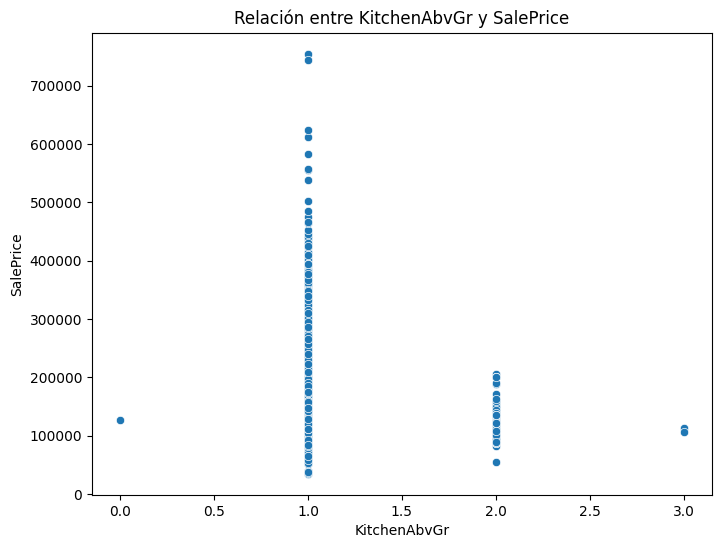

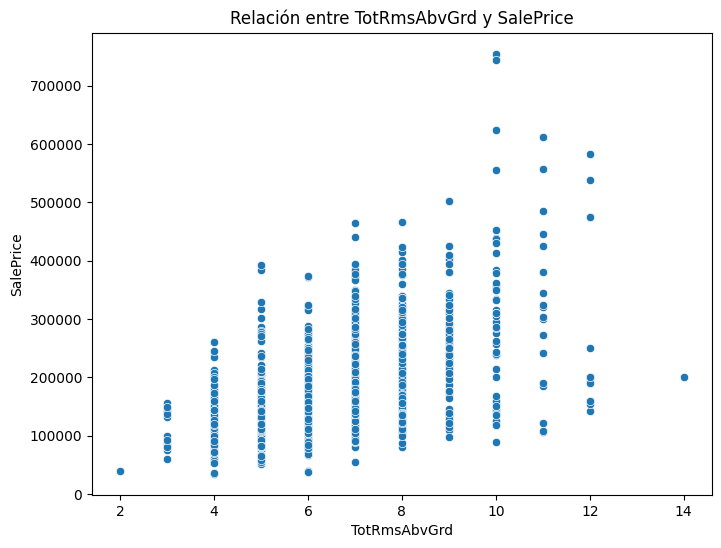

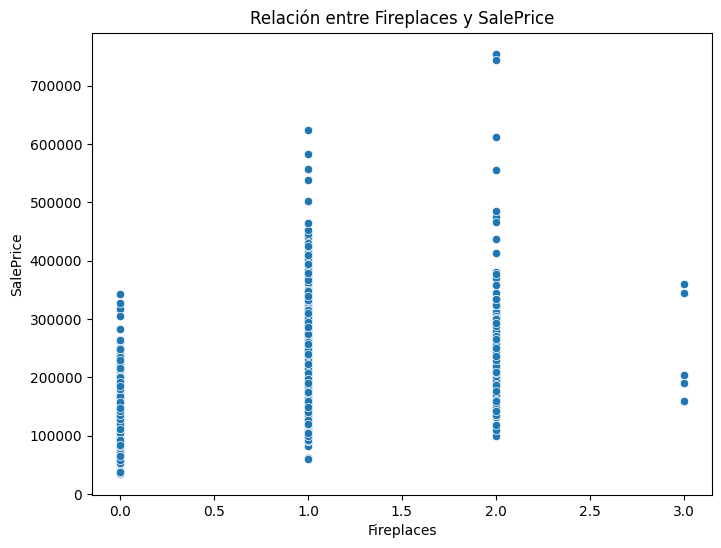

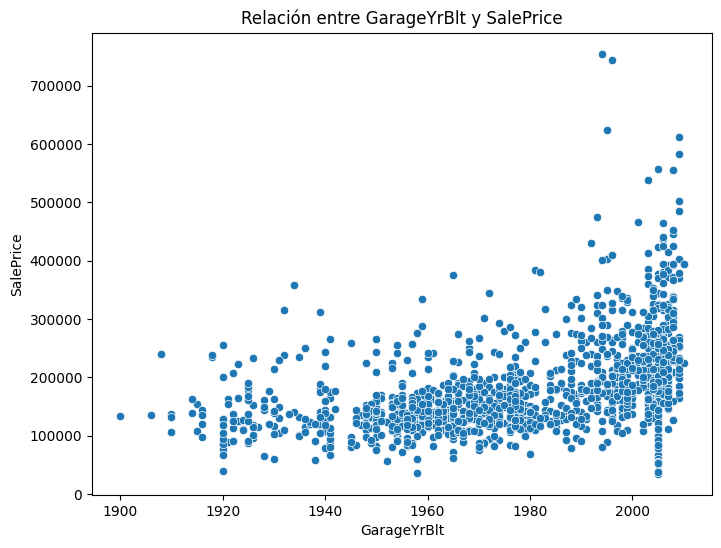

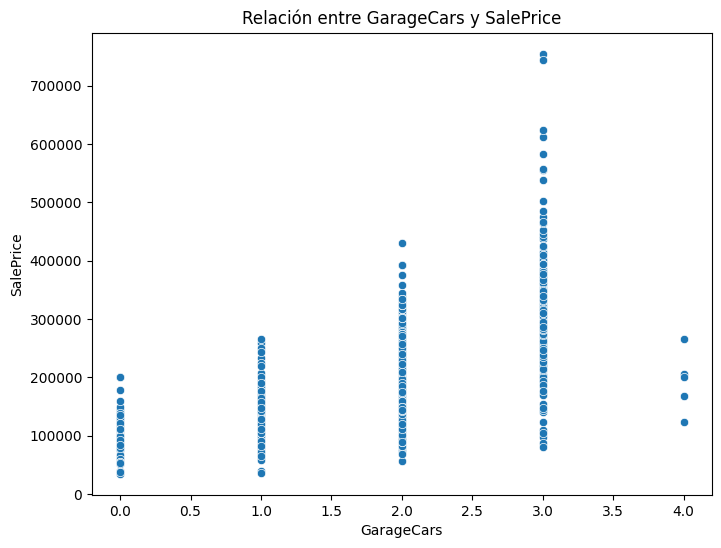

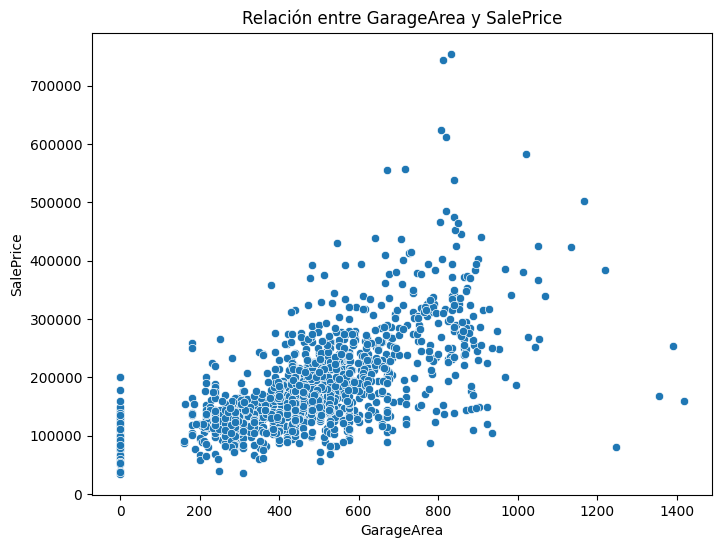

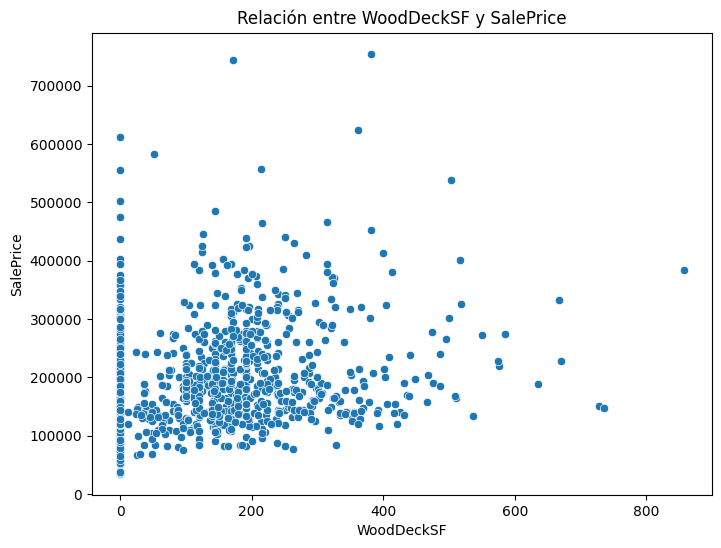

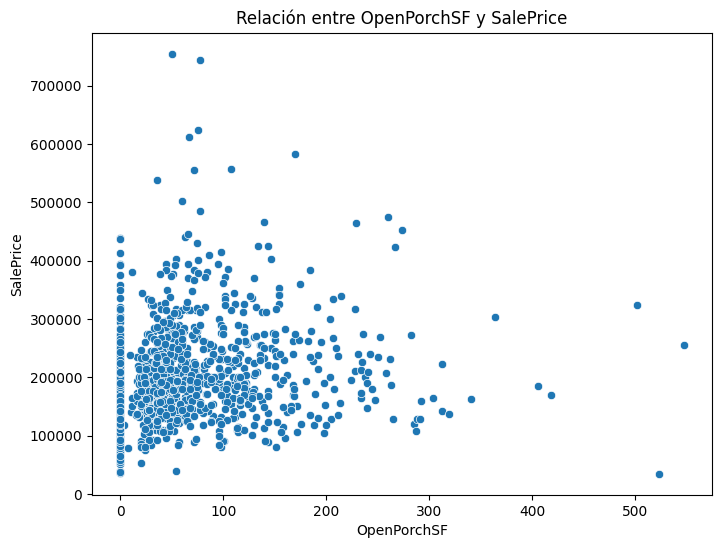

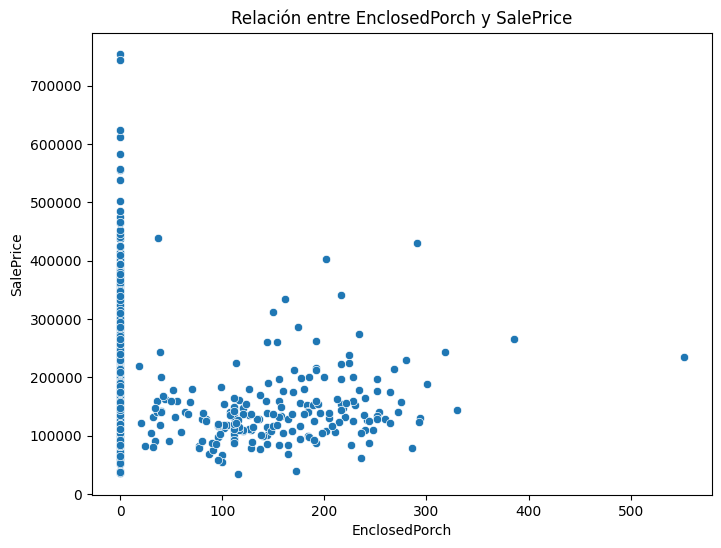

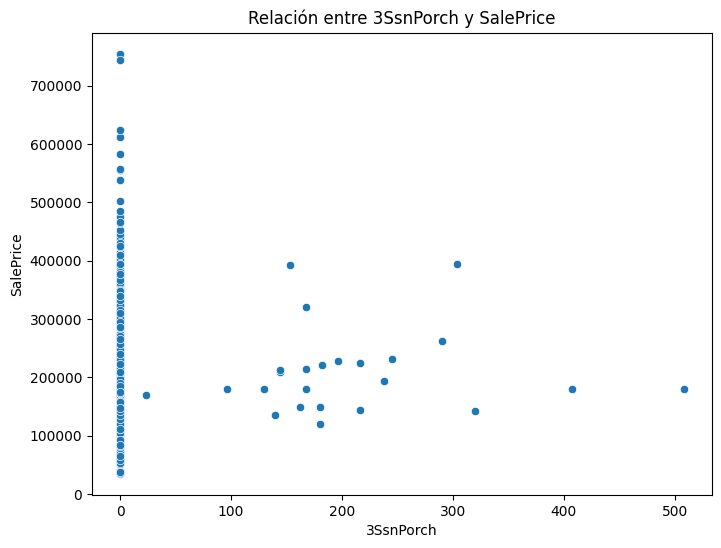

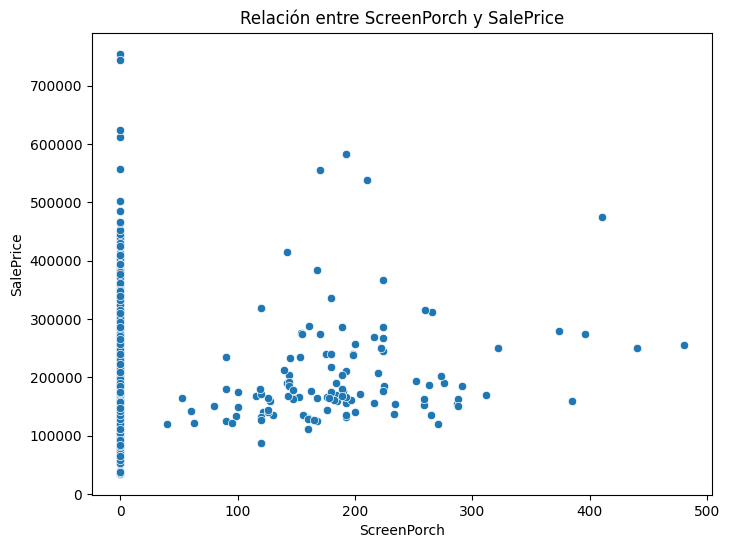

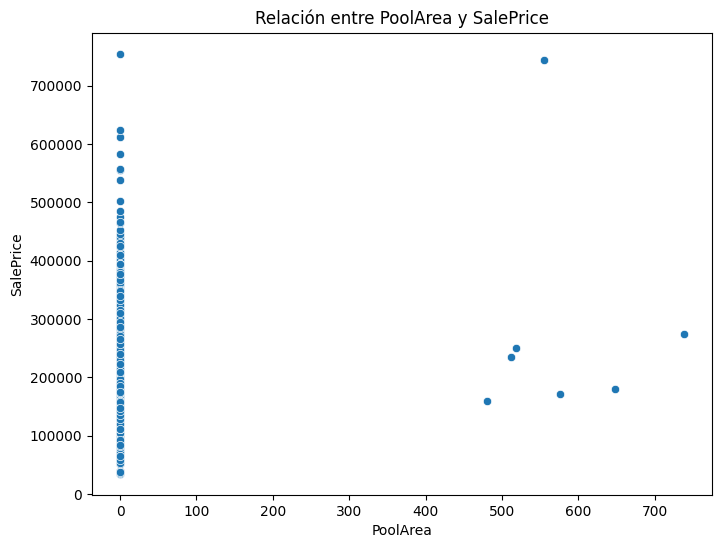

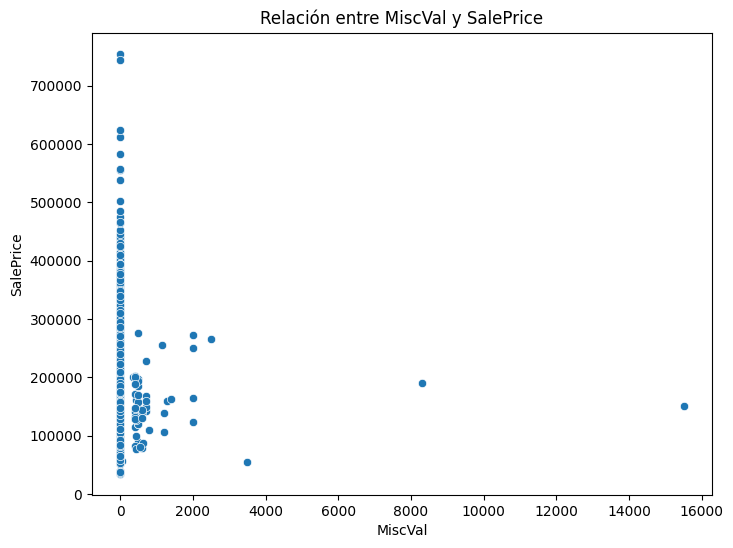

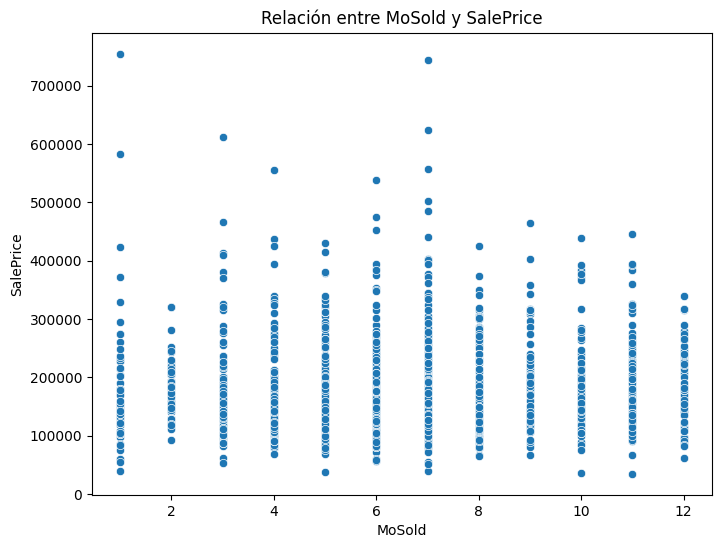

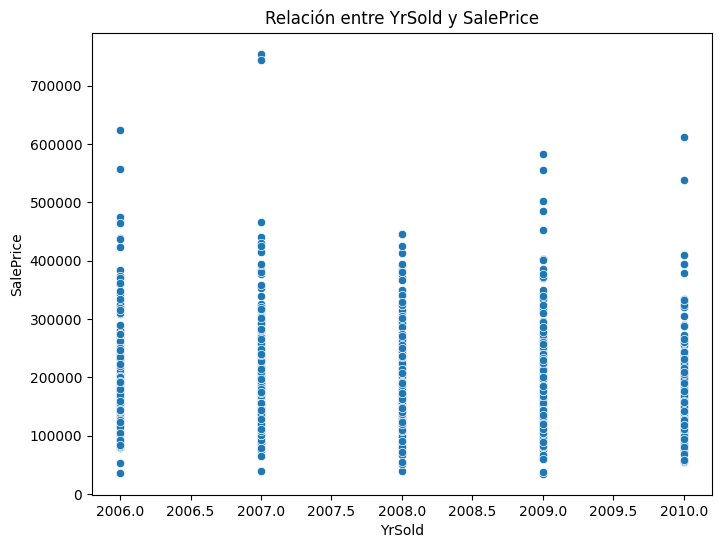

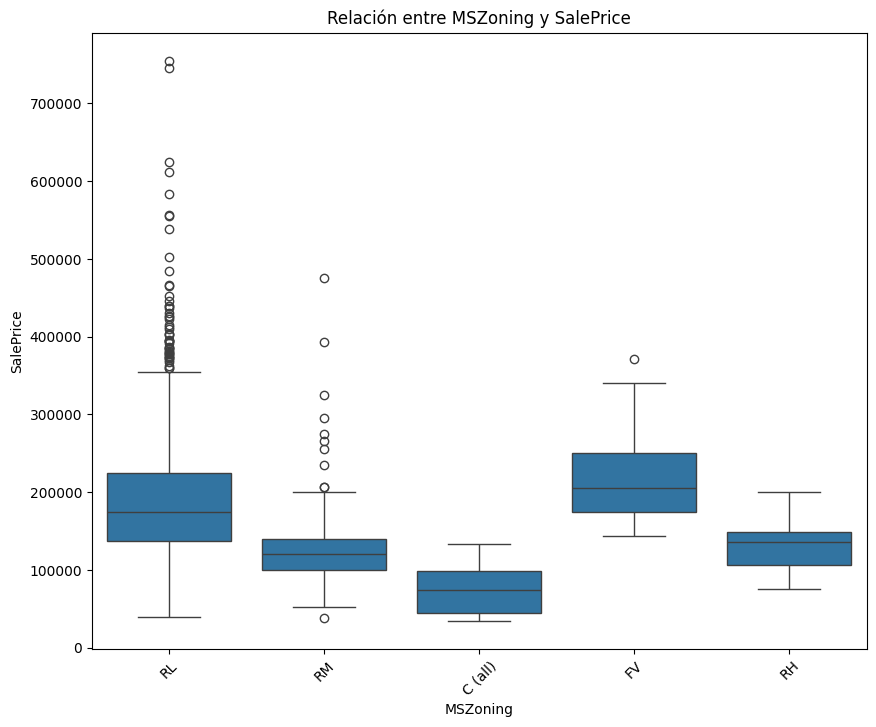

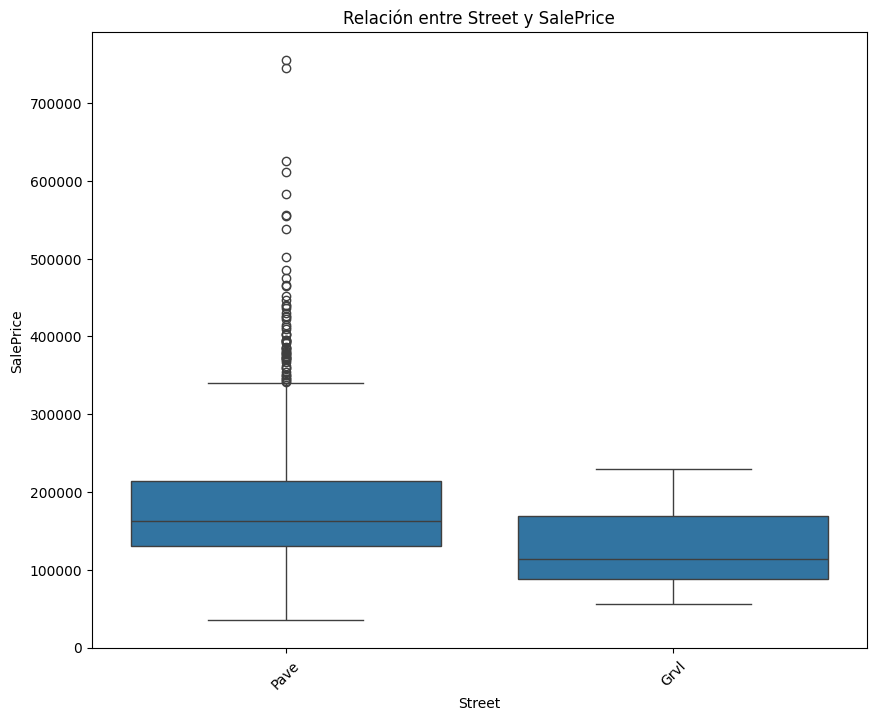

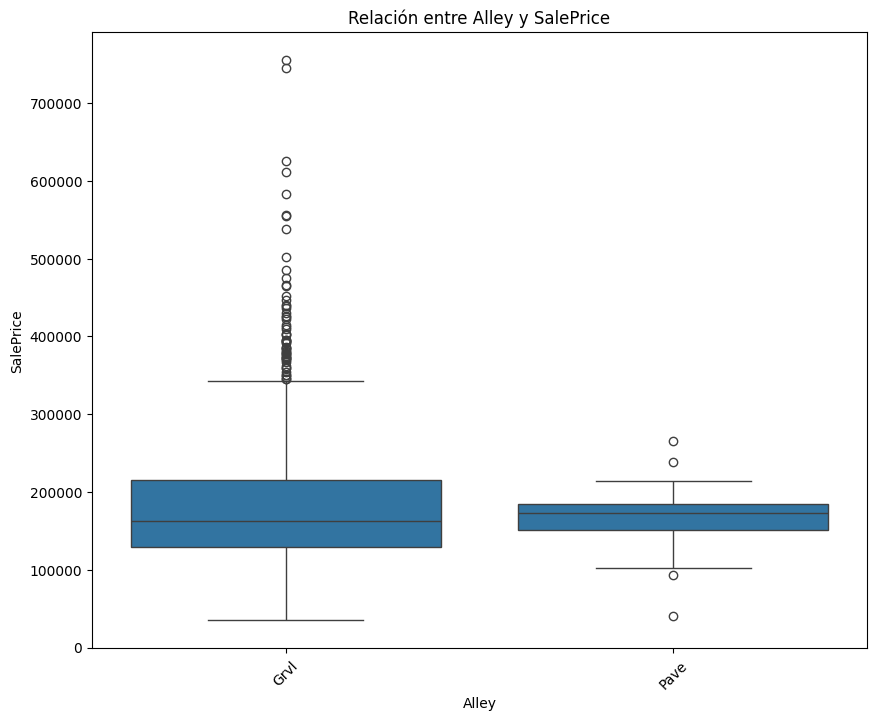

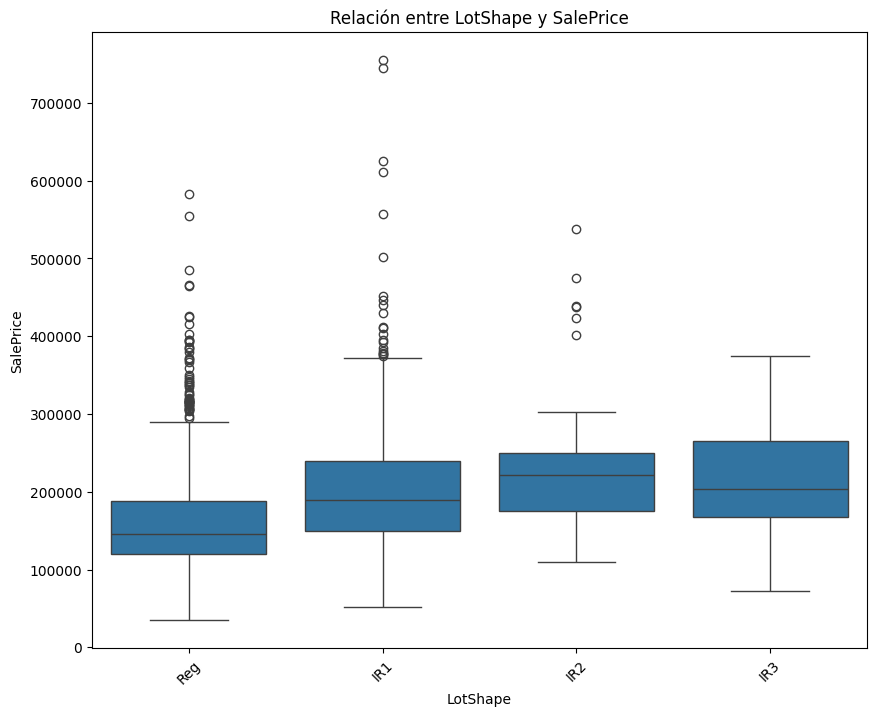

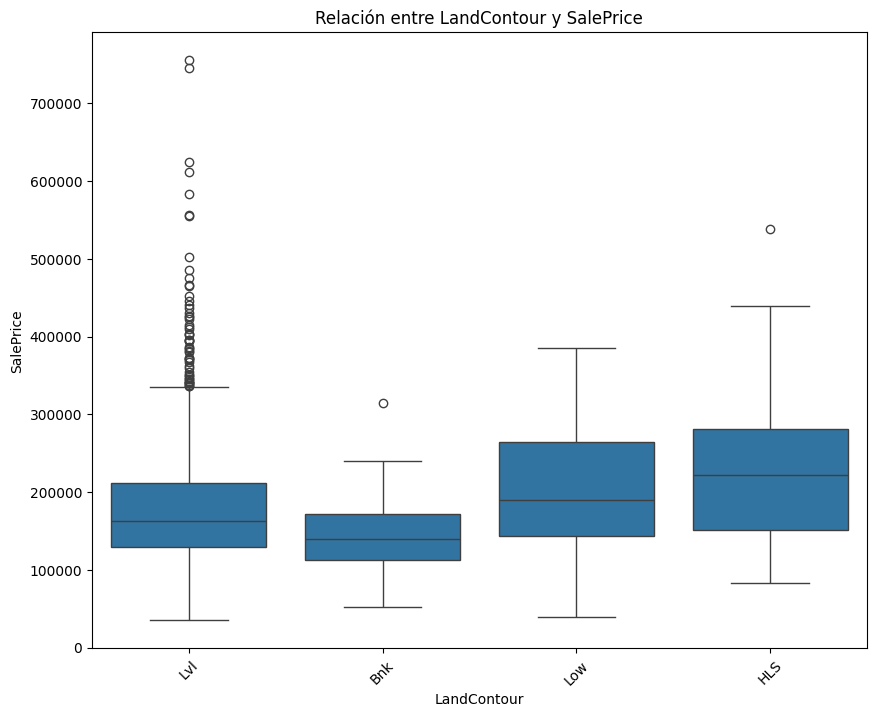

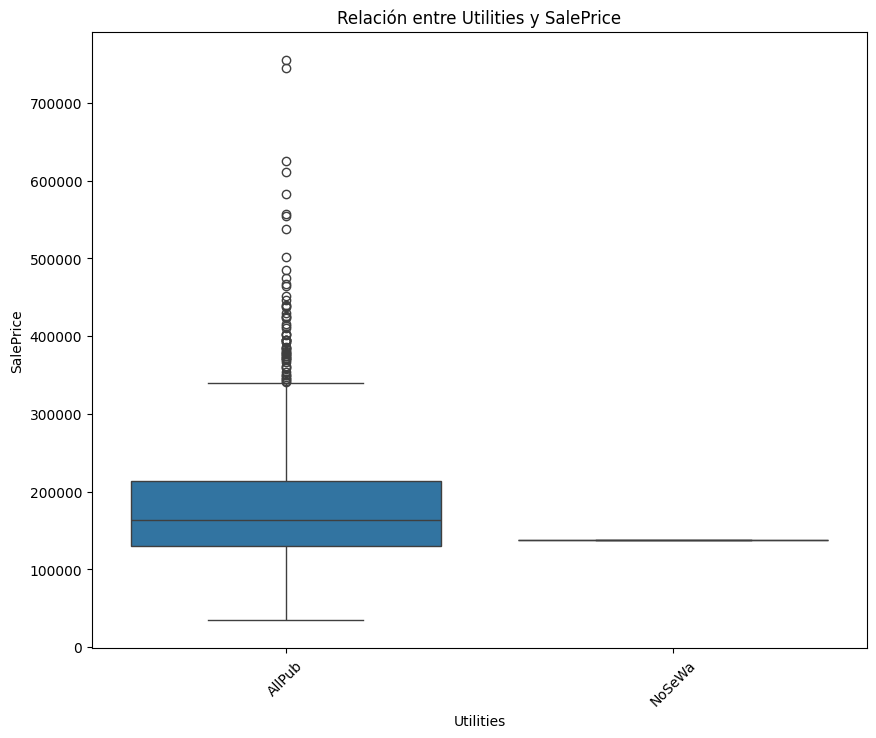

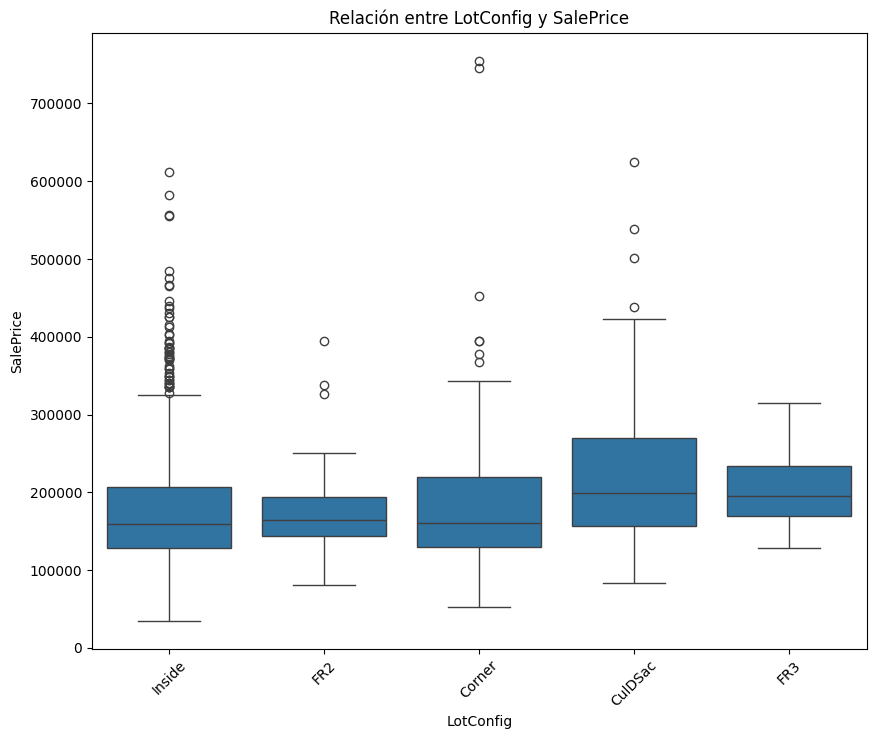

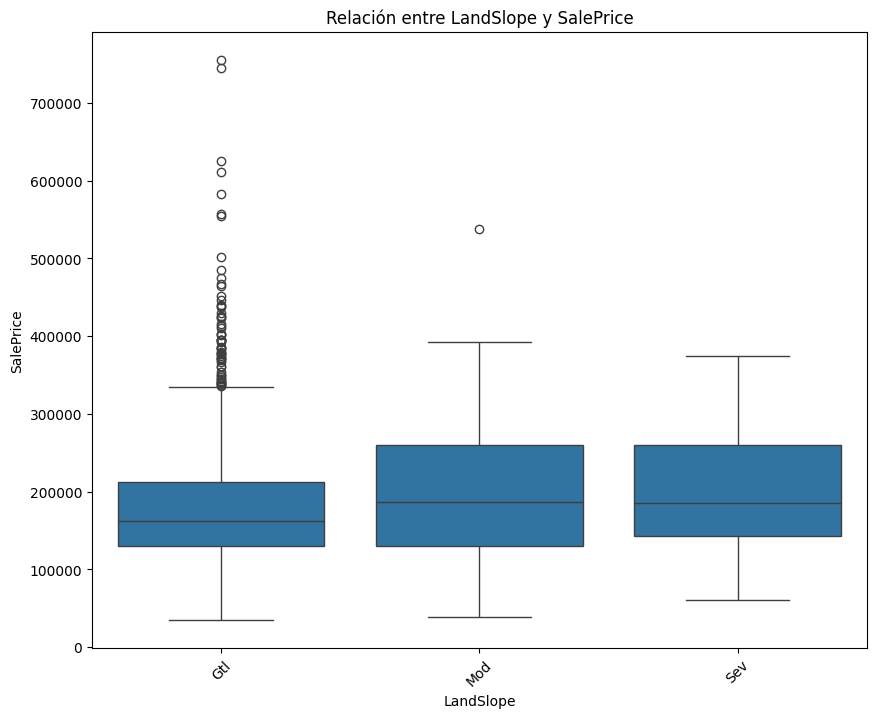

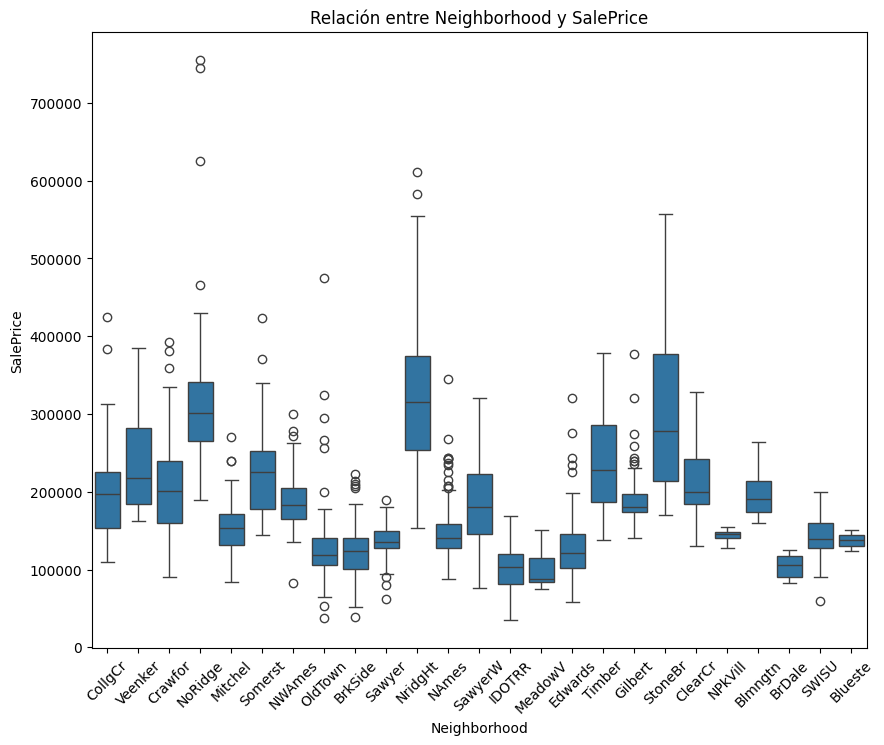

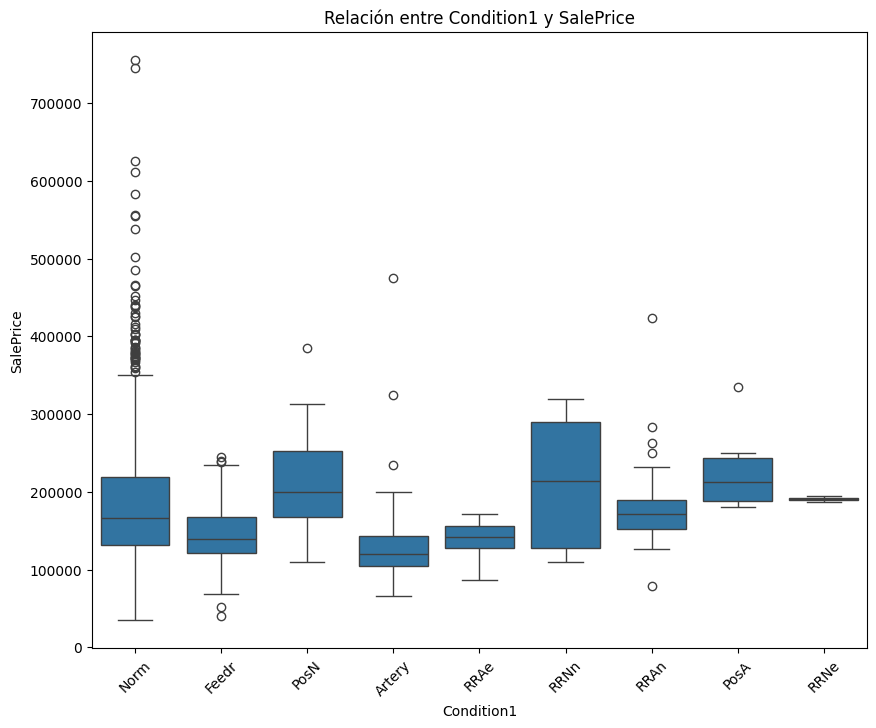

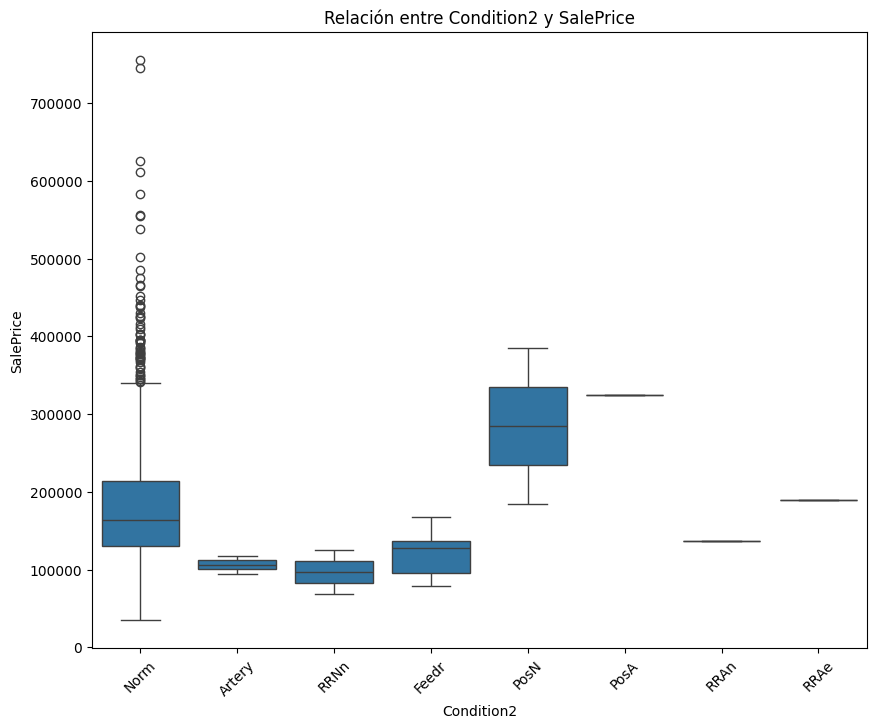

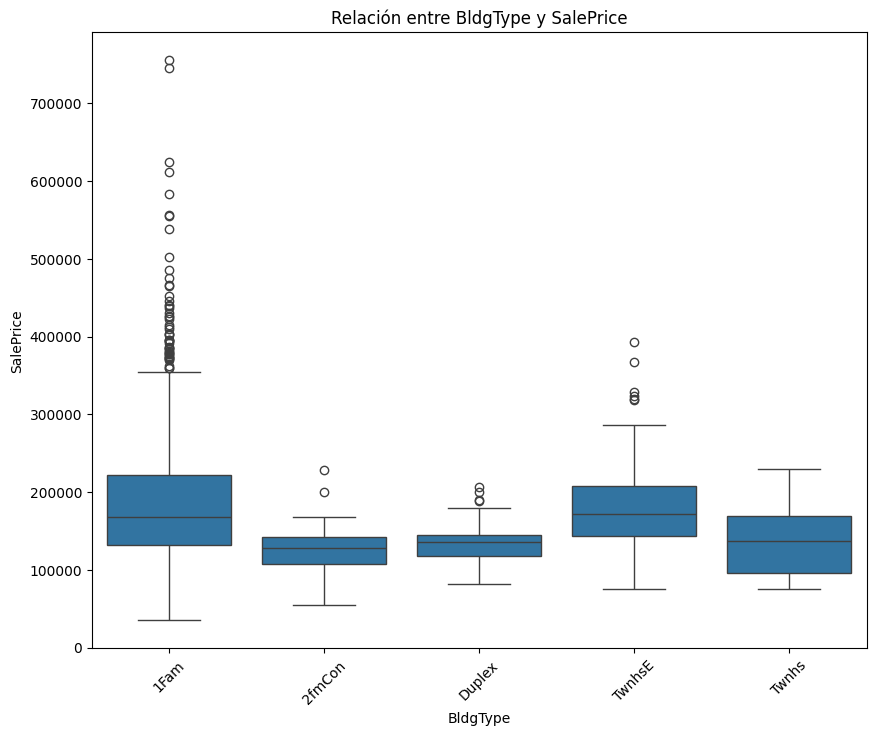

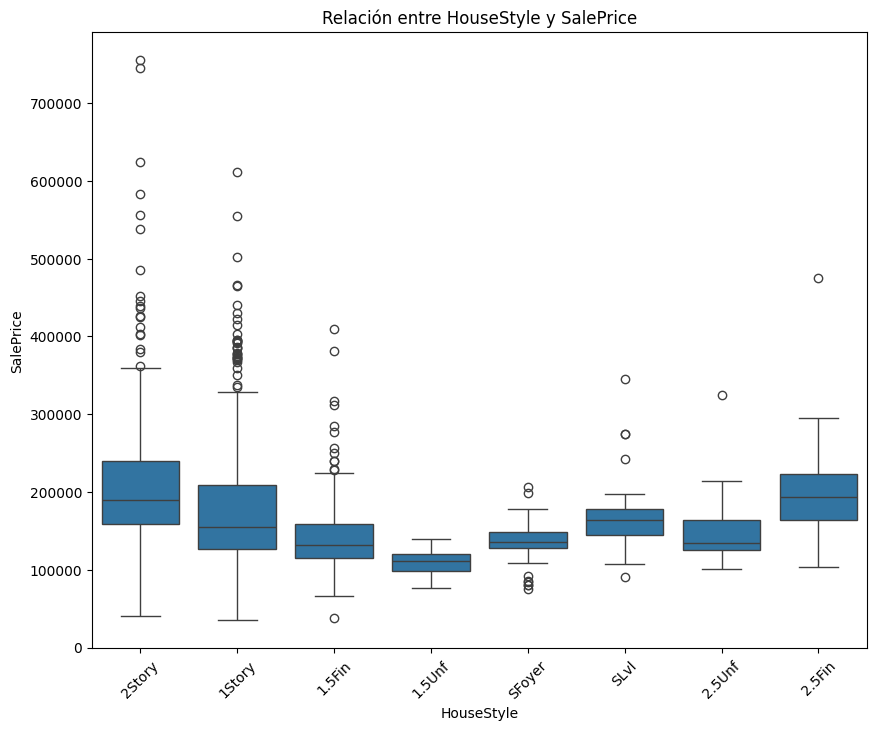

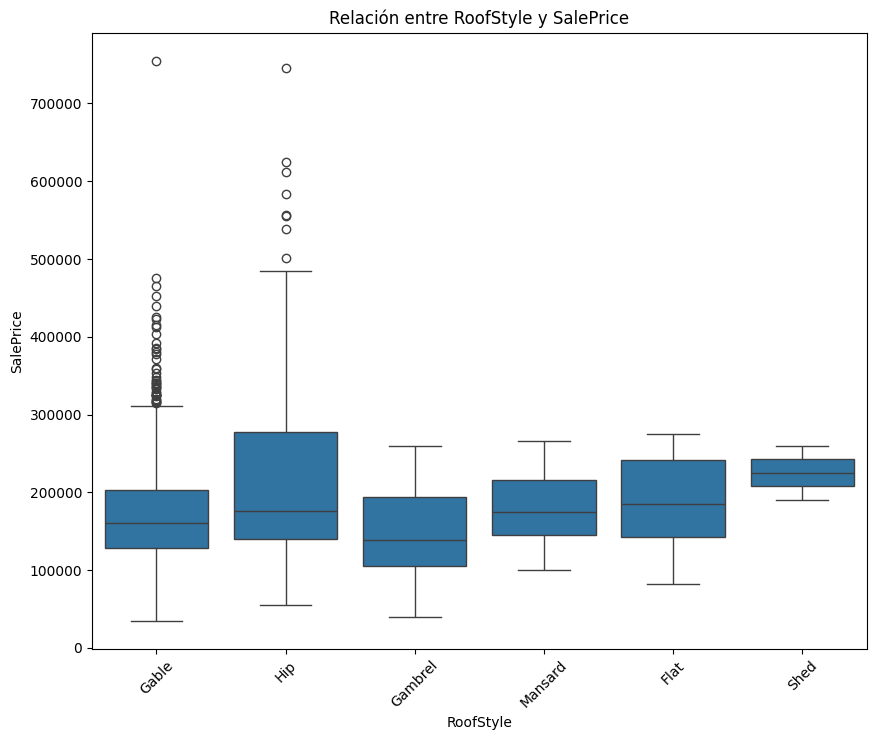

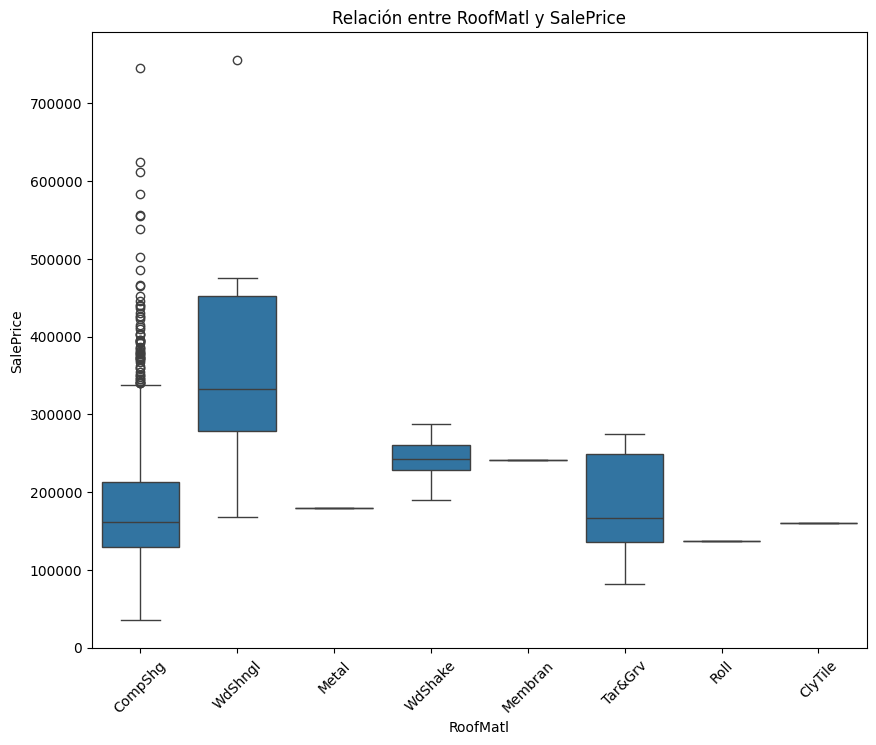

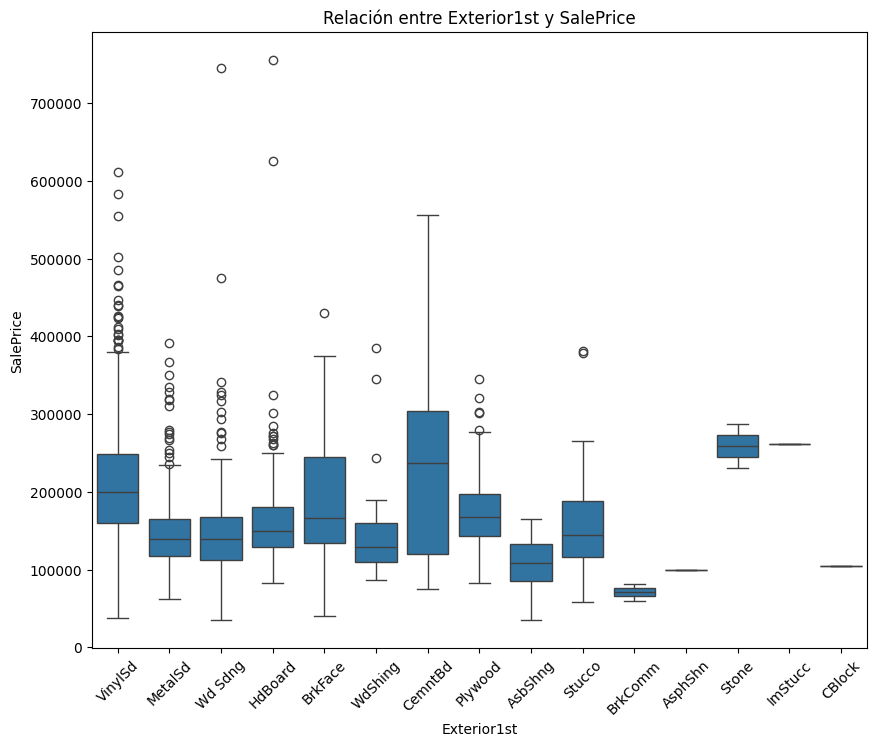

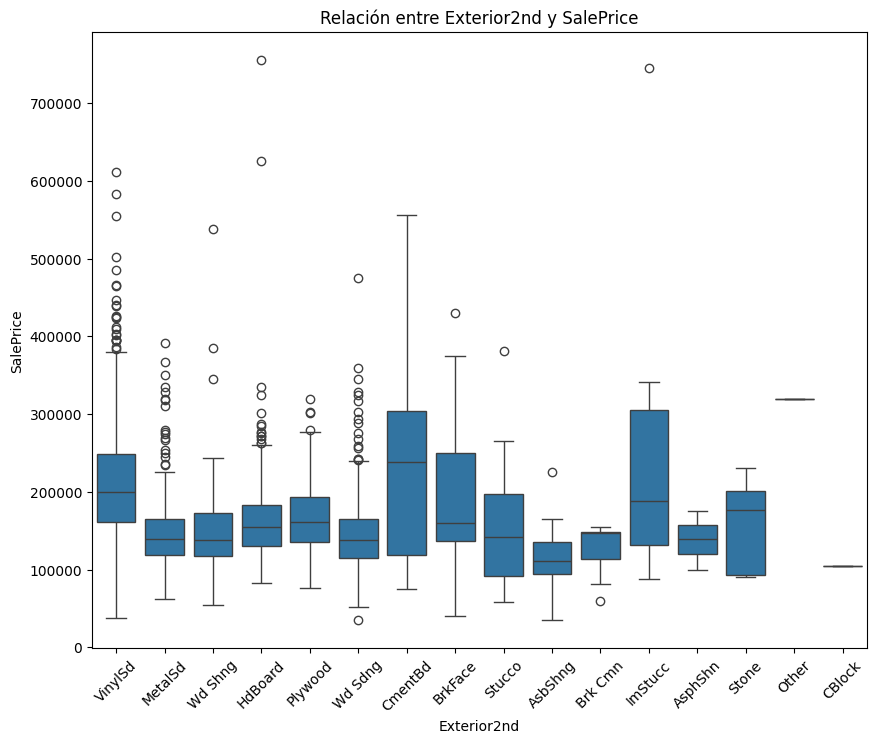

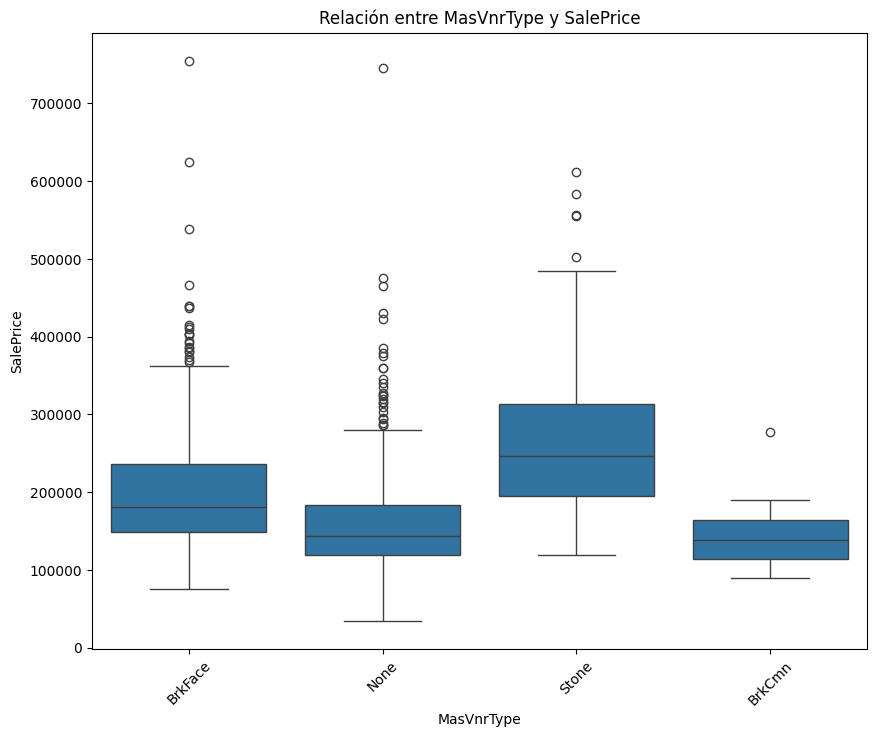

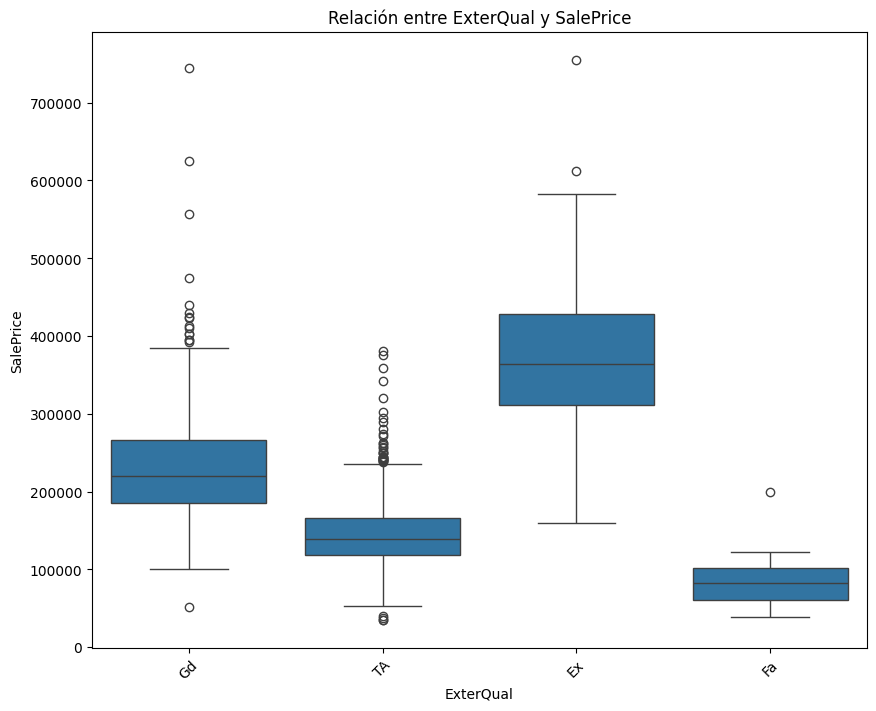

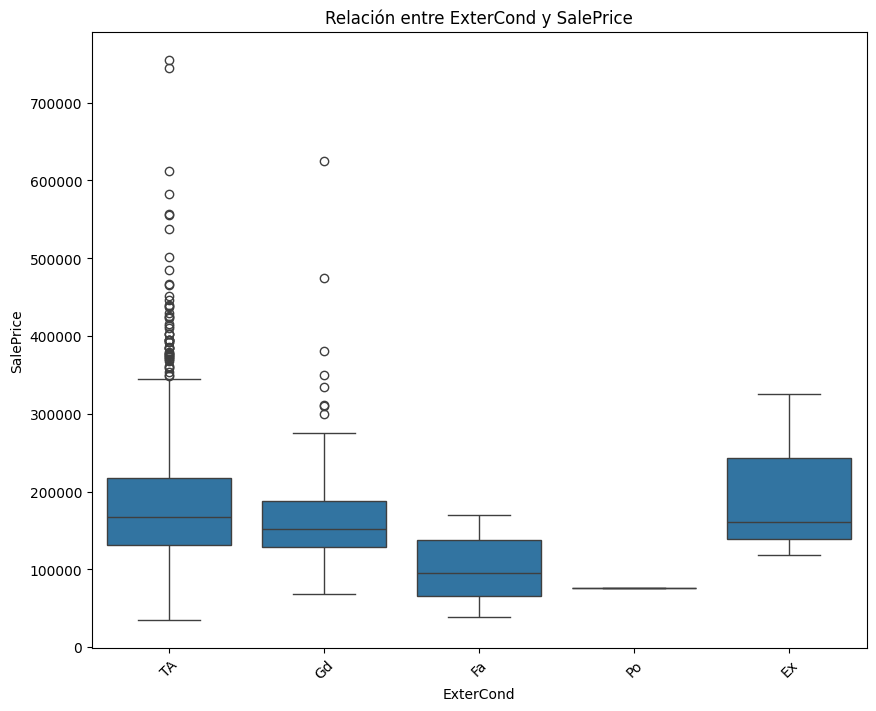

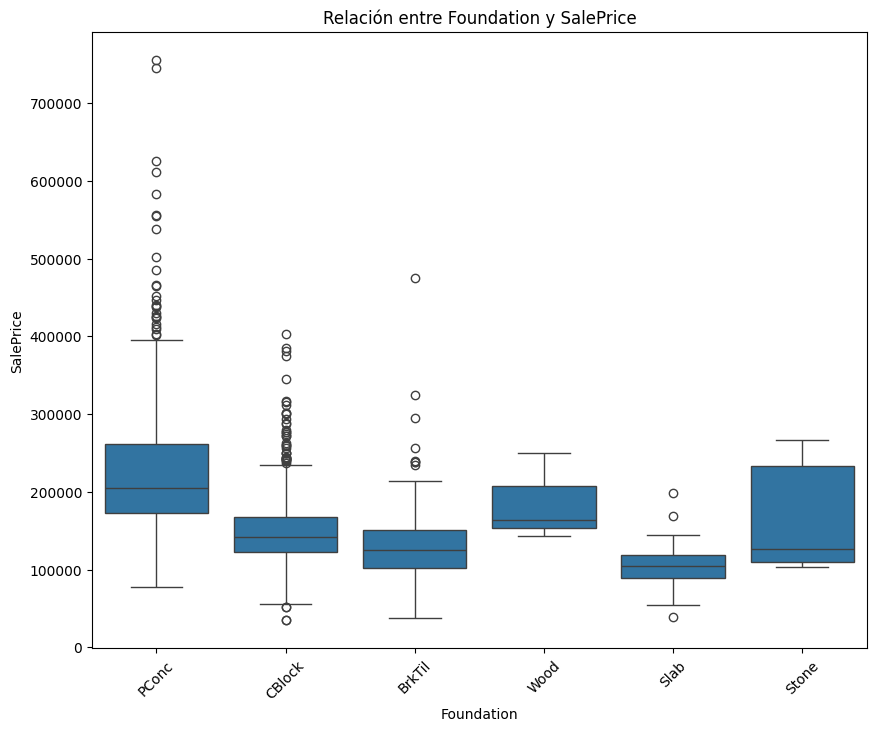

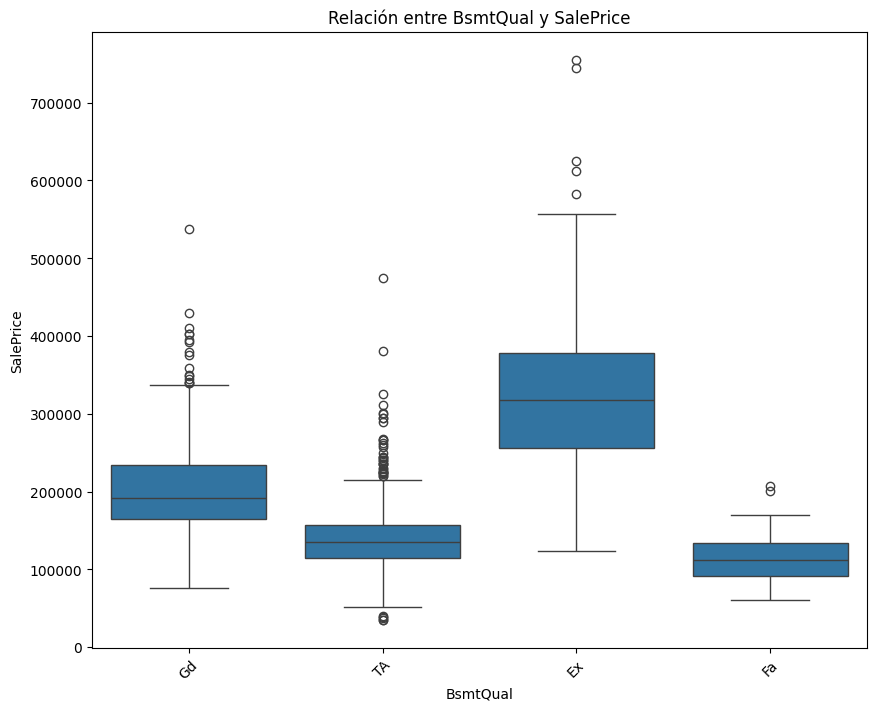

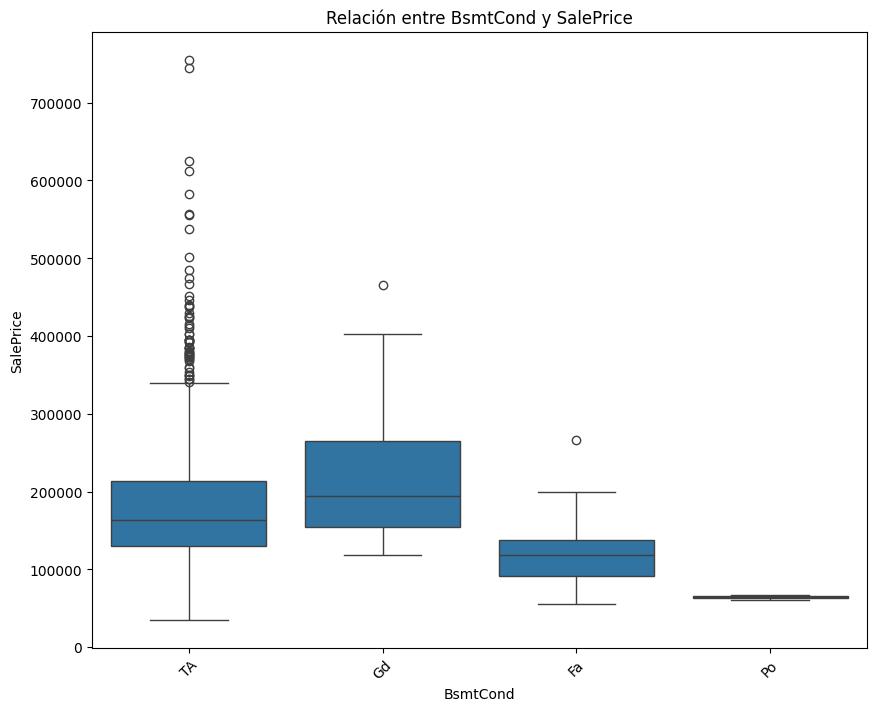

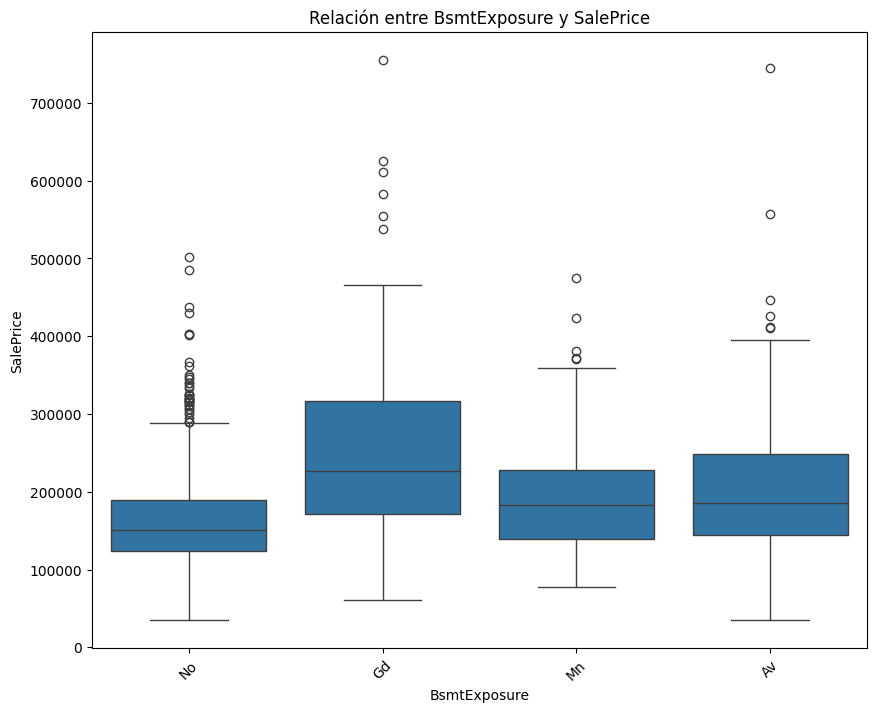

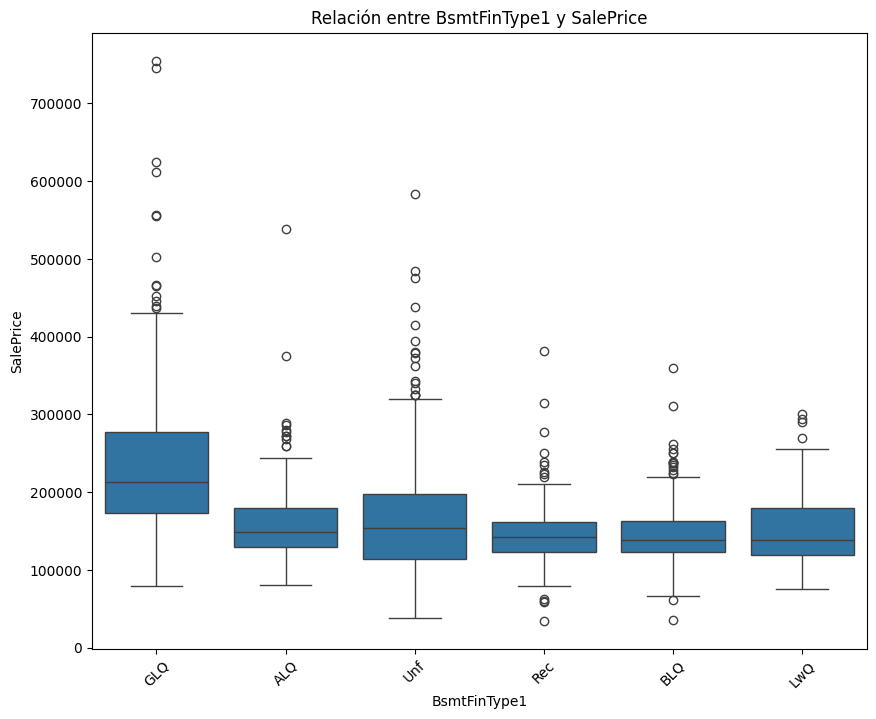

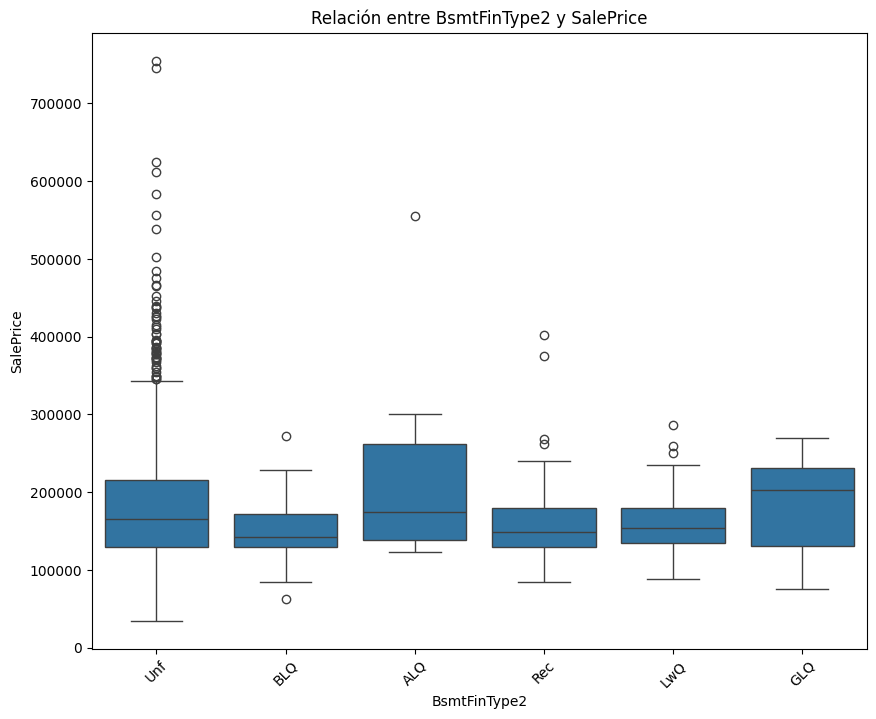

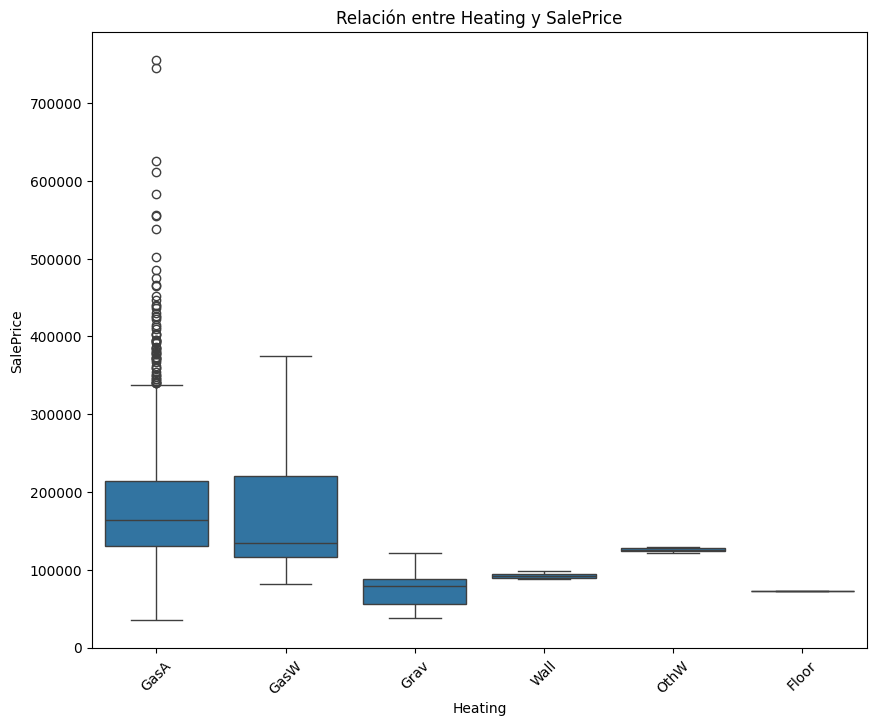

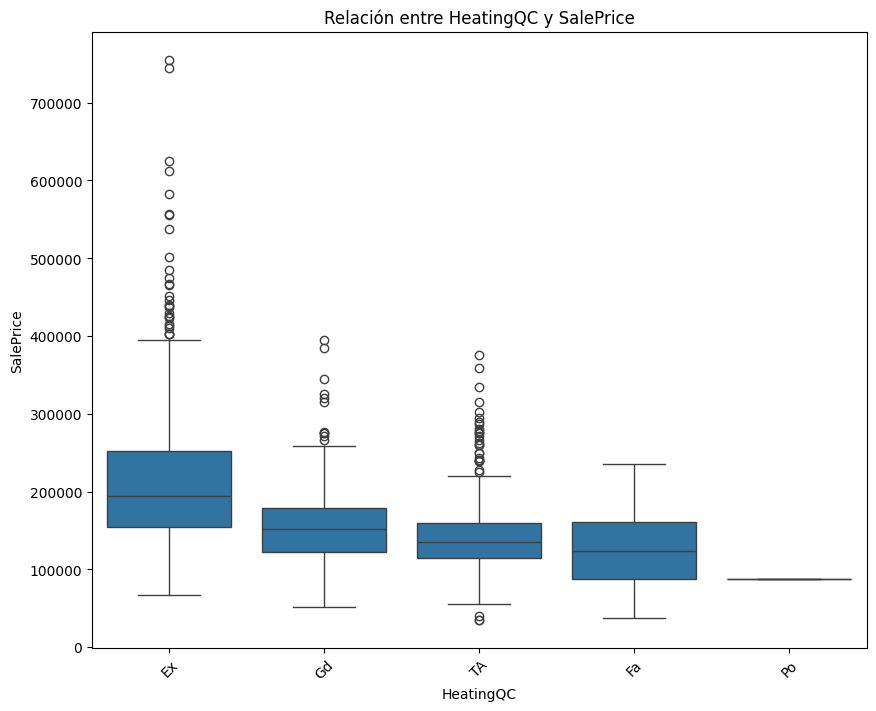

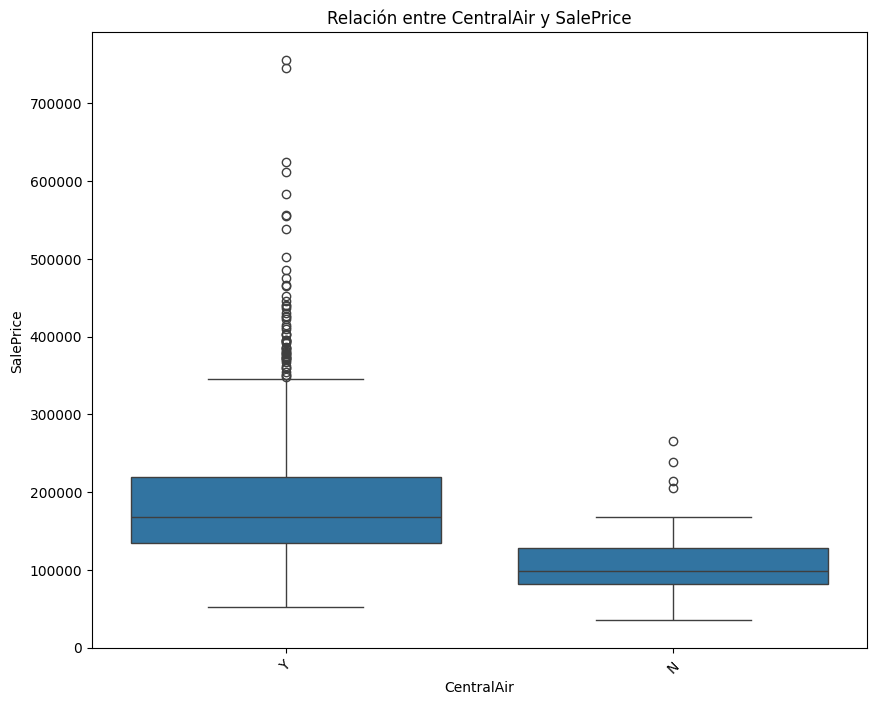

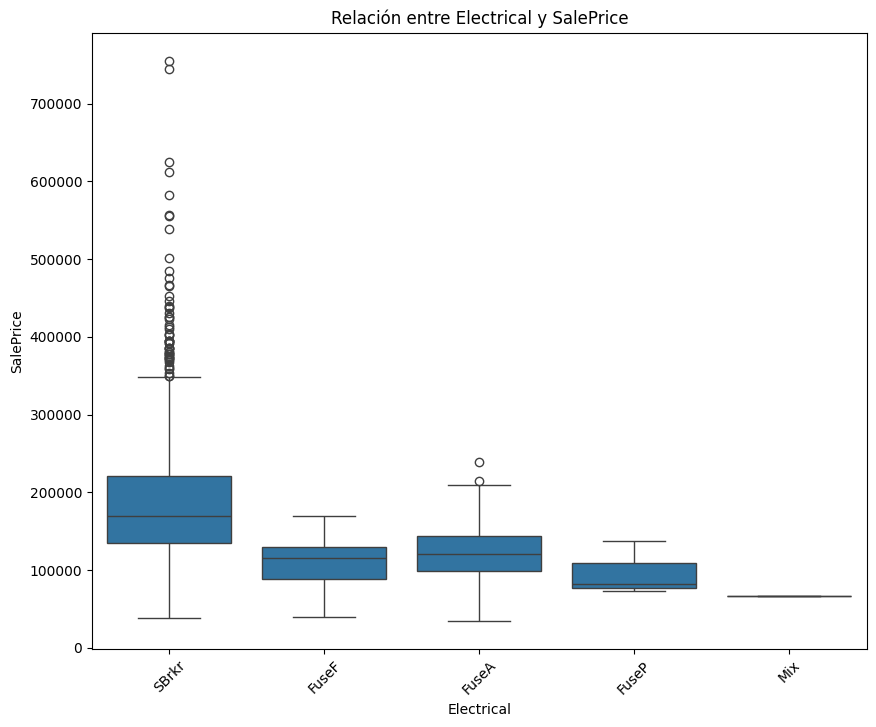

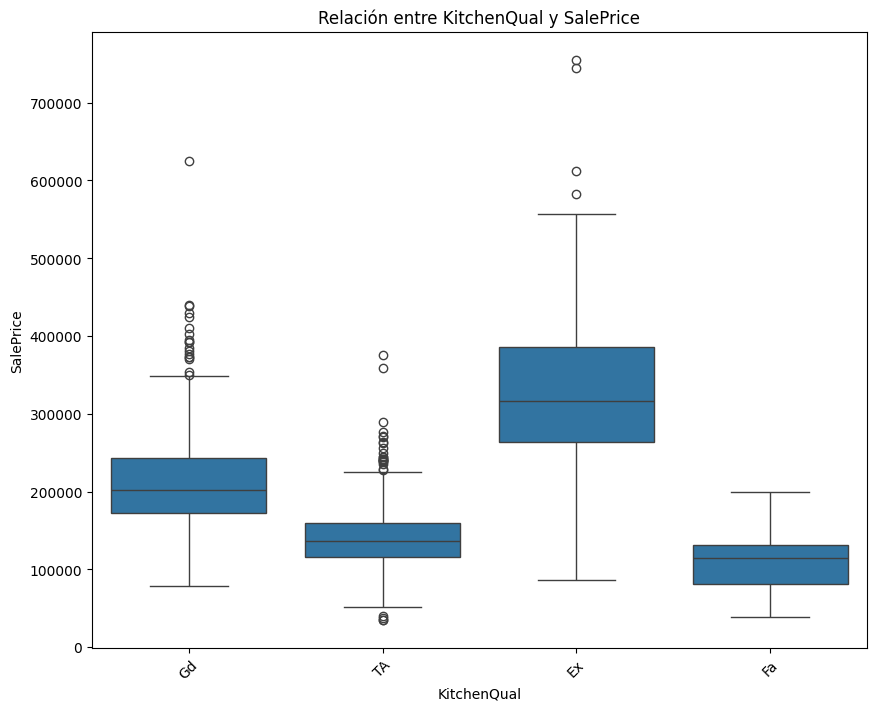

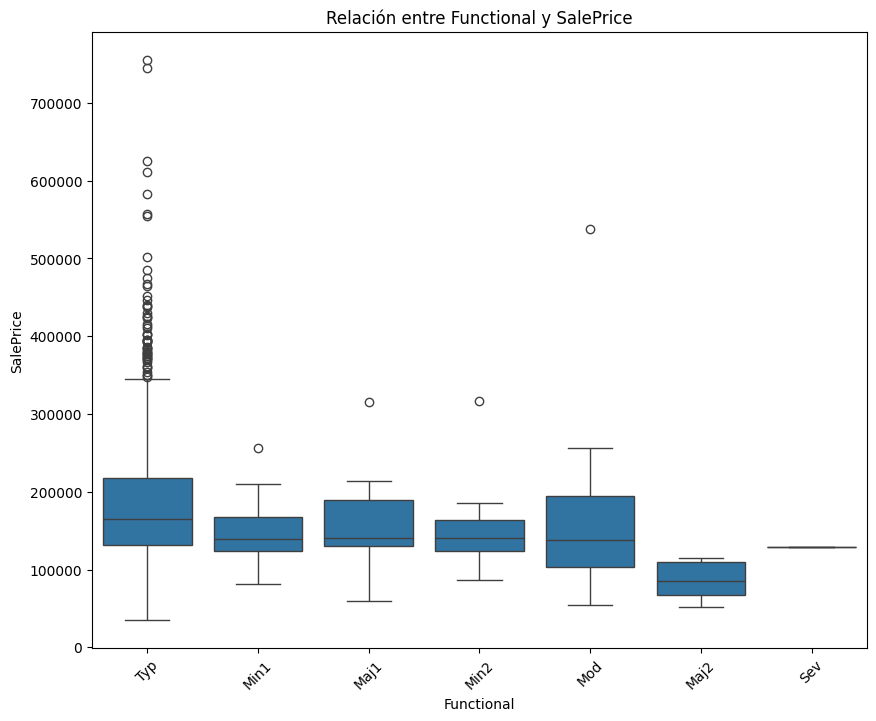

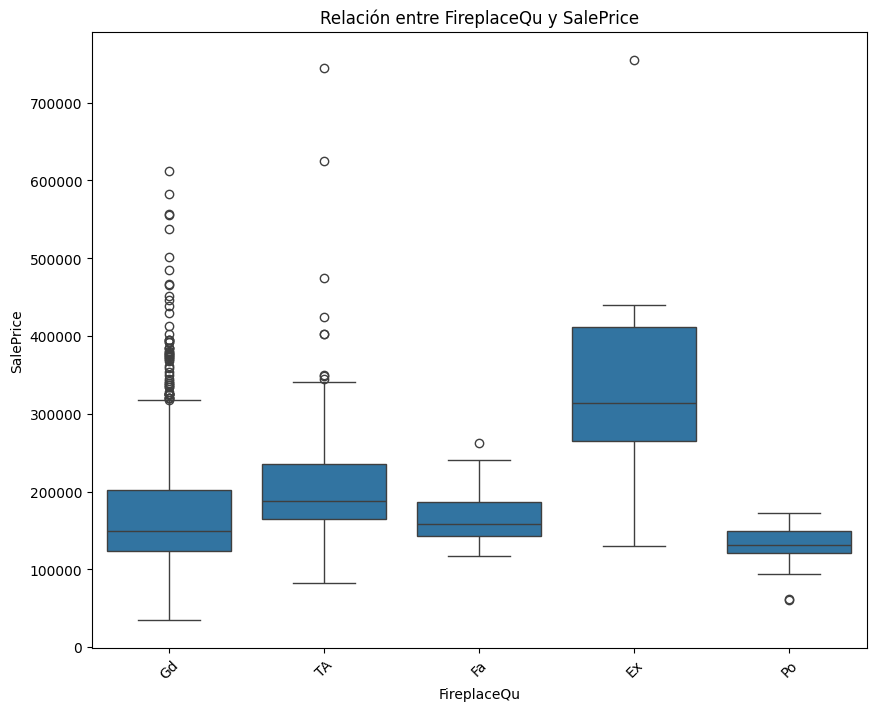

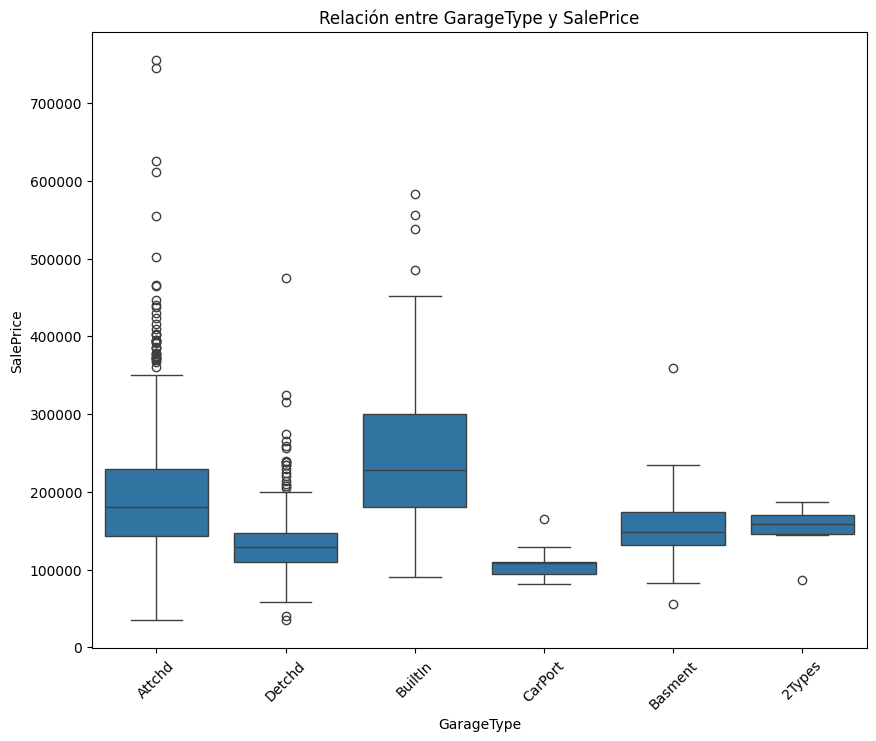

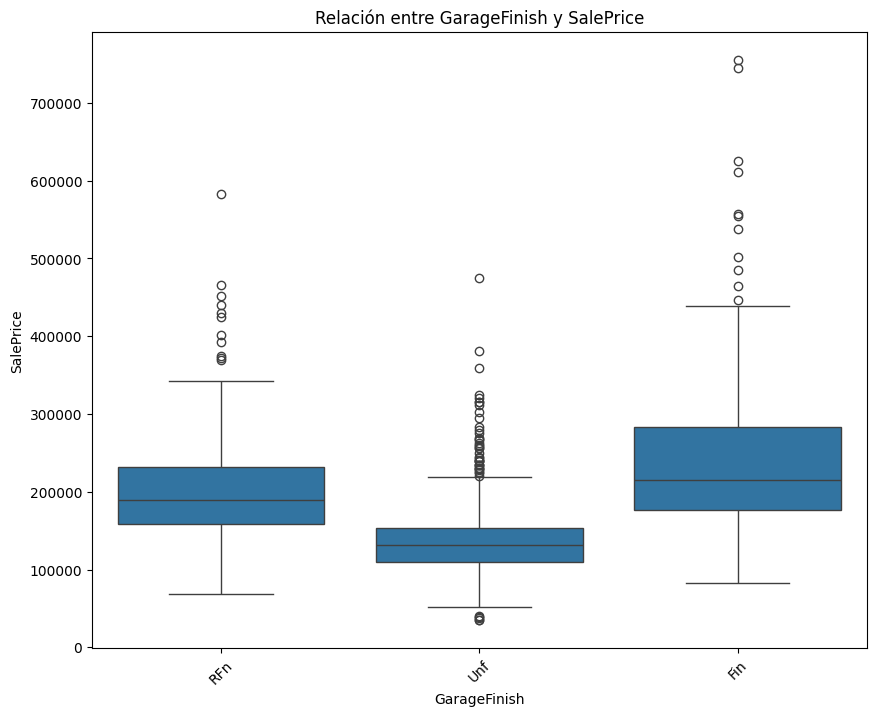

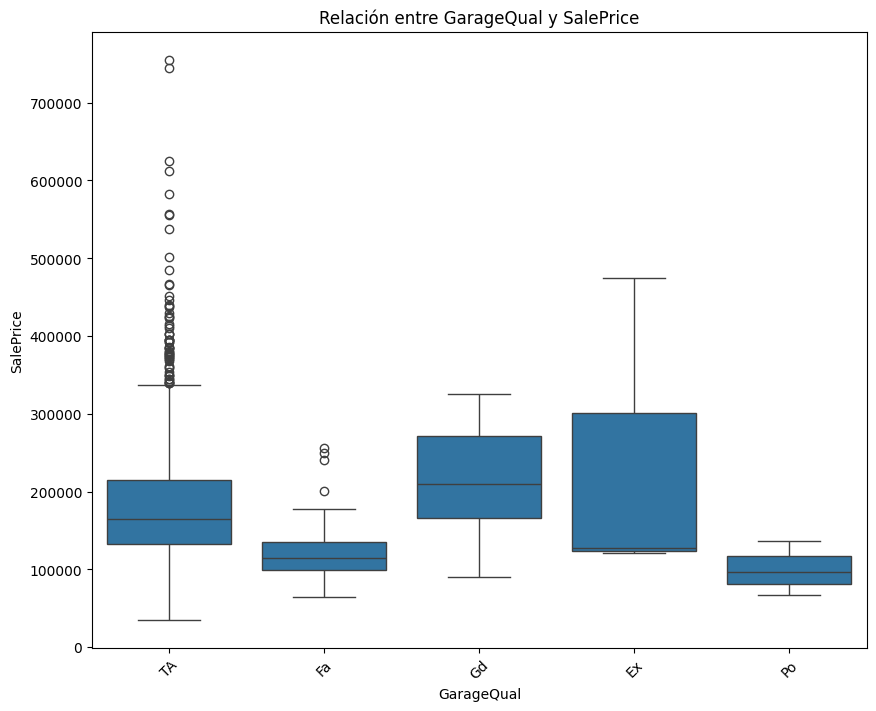

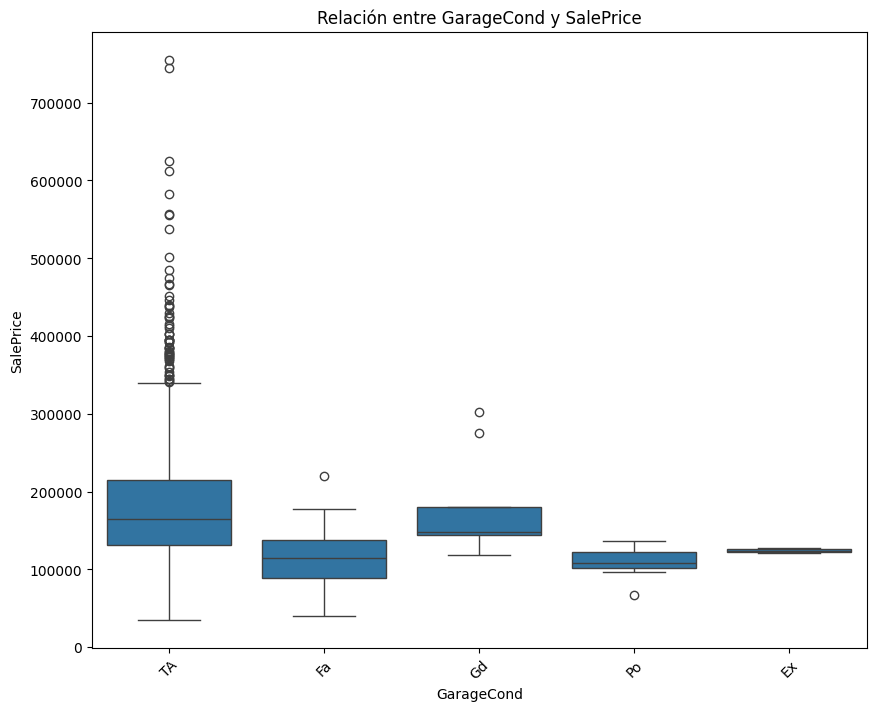

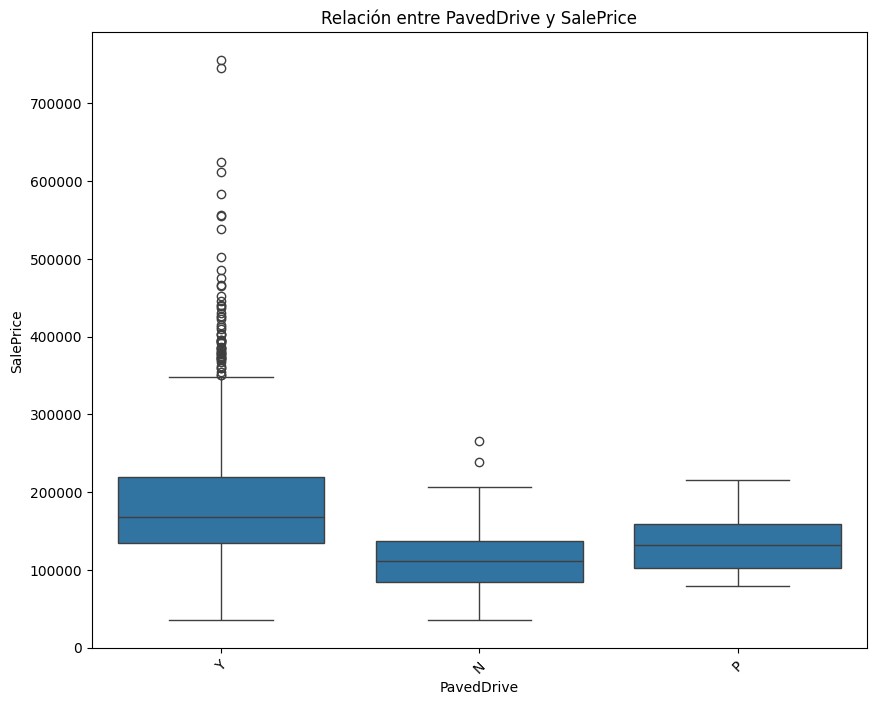

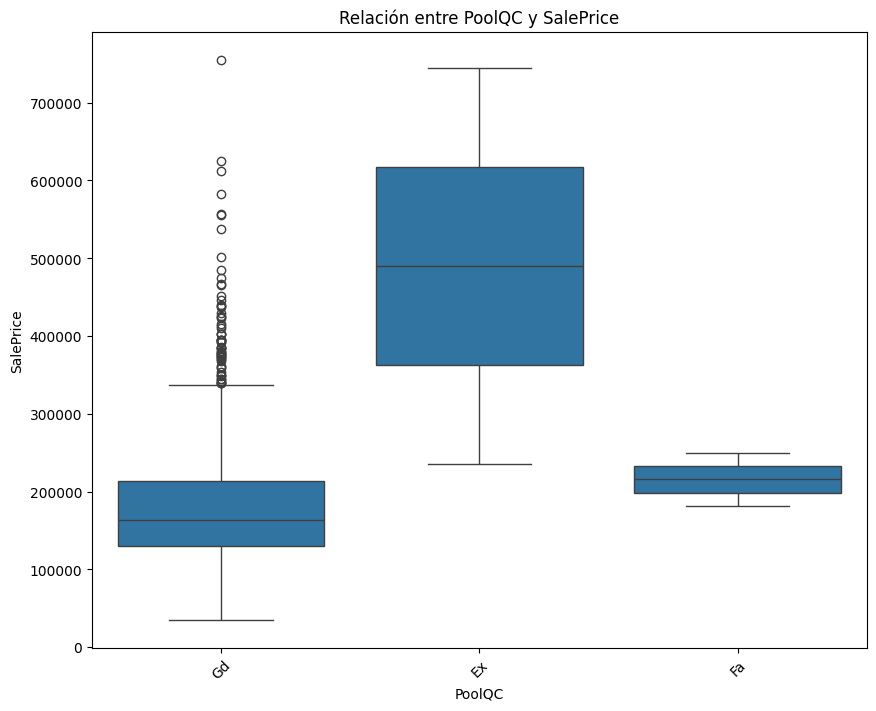

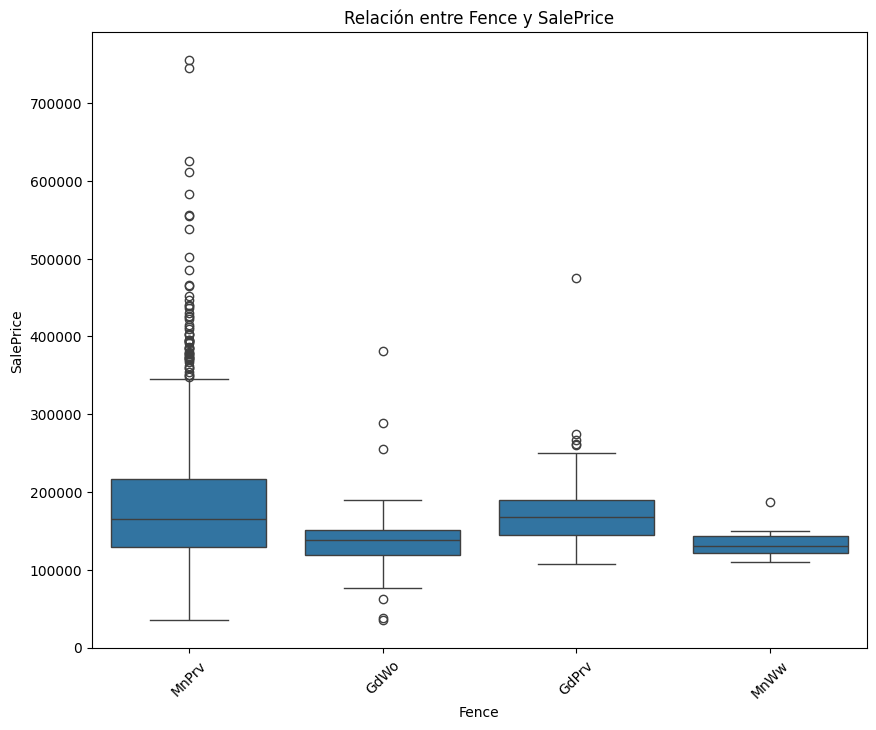

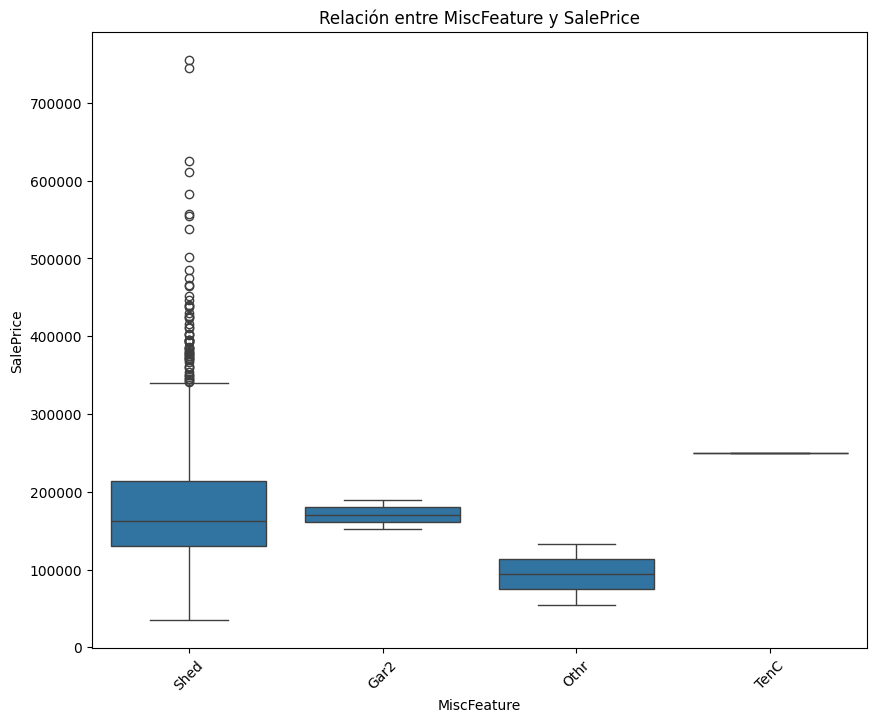

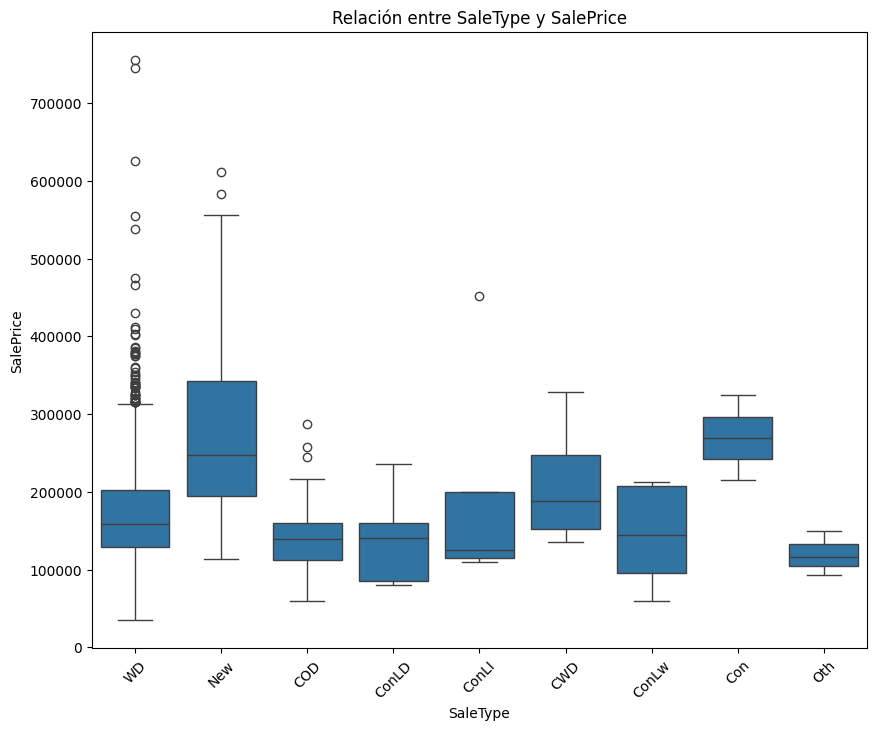

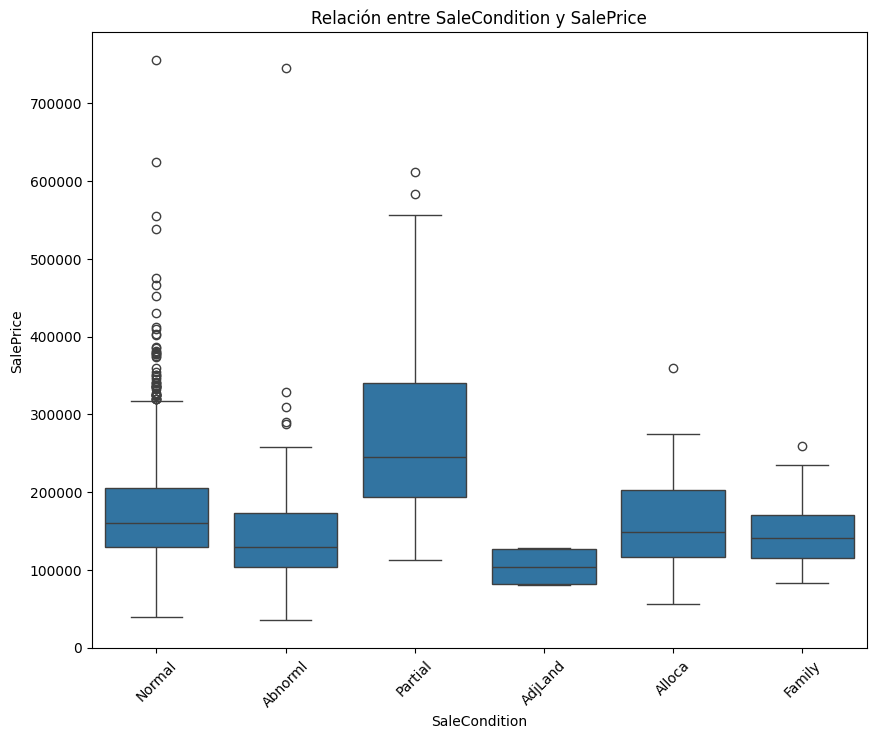

In [9]:
# Visualizar relaciones entre variables numéricas y el precio de venta (si está presente)
if 'SalePrice' in df2.columns:
    for col in numeric_cols:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df2, x=col, y='SalePrice')
        plt.title(f'Relación entre {col} y SalePrice')
        plt.xlabel(col)
        plt.ylabel('SalePrice')
        plt.show()

# Visualizar relaciones entre variables categóricas y el precio de venta (si está presente)
if 'SalePrice' in df2.columns:
    for col in categorical_cols:
        plt.figure(figsize=(10, 8))
        sns.boxplot(data=df2, x=col, y='SalePrice')
        plt.title(f'Relación entre {col} y SalePrice')
        plt.xlabel(col)
        plt.ylabel('SalePrice')
        plt.xticks(rotation=45)
        plt.show()

# Analisis df test

In [6]:
df3 = pd.read_csv("test.csv")
# df3.columns
for columna in df3.columns:
    # Calcular la moda de la columna actual
    moda = df3[columna].mode()[0]
    # Rellenar los valores NaN con la moda de la columna actual
    df3[columna] = df3[columna].fillna(moda)

# df3
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

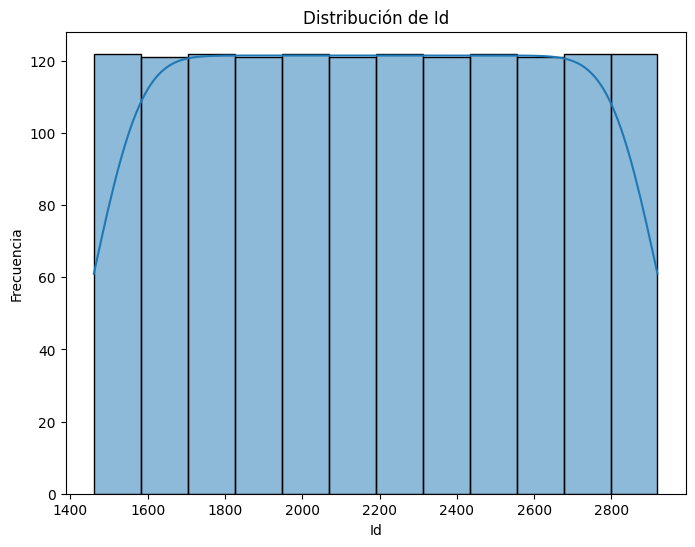

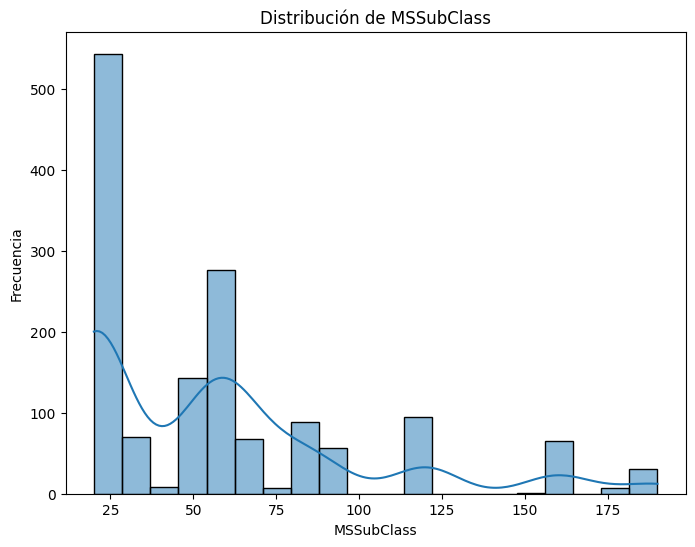

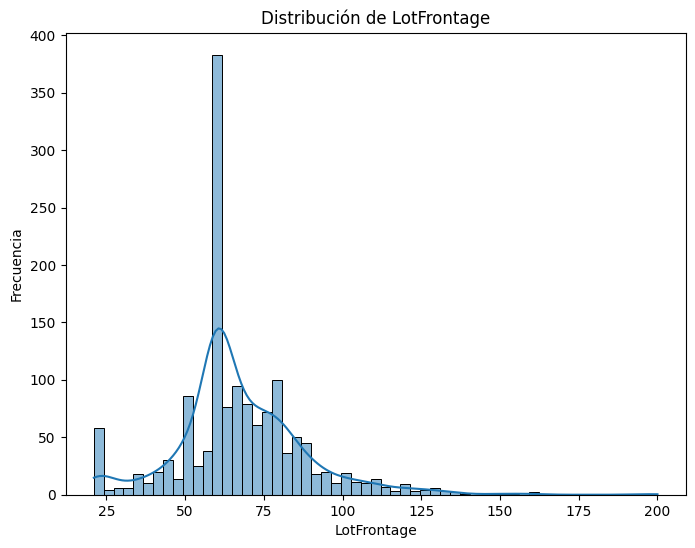

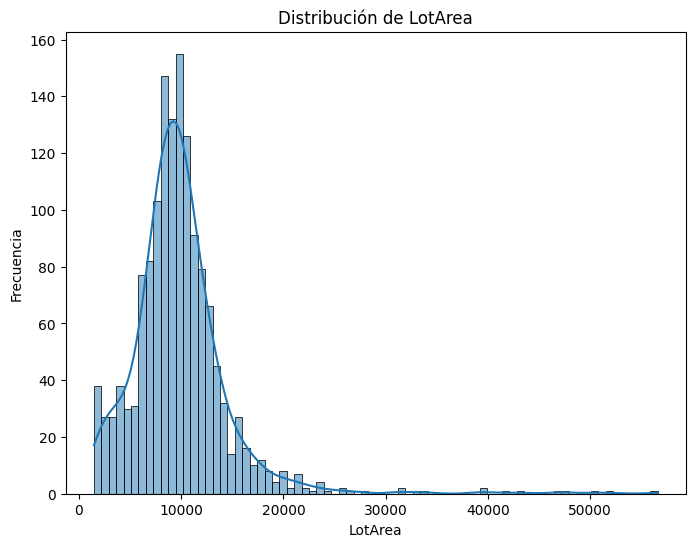

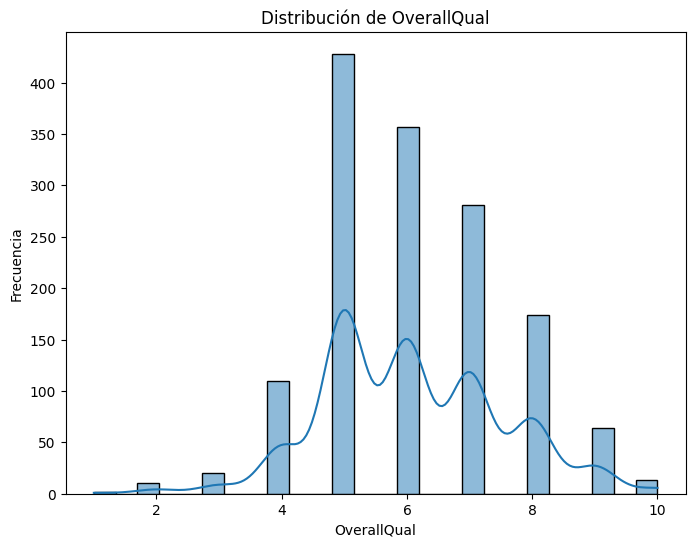

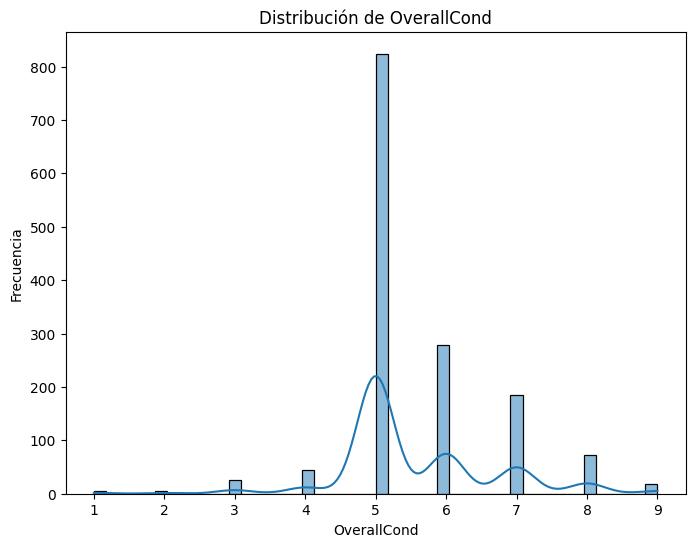

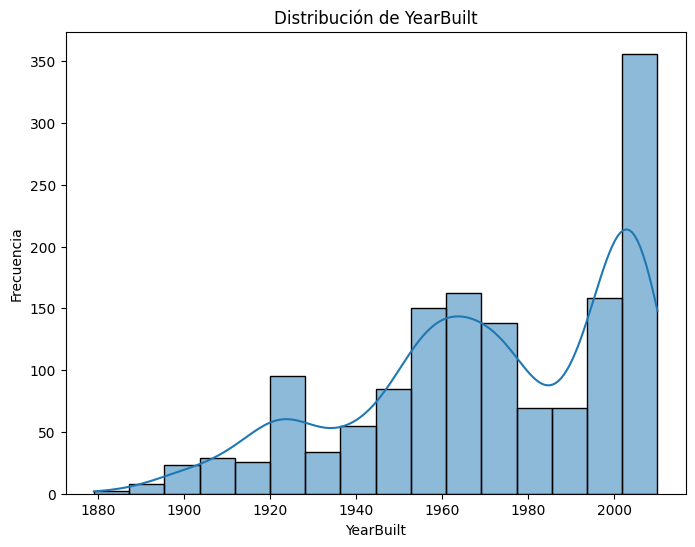

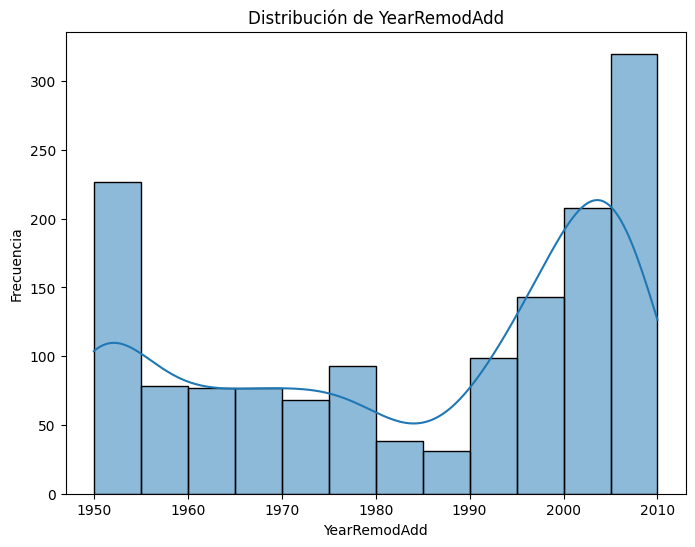

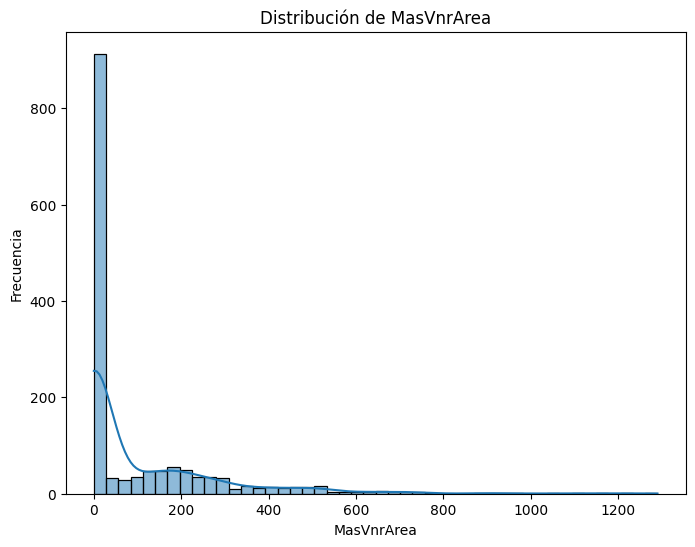

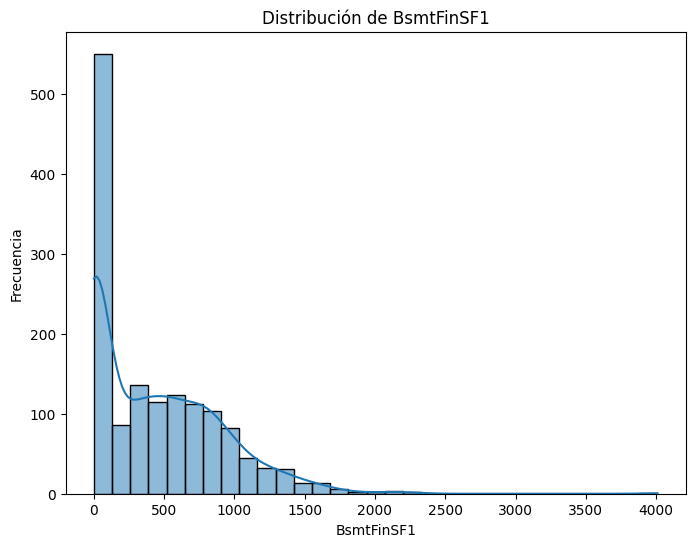

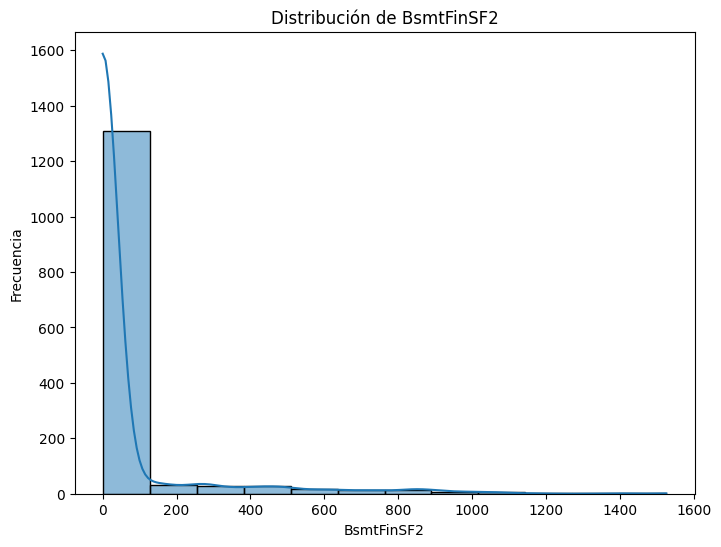

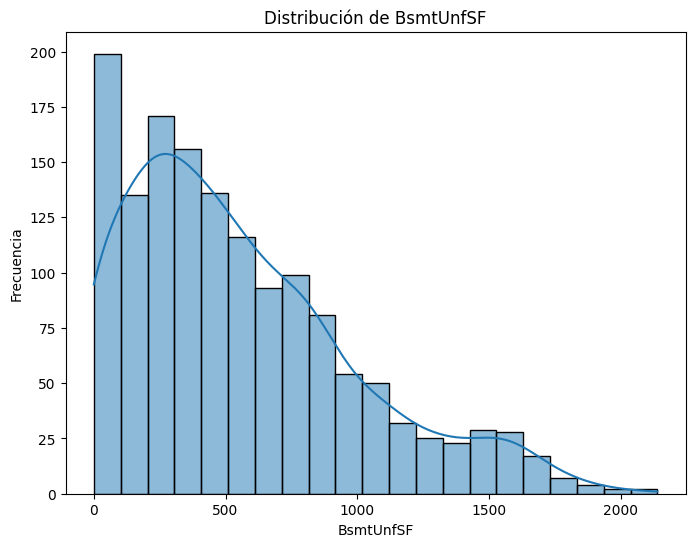

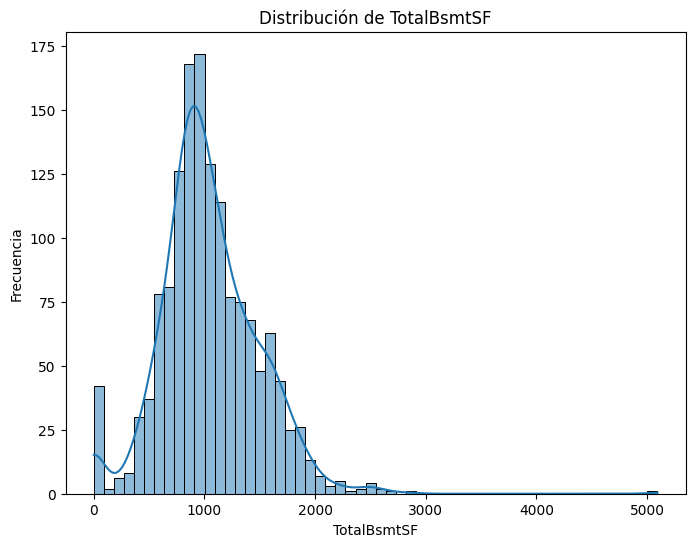

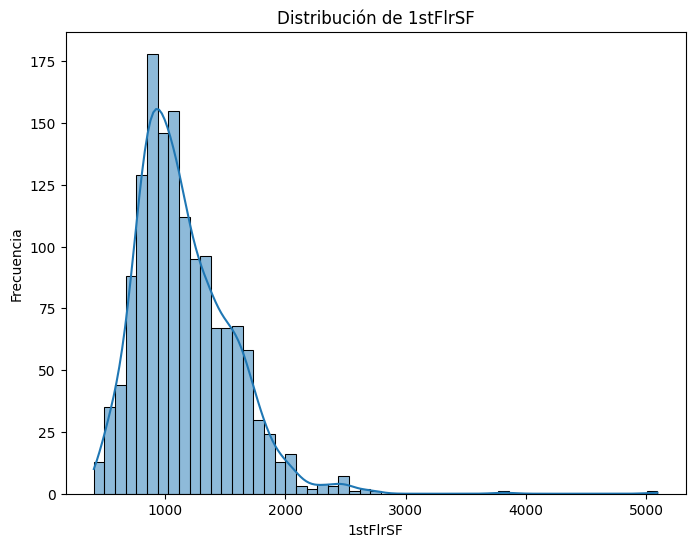

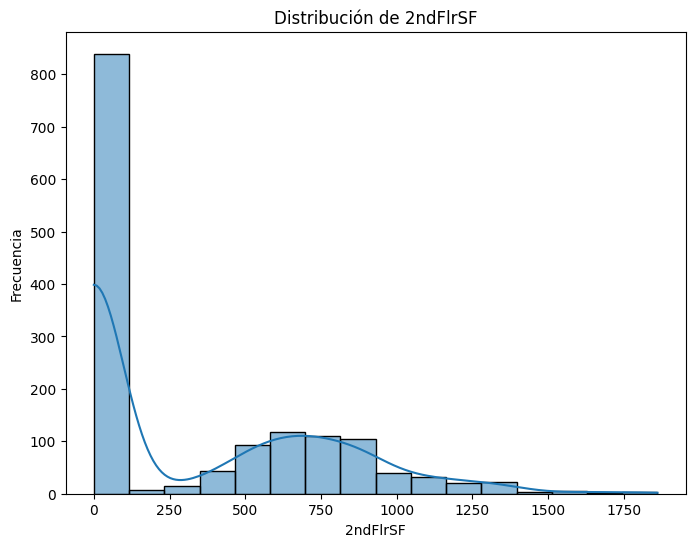

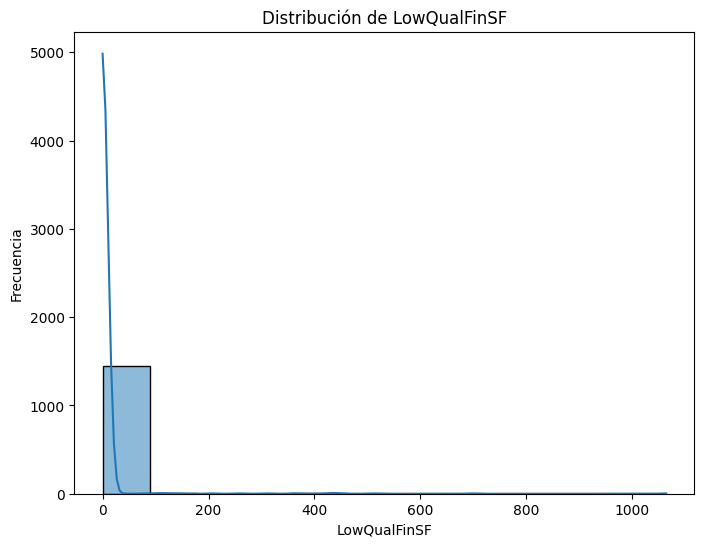

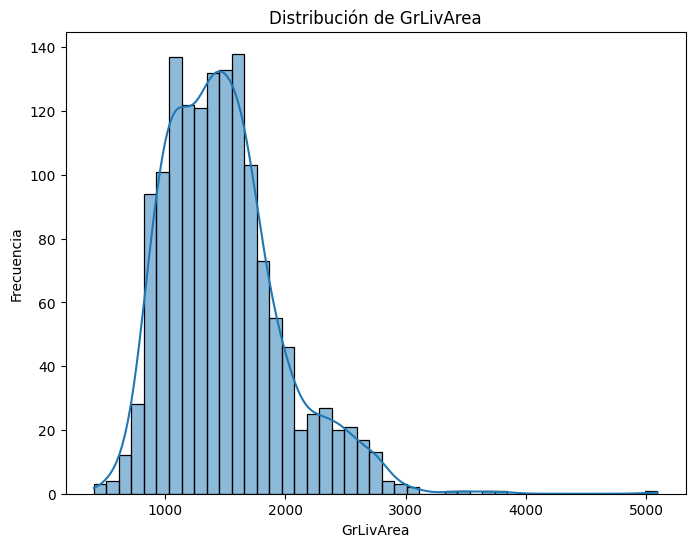

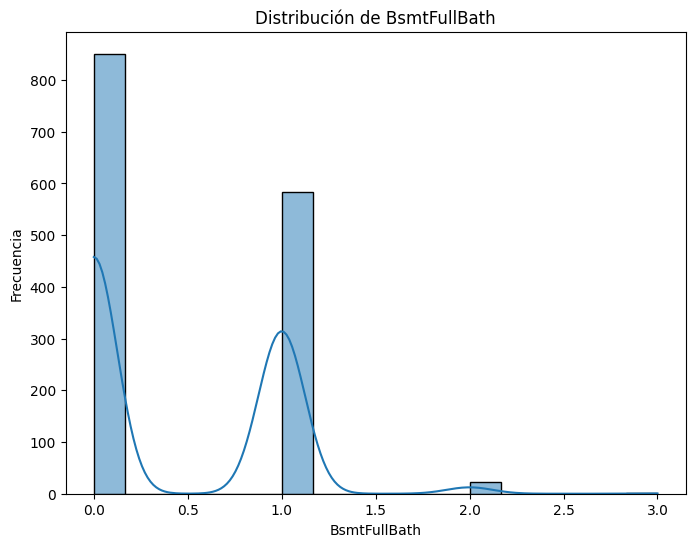

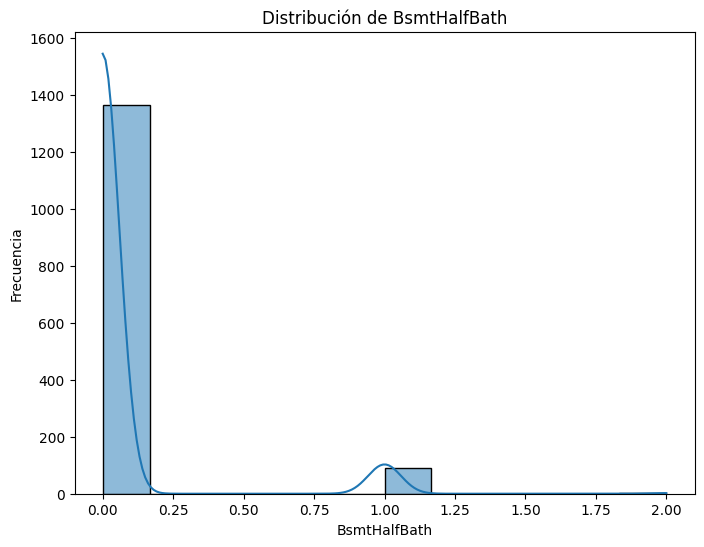

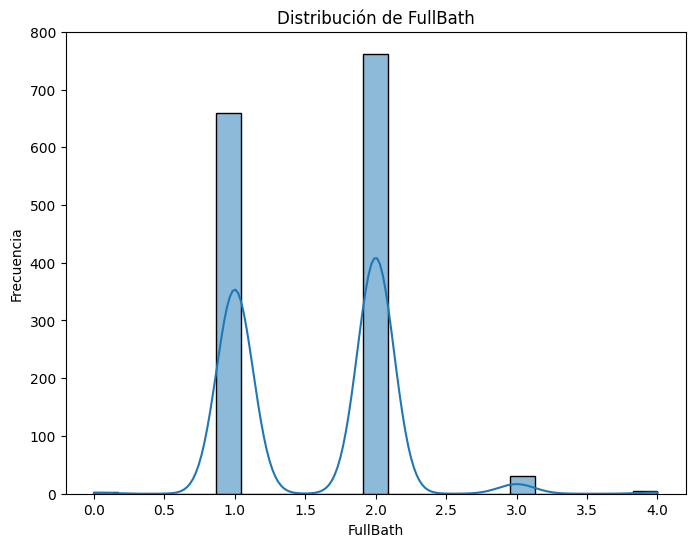

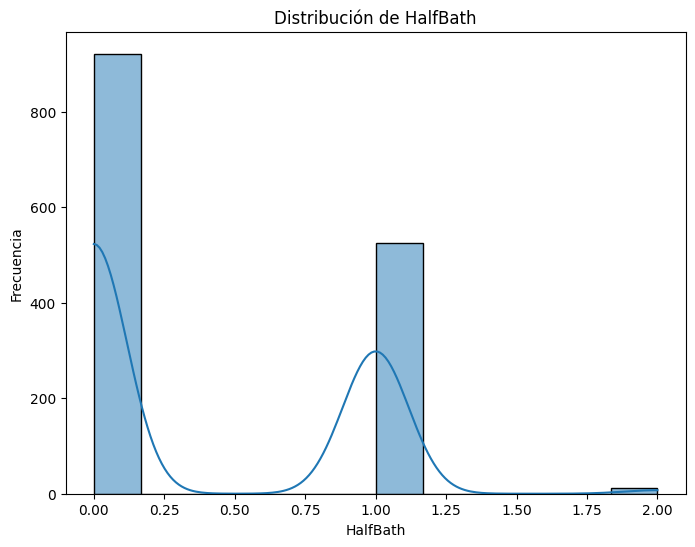

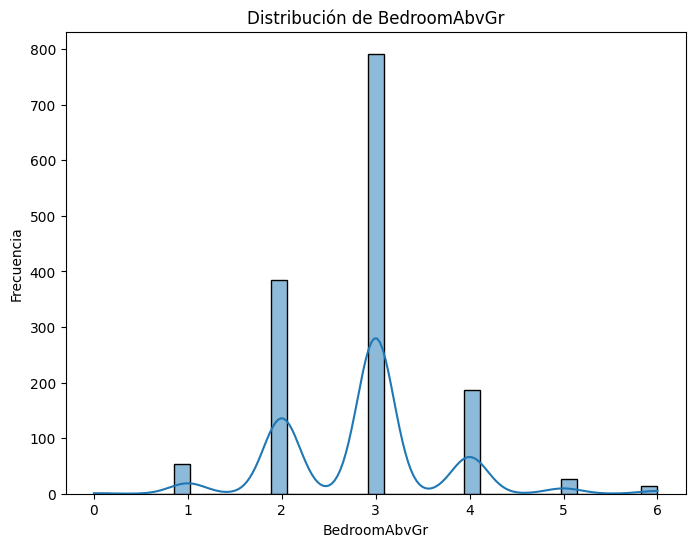

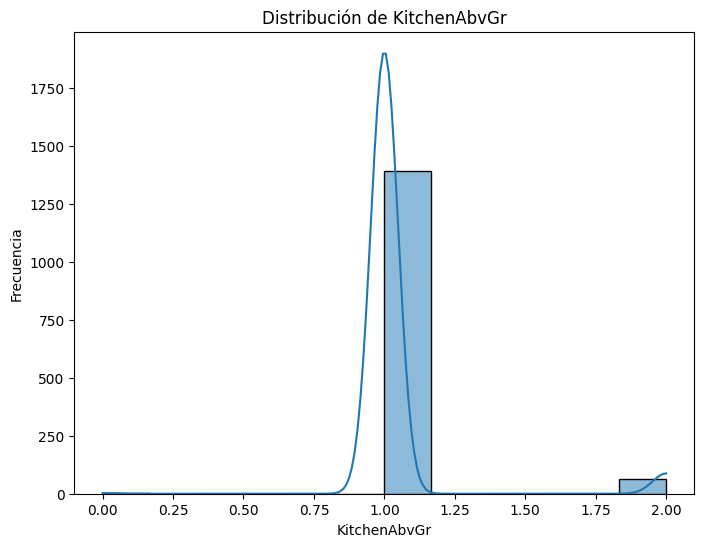

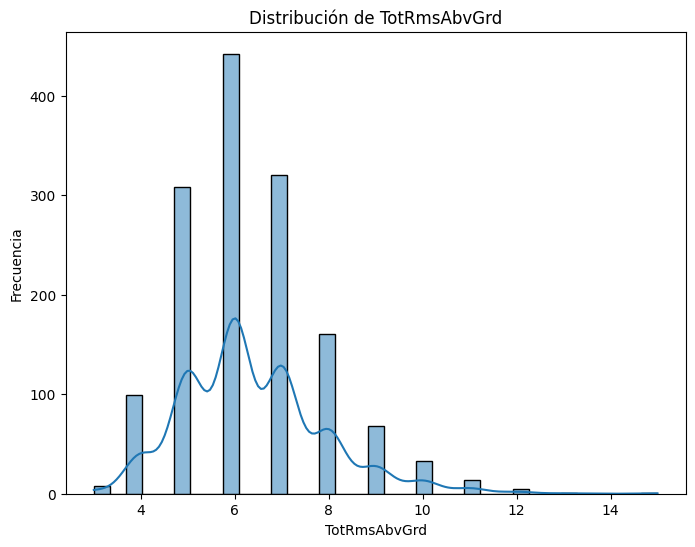

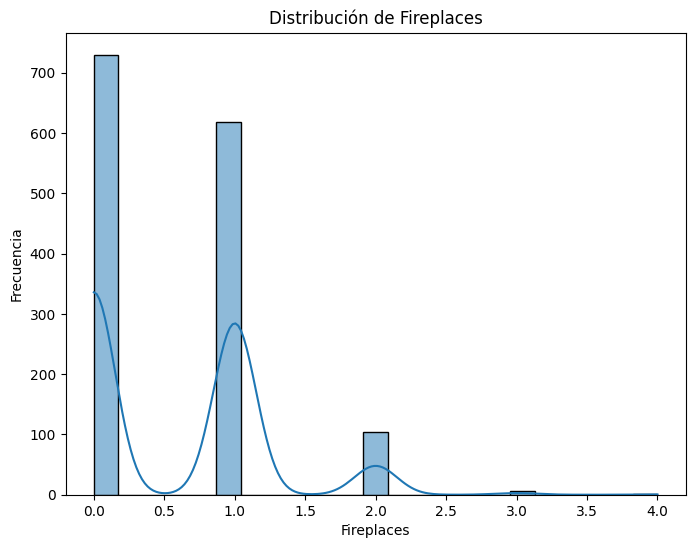

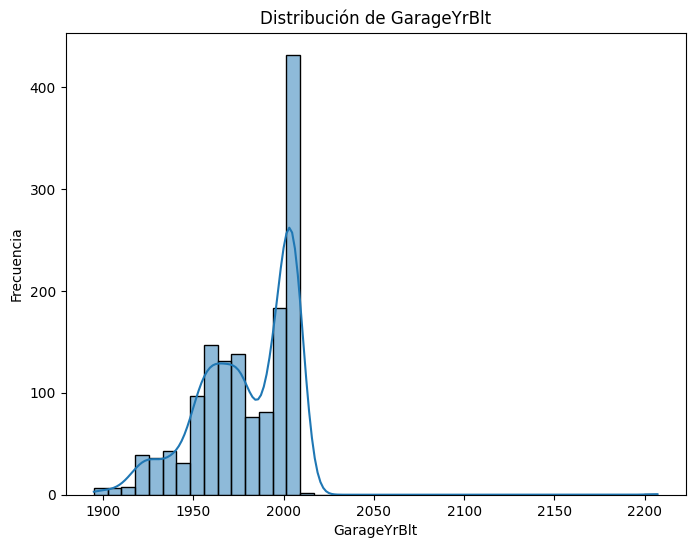

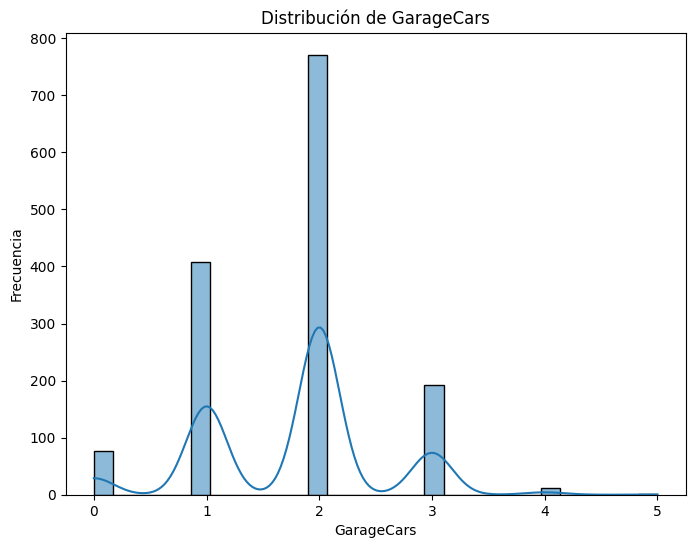

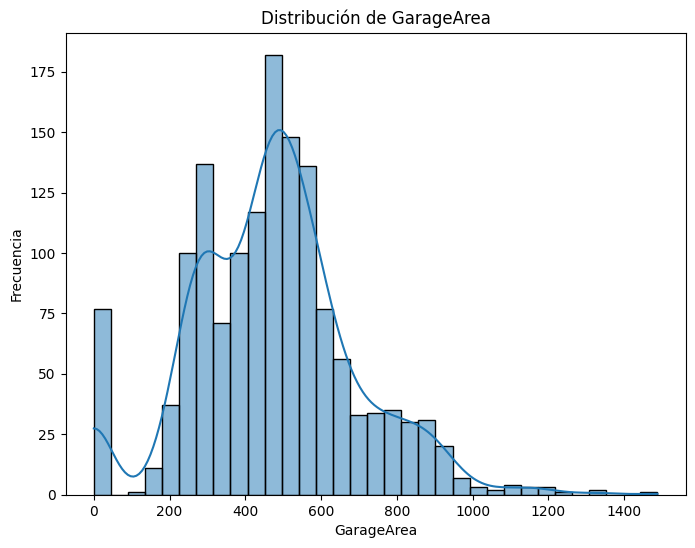

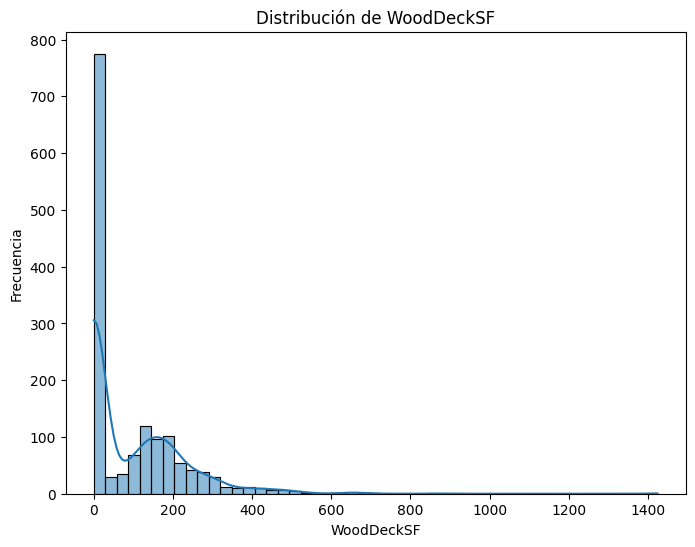

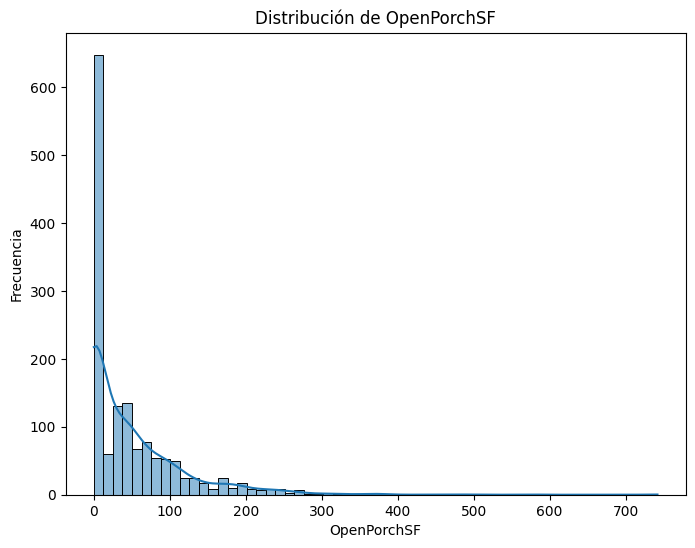

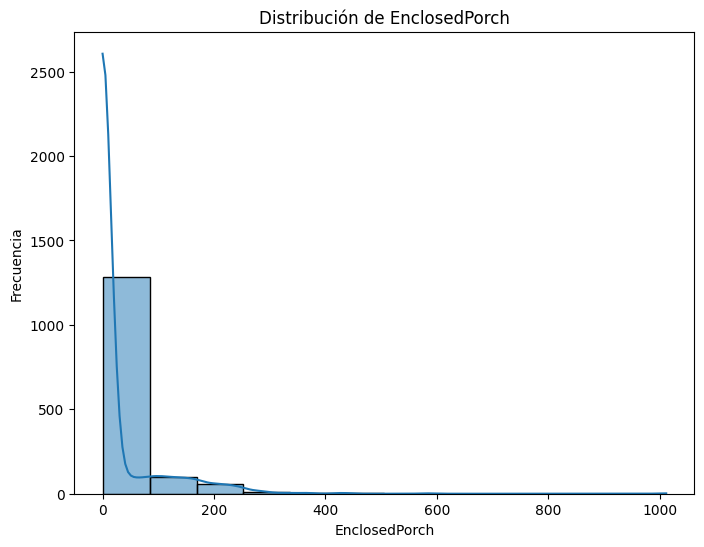

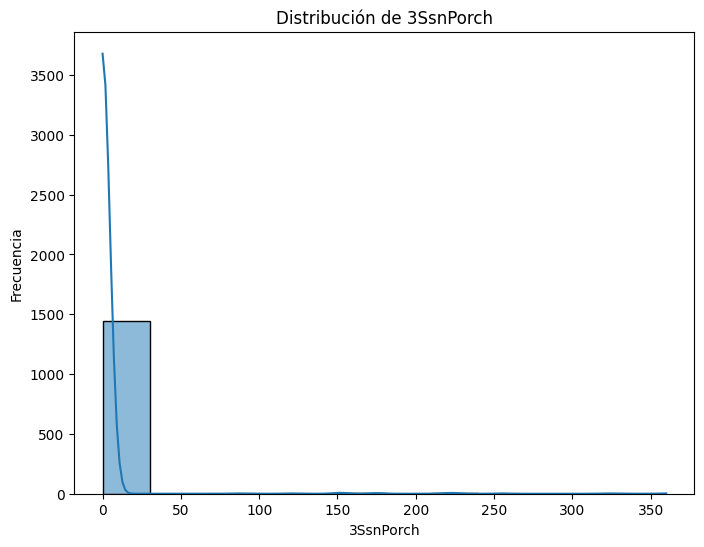

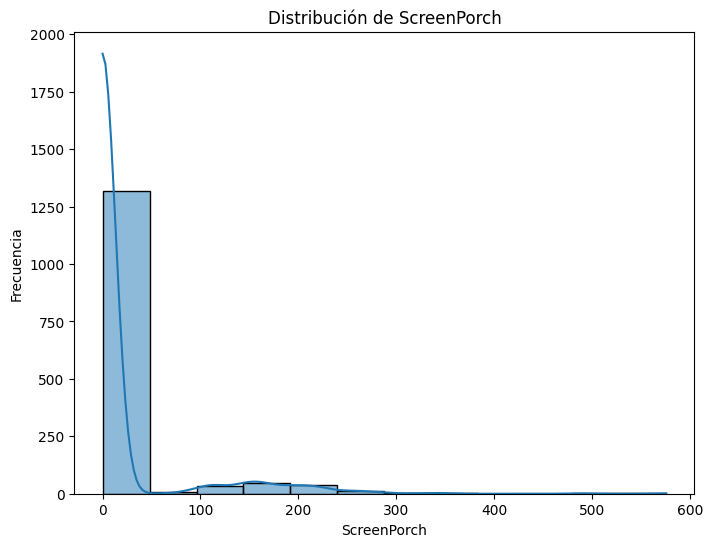

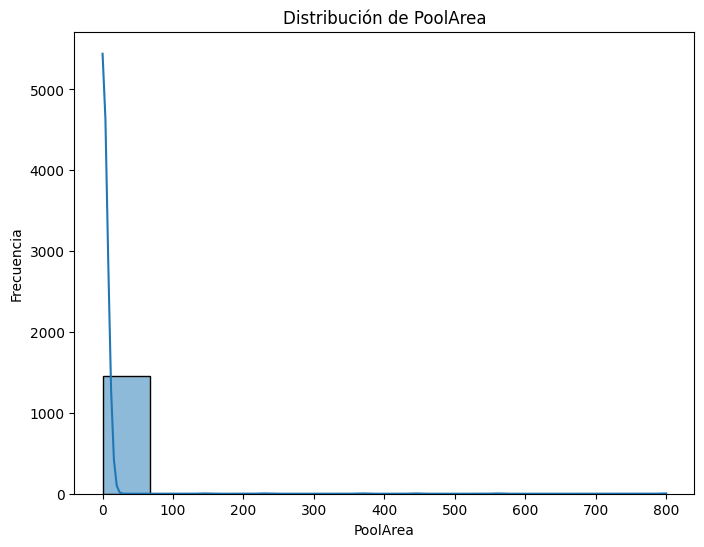

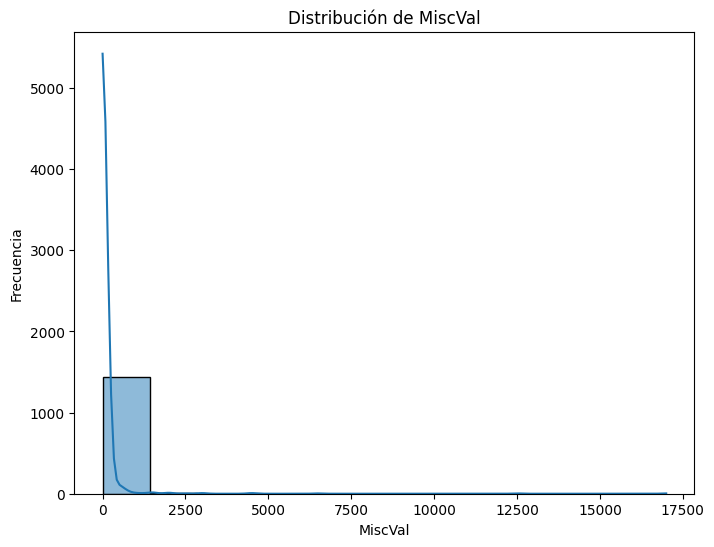

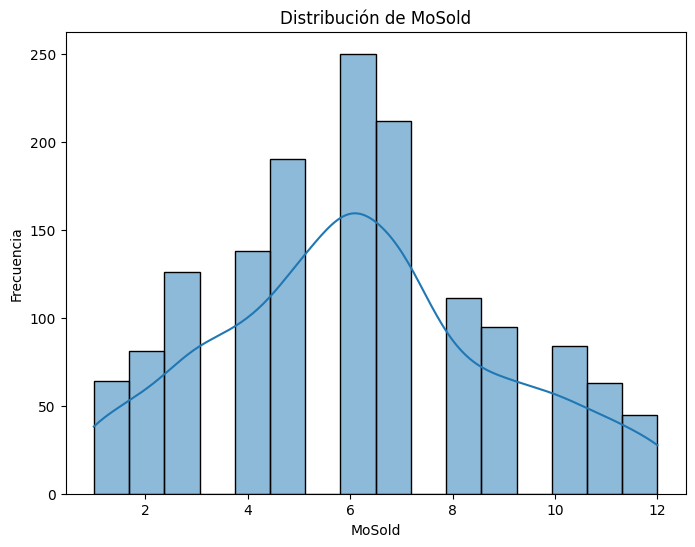

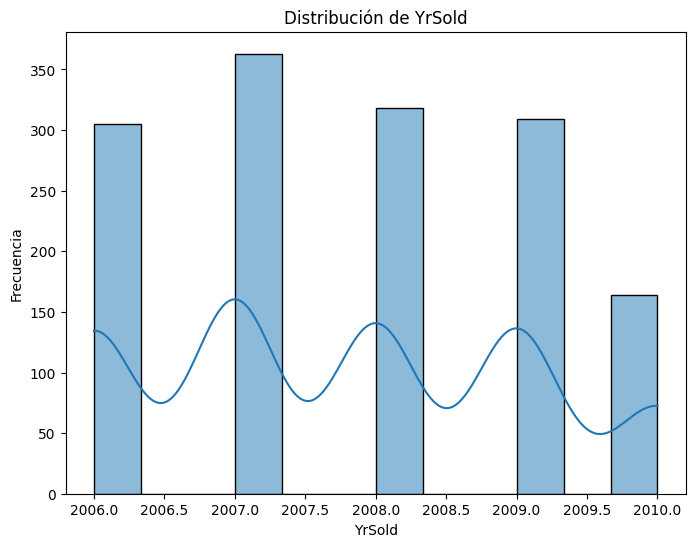

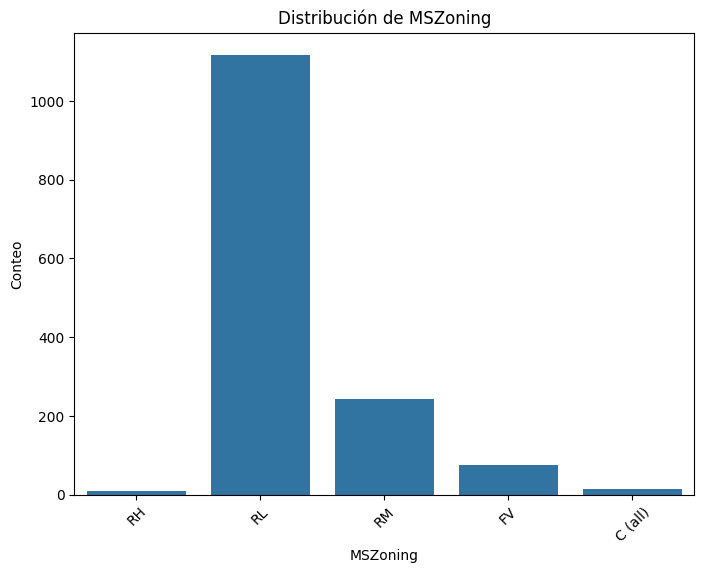

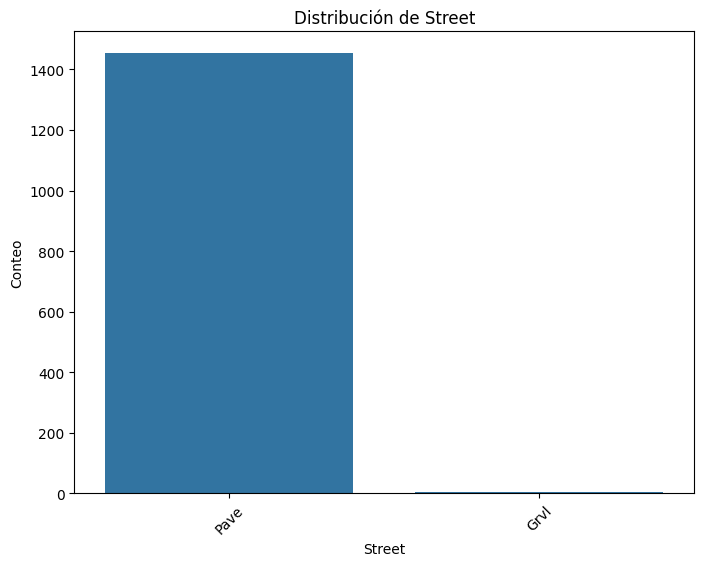

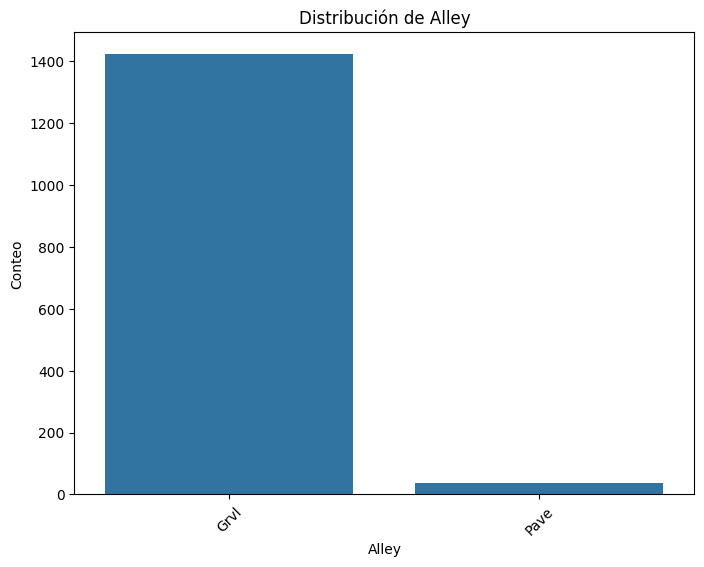

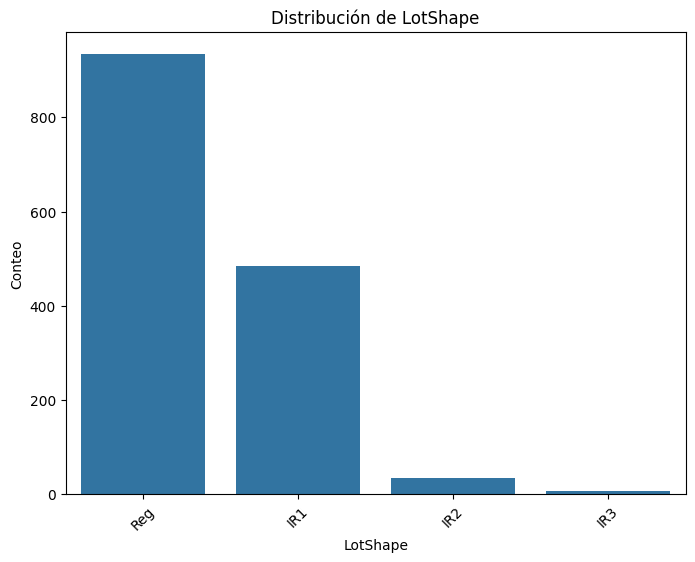

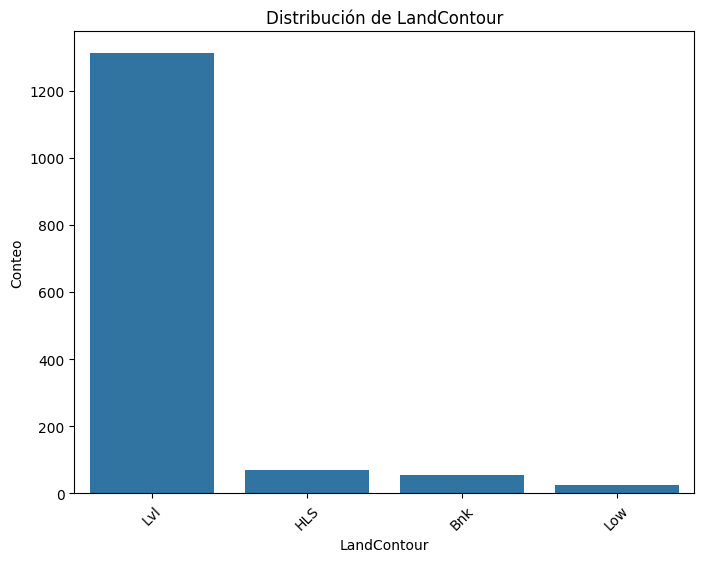

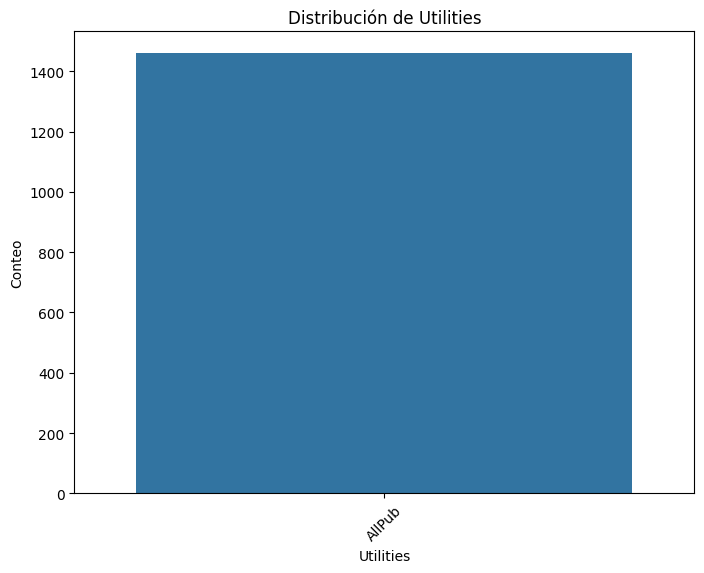

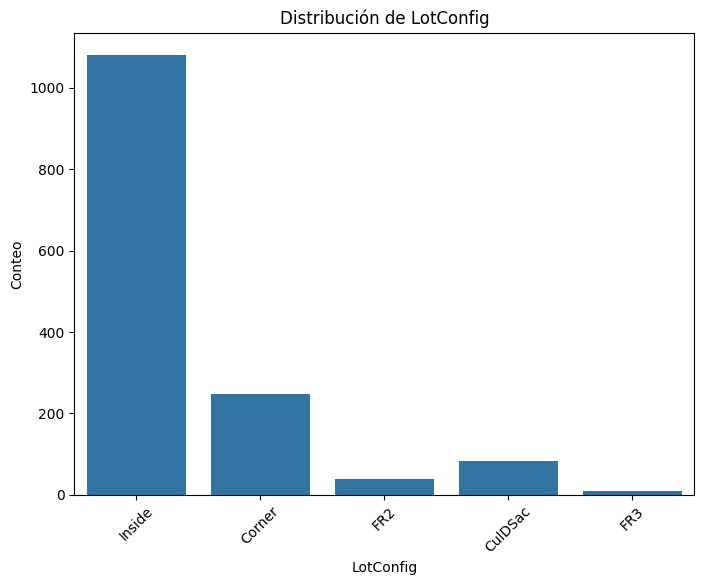

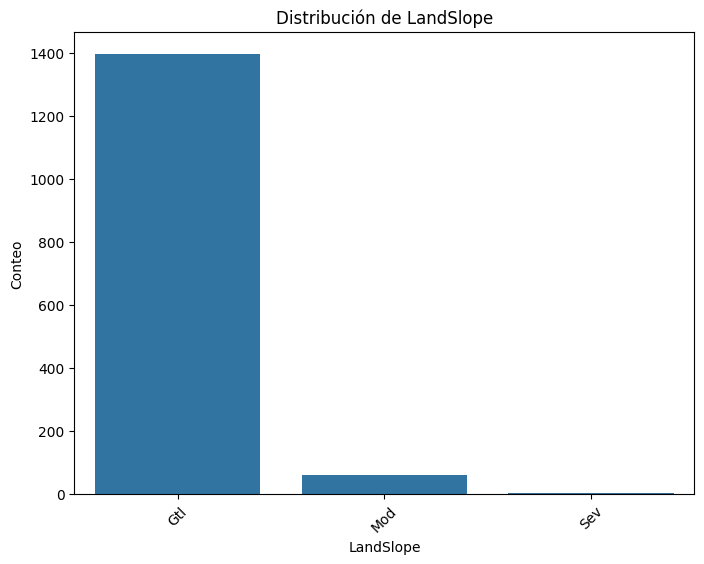

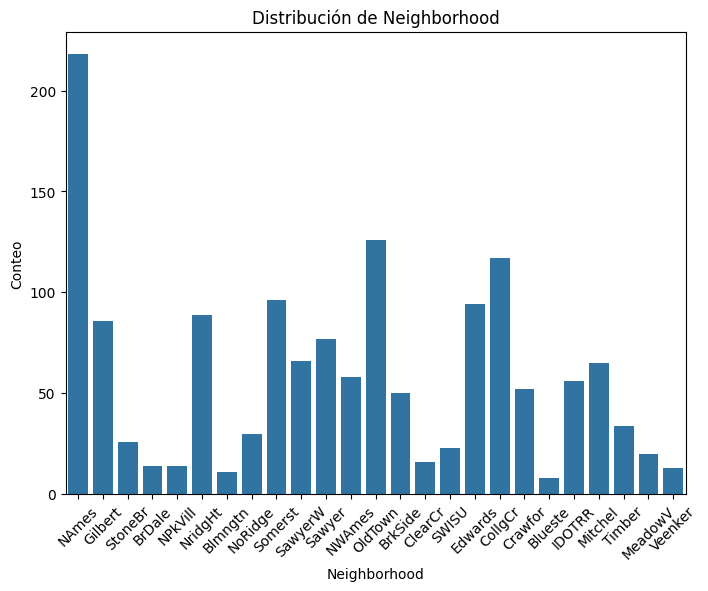

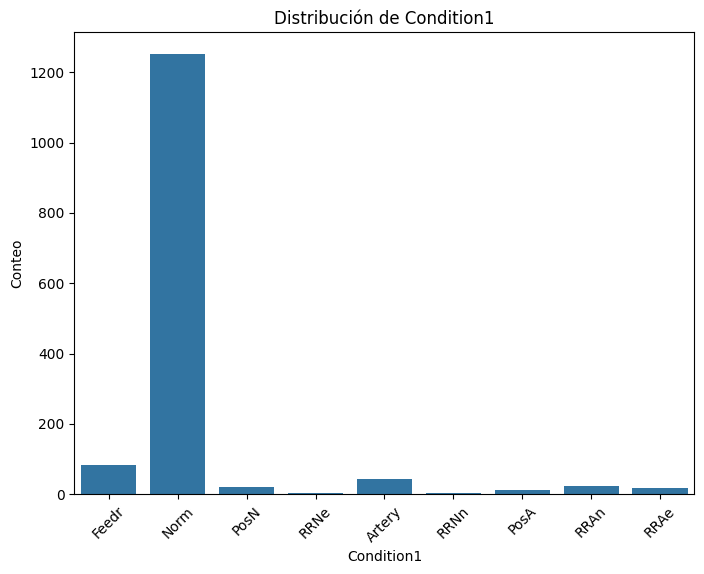

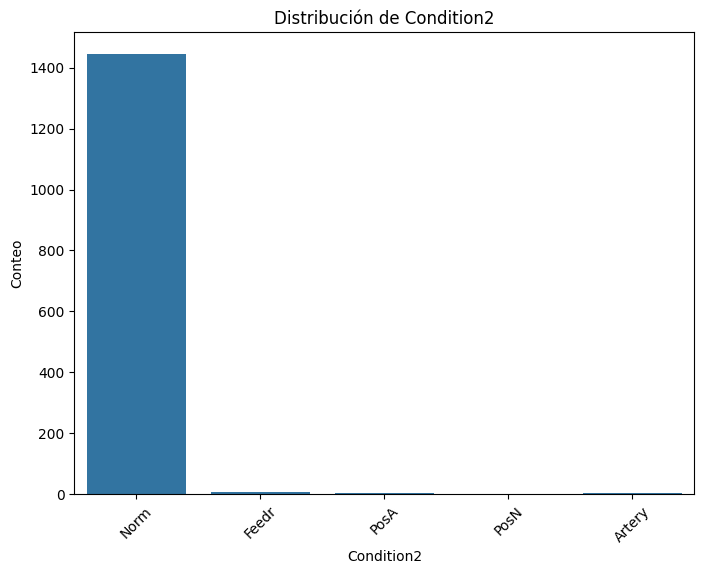

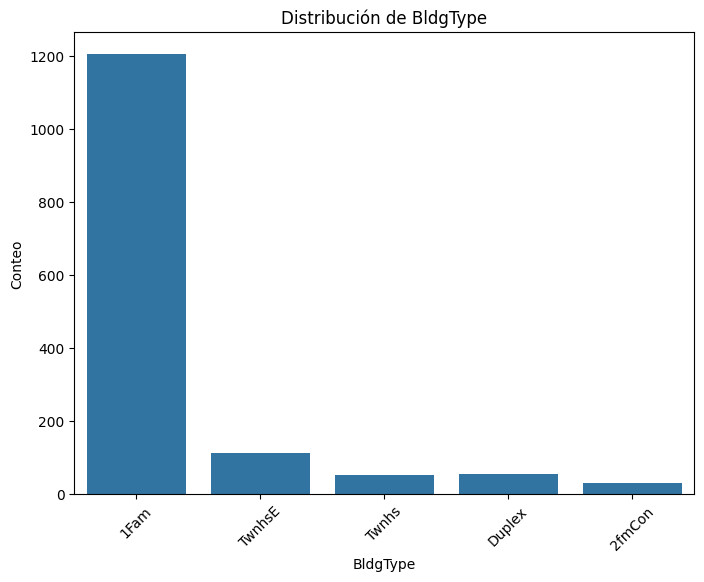

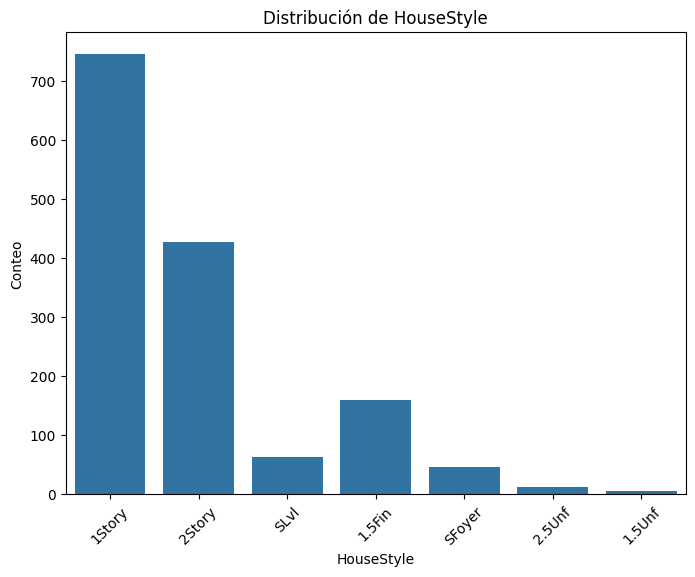

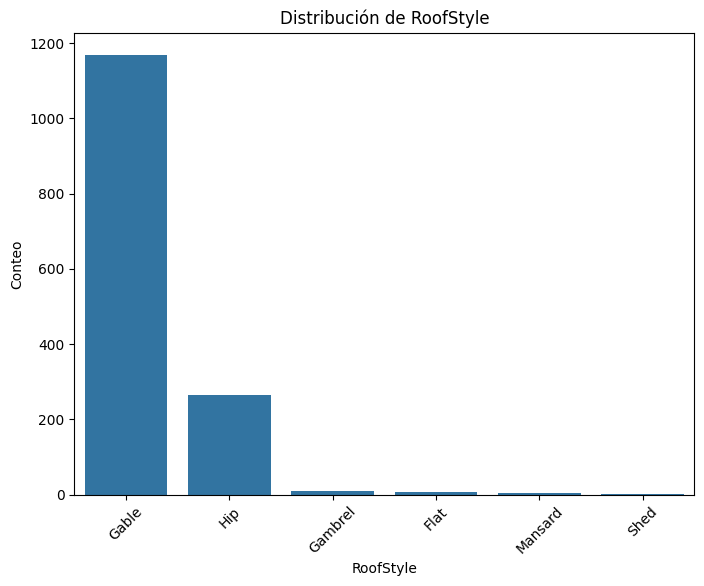

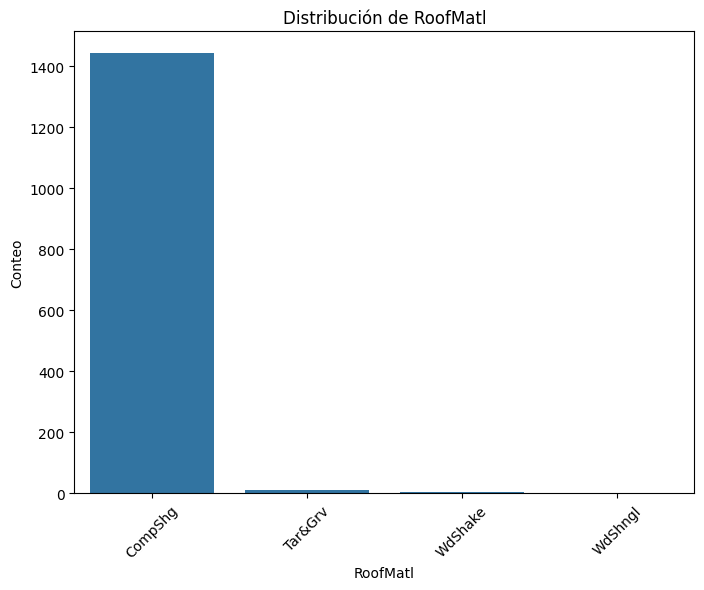

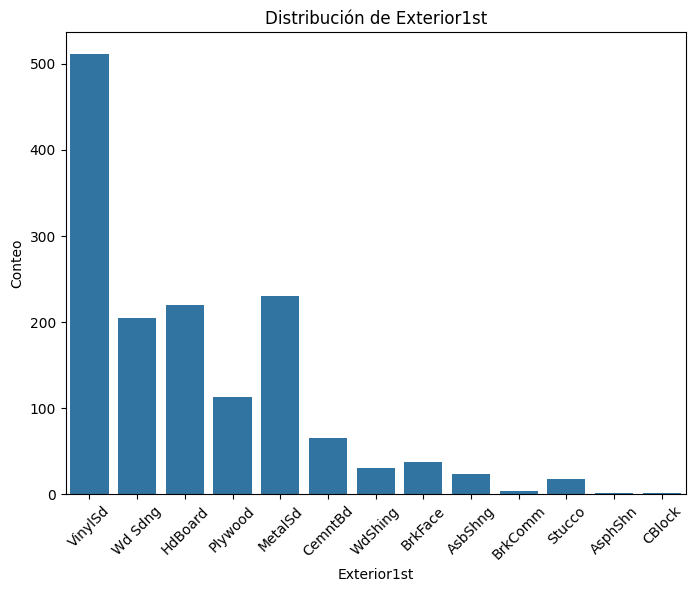

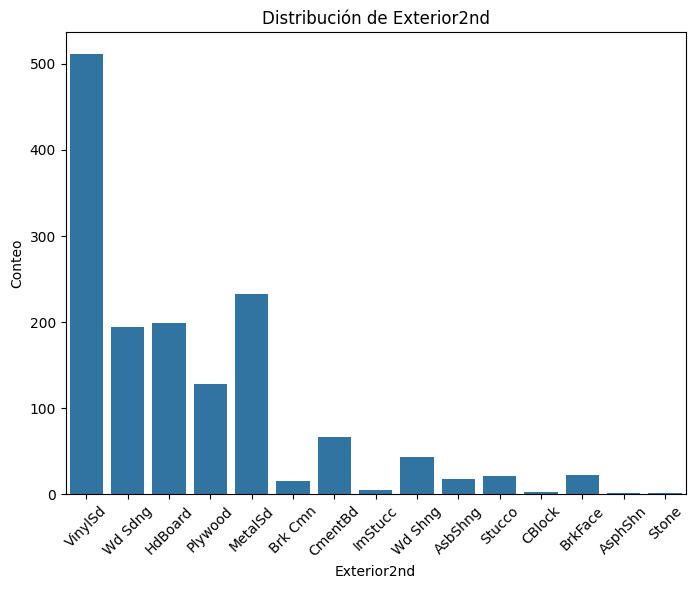

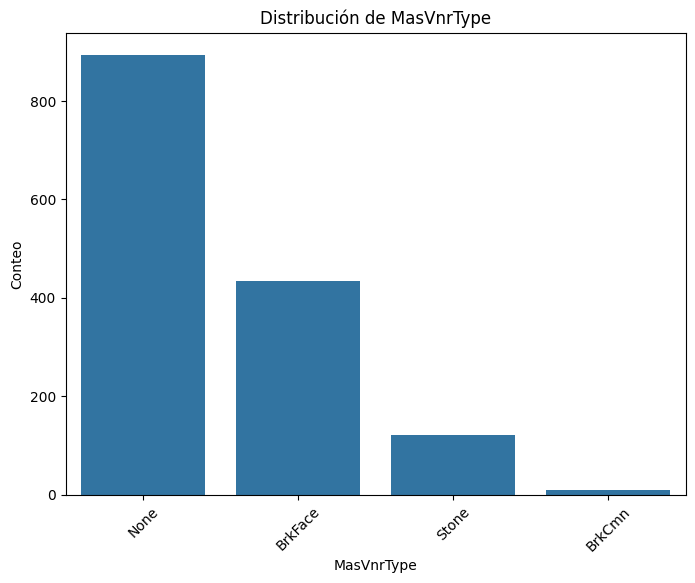

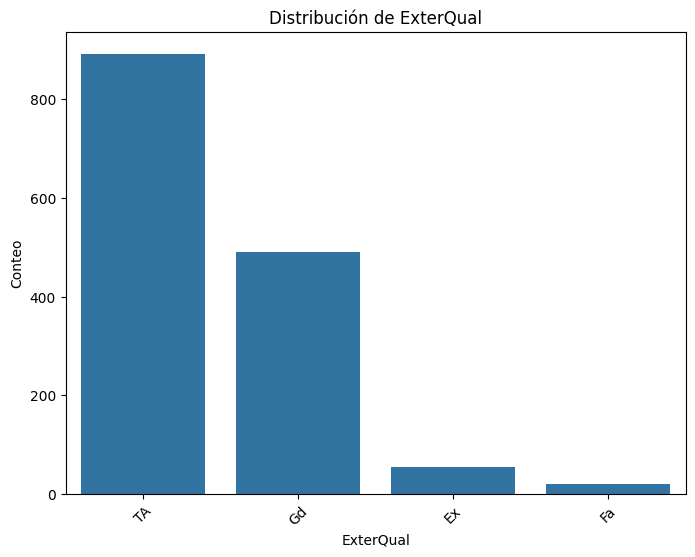

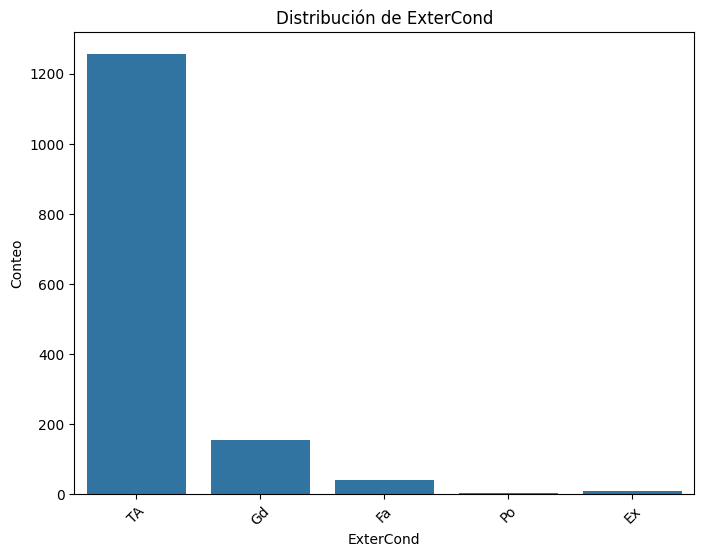

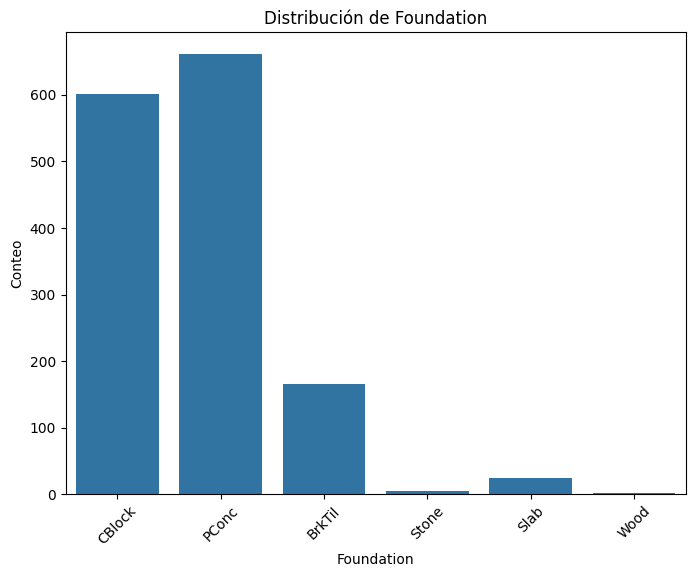

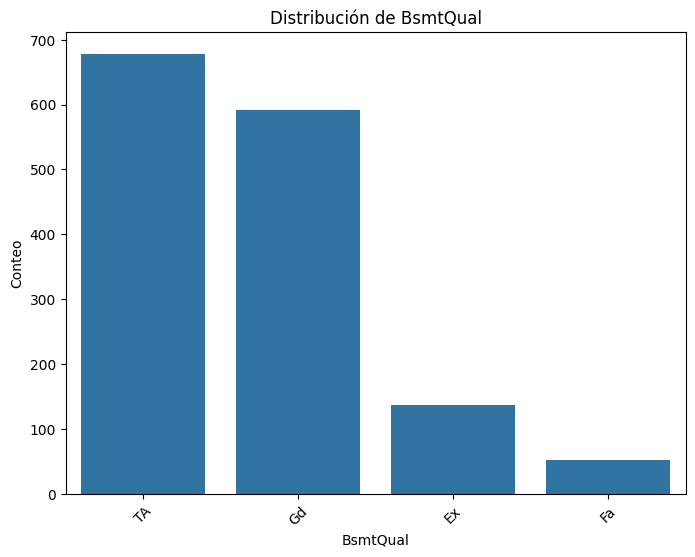

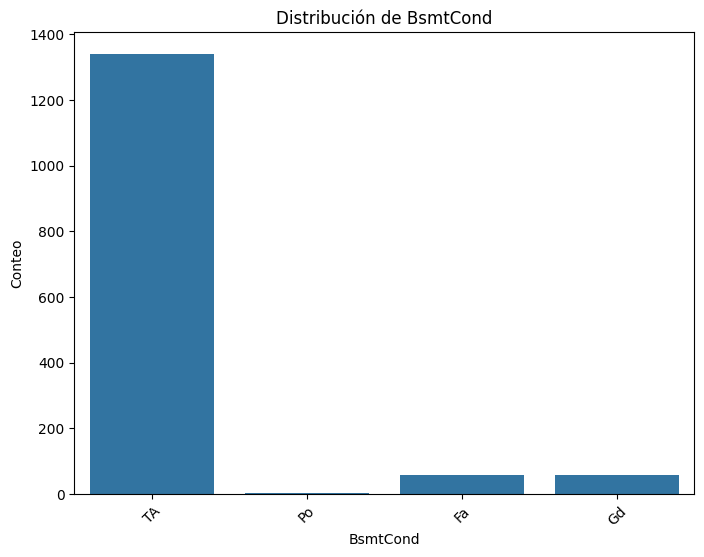

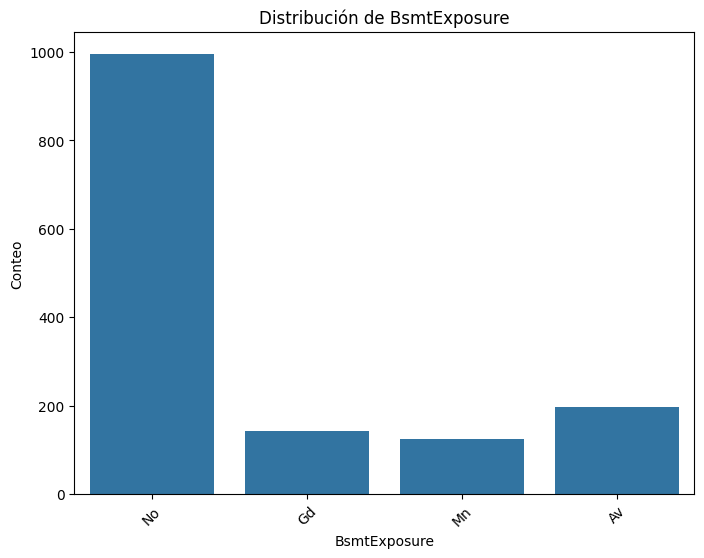

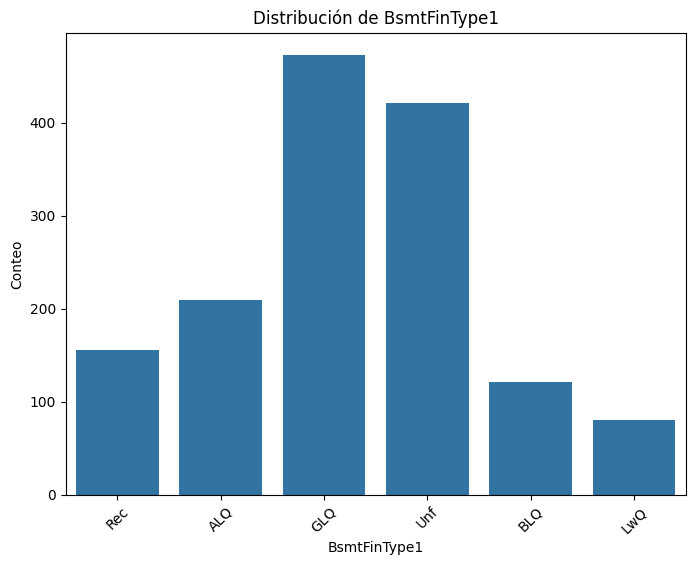

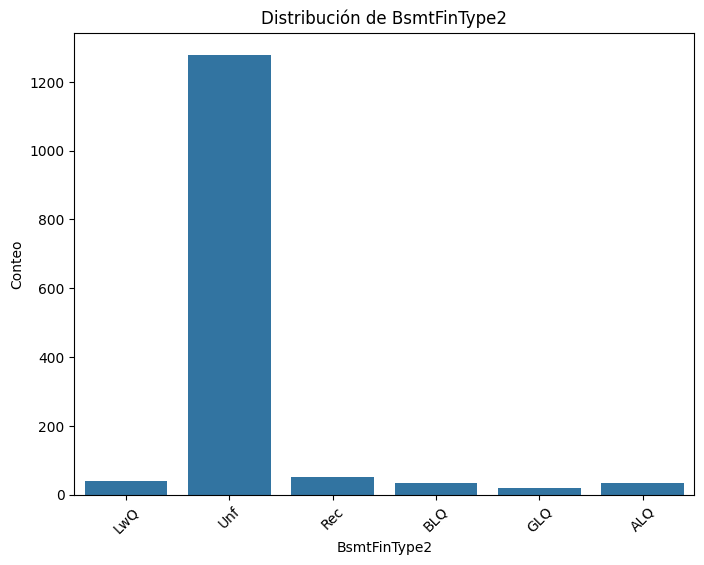

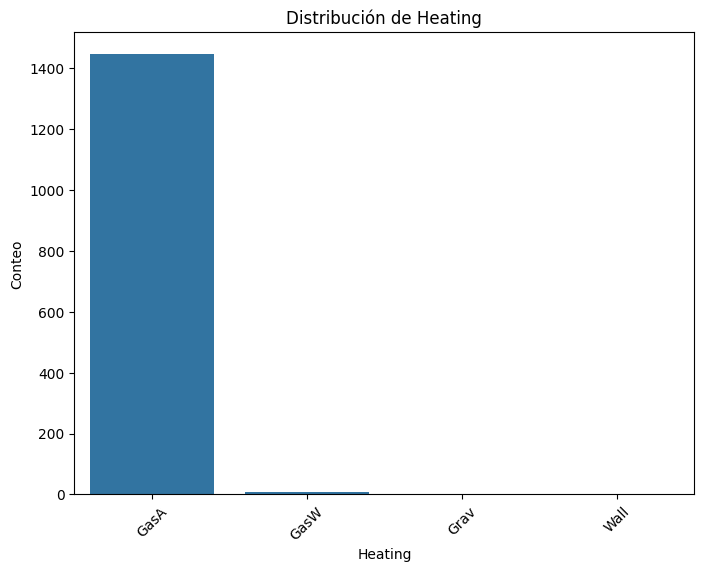

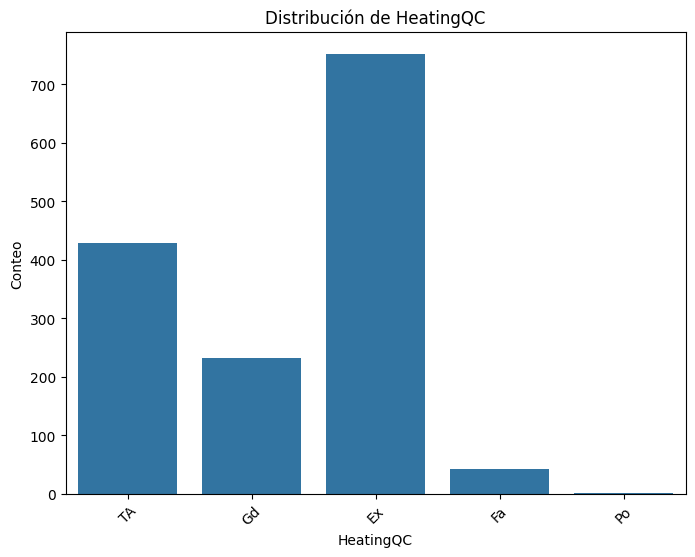

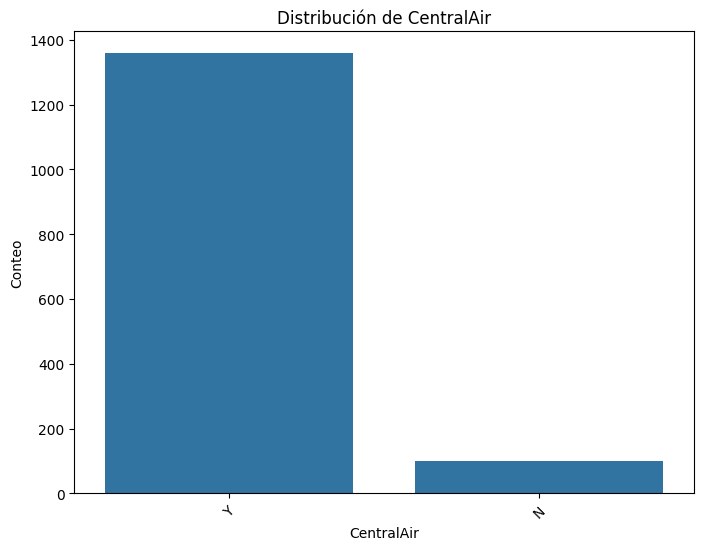

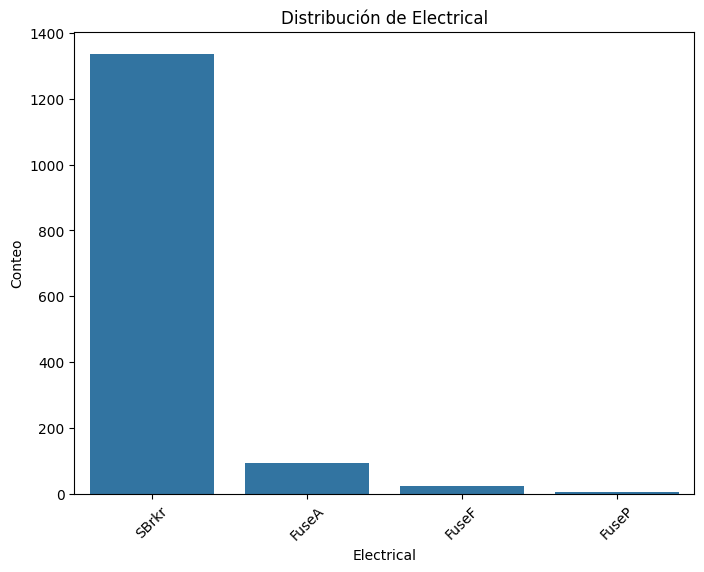

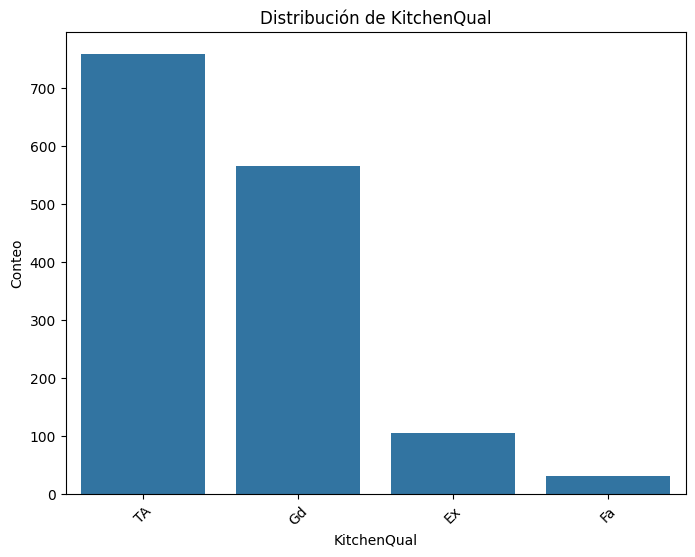

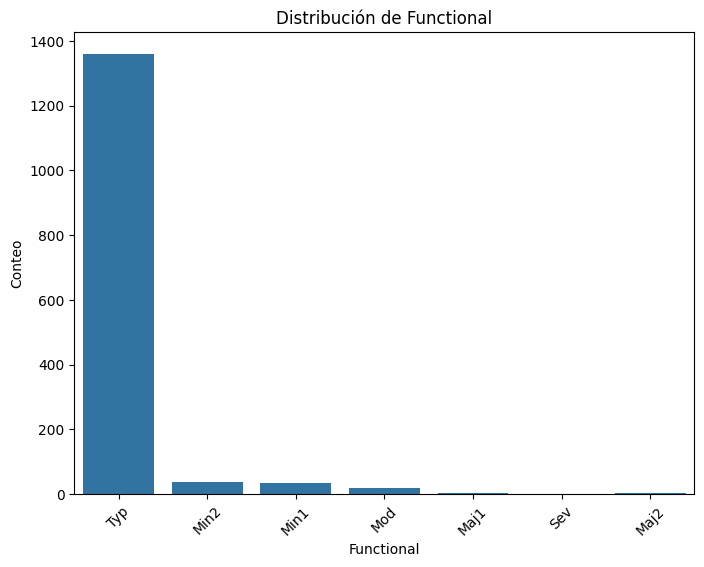

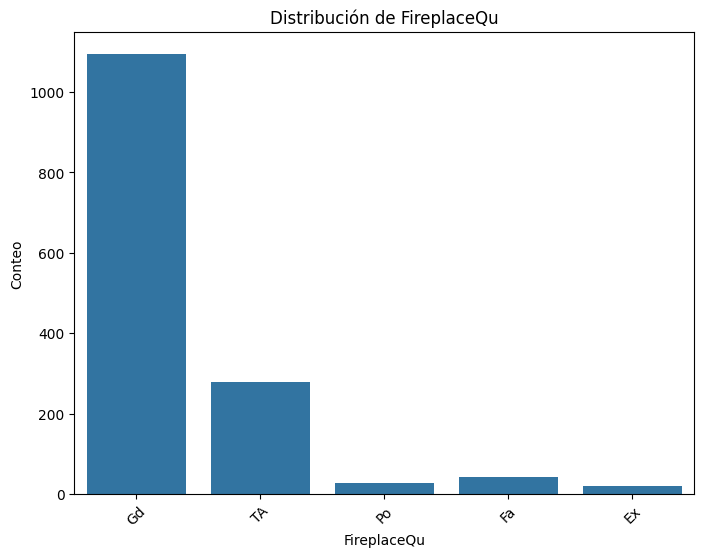

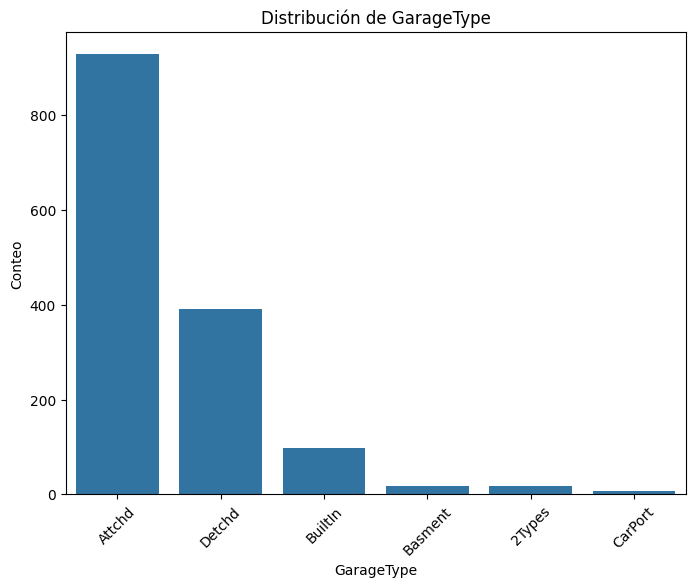

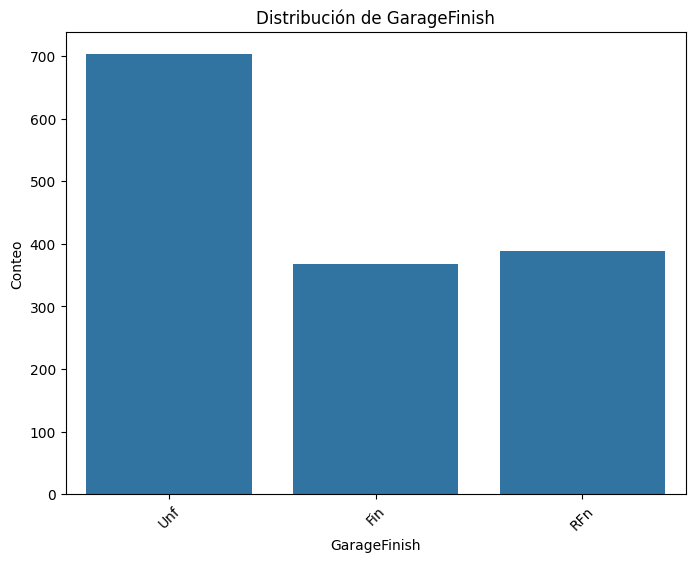

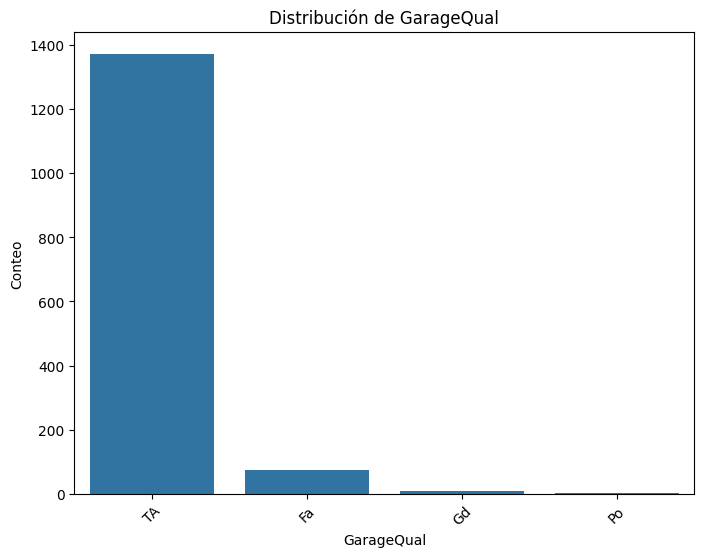

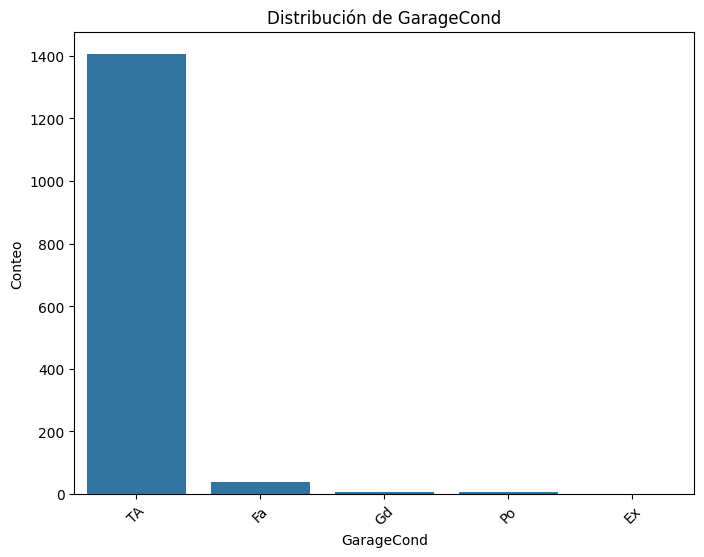

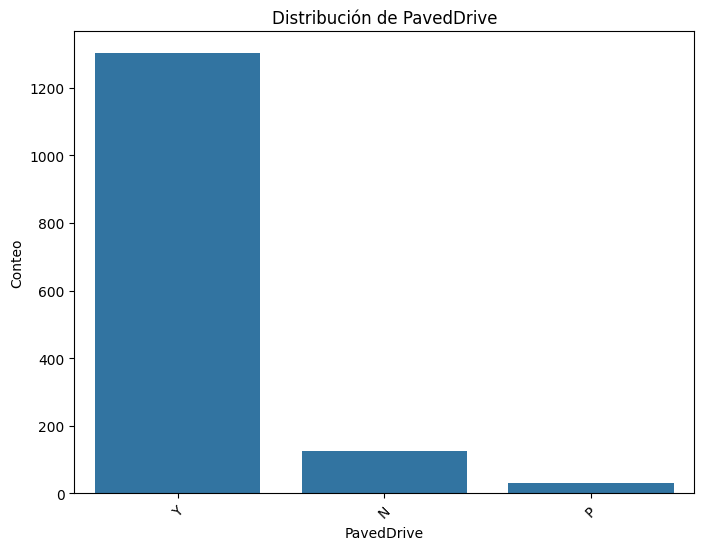

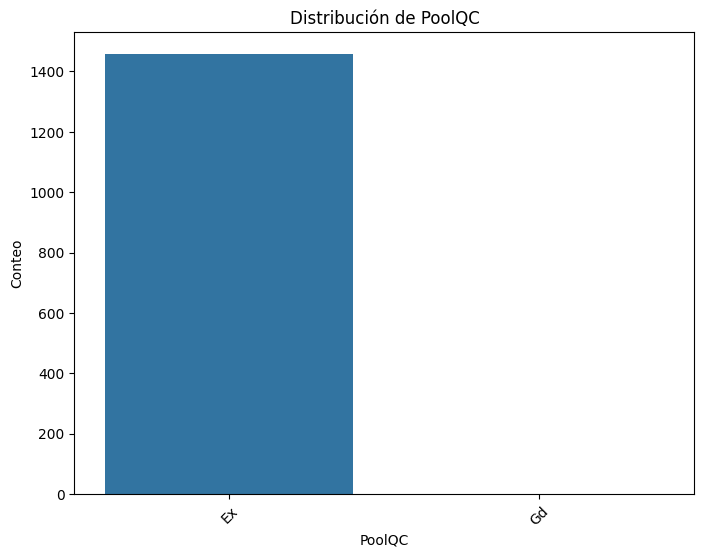

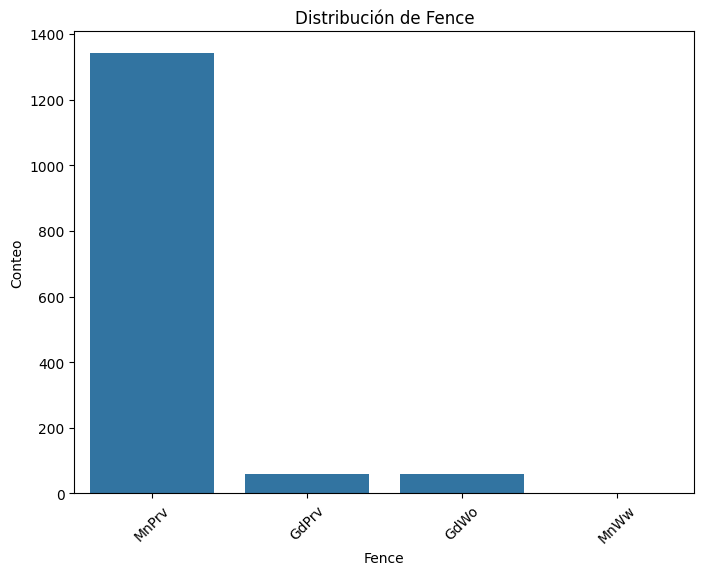

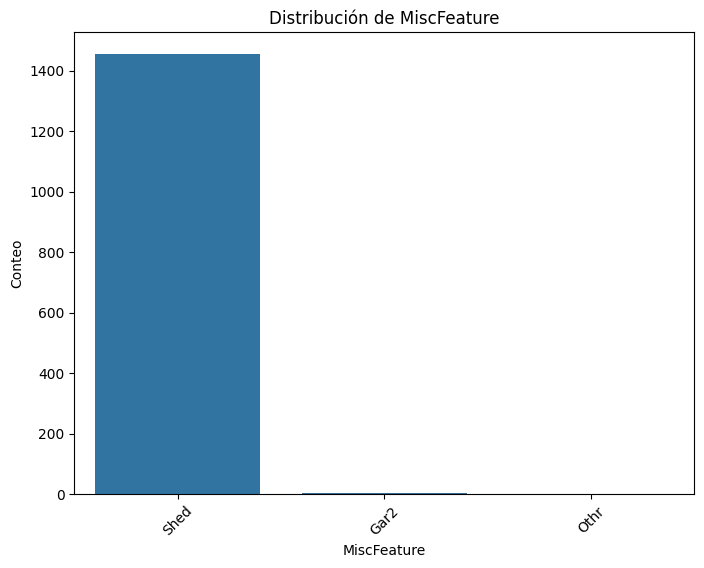

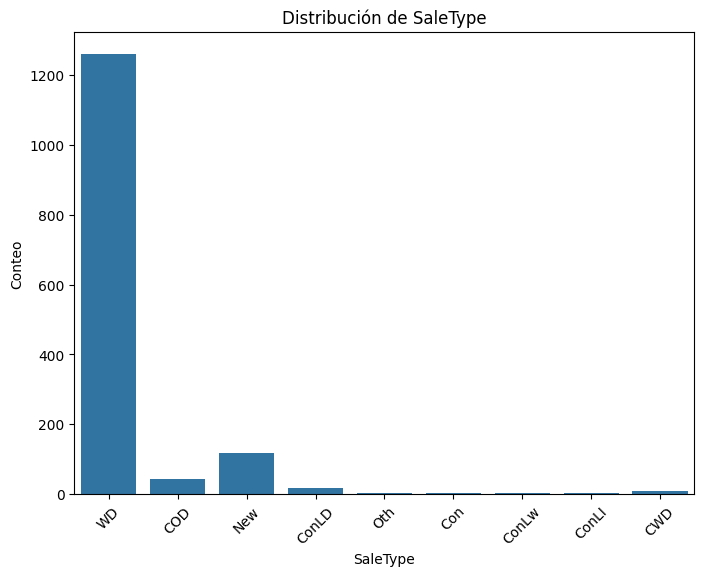

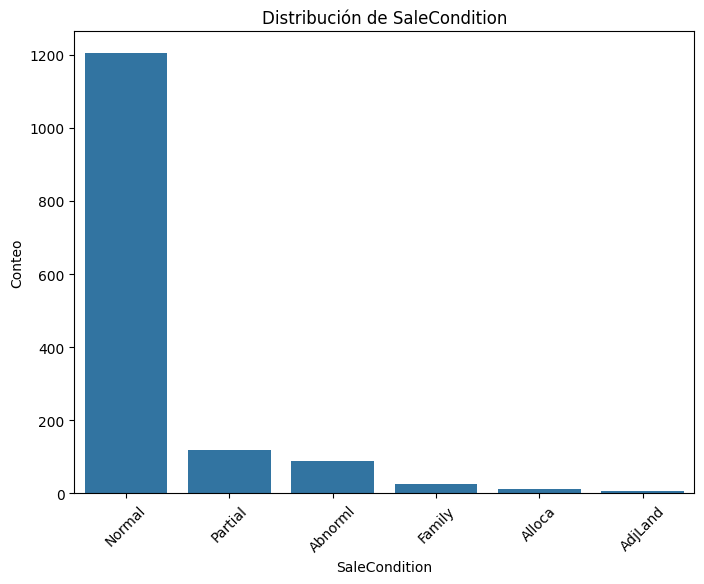

In [7]:
# Visualizar la distribución de las variables numéricas mediante histogramas
numeric_cols = df3.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df3[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

# Visualizar la distribución de las variables categóricas mediante gráficos de barras
categorical_cols = df3.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df3, x=col)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Conteo')
    plt.xticks(rotation=45)
    plt.show()


In [12]:
X = df2.drop(columns="SalePrice")
y = d1.

AttributeError: 'DataFrame' object has no attribute 'target'

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'X' is not defined